In [2]:
library(tidyverse)
library(TCGAbiolinks)
library(clusterProfiler)
library(pathview)
library(enrichplot)
library(pheatmap)
library(EnhancedVolcano)
# Load organism library
library(org.Hs.eg.db)
# Library for annotation
library(AnnotationDbi)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


载入程辑包：'clusterProfiler'


The following object is masked from 'package:purrr':

    simplify


The follo

In [2]:
query <- GDCquery(project = "TCGA-BRCA",
                  data.category = "Transcriptome Profiling",
                  data.type = "Gene Expression Quantification", 
                  workflow.type = "STAR - Counts")

Warning message in open.connection(con, "rb"):
"URL 'https://api.gdc.cancer.gov/status': status was 'SSL connect error'"


ERROR: Error in value[[3L]](cond): GDC server down, try to use this package later


In [ ]:
meta.data <- getResults(query)
head(meta.data)

id                                   data_format cases                       
1 0d140db1-dc0d-431d-b389-846d05bbb827 TSV         TCGA-E9-A1RH-01A-21R-A169-07
2 800ca72f-4bd7-46d7-904b-bcda2fa3500c TSV         TCGA-C8-A26W-01A-11R-A16F-07
3 958813f4-8036-42f7-856d-7a69c4175adc TSV         TCGA-E9-A1RH-11A-34R-A169-07
4 c7646bc5-436b-4ad5-b5ae-894b2e843cda TSV         TCGA-AO-A0JJ-01A-11R-A056-07
5 90e074a0-ca6d-4031-aa26-f79e5c662ba7 TSV         TCGA-BH-A0HO-01A-11R-A034-07
6 ac7c3a38-5d88-488e-86f7-1c72a26fe5ef TSV         TCGA-BH-A18F-01A-11R-A12D-07
  access
1 open  
2 open  
3 open  
4 open  
5 open  
6 open  
  file_name                                                                  
1 d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv
2 c58a5583-7b04-4b67-9372-e161e18d7de1.rna_seq.augmented_star_gene_counts.tsv
3 269c35f0-a4f7-4e30-a69f-f1f3b7b5dace.rna_seq.augmented_star_gene_counts.tsv
4 158ab1d9-8925-4a05-95da-b2e0ca297474.rna_seq.augmented_star_gene_counts.tsv
5 9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673.rna_seq.augmented_star_gene_counts.tsv
6 11ed8e05-8f30-460a-b502-01ae09504315.rna_seq.augmented_star_gene_counts.tsv
  submitter_id                         data_category           type           
1 79976f76-a364-40c3-8e75-9281d41a3259 Transcriptome Profiling gene_expression
2 16babb86-87b9-4faa-9469-f1bd9d79afba Transcriptome Profiling gene_expression
3 98ea3aa6-f1cc-4c09-bcdc-8e0af9cb0899 Transcriptome Profiling gene_expression
4 cede3da7-94c9-4e91-94e7-bb211f4eb6ac Transcriptome Profiling gene_expression
5 50a6509a-806b-4a6f-adf3-4b04dd64cf43 Transcriptome Profiling gene_expression
6 730f7b80-60ed-408d-a8e4-40d220eb7f93 Transcriptome Profiling gene_expression
  file_size created_datetime                 ⋯
1 4243387   2021-12-13T22:30:58.414992-06:00 ⋯
2 4256989   2021-12-13T22:08:29.274913-06:00 ⋯
3 4237719   2021-12-13T21:57:30.184115-06:00 ⋯
4 4246730   2021-12-13T21:53:52.671780-06:00 ⋯
5 4244631   2021-12-13T22:41:44.660147-06:00 ⋯
6 4241467   2021-12-13T21:51:55.922691-06:00 ⋯
  analysis_id                          analysis_state
1 eb87ce9e-8662-45f5-813e-b3cc914ca5a1 released      
2 e7a1f4f0-e04a-4f20-996c-cee283a8f182 released      
3 bba6c459-0652-4c97-88d0-b82195228c82 released      
4 752e61ef-6dfe-4a9c-8ada-29a4af481091 released      
5 c9c819d2-d230-4009-9865-f785c1cccce4 released      
6 d5b1b3ad-72a6-4921-b1bb-240b79ceddba released      
  analysis_submitter_id                            
1 d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7_star__counts
2 c58a5583-7b04-4b67-9372-e161e18d7de1_star__counts
3 269c35f0-a4f7-4e30-a69f-f1f3b7b5dace_star__counts
4 158ab1d9-8925-4a05-95da-b2e0ca297474_star__counts
5 9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673_star__counts
6 11ed8e05-8f30-460a-b502-01ae09504315_star__counts
  analysis_workflow_link                                                                                                                      
1 https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl
2 https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl
3 https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl
4 https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl
5 https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl
6 https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl
  analysis_workflow_type analysis_workflow_version               
1 STAR - Counts          5d8c131bbff59fb0c969217fc1d44e6d1503cd1f
2 STAR - Counts          5d8c131bbff59fb0c969217fc1d44e6d1503cd1f
3 STAR - C

In [15]:
library(here)

here() starts at D:/OneDrive - National University of Singapore/NUS/2024-Master/5003 Statistics/jupyterlab/Project



In [ ]:
GDCdownload(query, directory = "GDC")

here() starts at D:/OneDrive - National University of Singapore/NUS/2024-Master/5003 Statistics/jupyterlab/Project




GDCdownload will download 1231 files. A total of 5.223473855 GB

The total size of files is big. We will download files in chunks




Downloading: 79 MB        

In [ ]:
exp <- GDCprepare(query, directory = "GDC")

|====================================================|100%                      gCompleted after 27 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

brca subtype information from:doi.org/10.1016/j.ccell.2018.03.014

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



In [ ]:
save(exp, file = "exp.rda")

In [5]:
library(DESeq2)

载入需要的程辑包：GenomicRanges

载入需要的程辑包：GenomeInfoDb



载入需要的程辑包：SummarizedExperiment

载入需要的程辑包：MatrixGenerics

载入需要的程辑包：matrixStats


载入程辑包：'matrixStats'


The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians


The following object is masked from 'package:dplyr':

    count



载入程辑包：'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    row

In [11]:
load("exp.rda")

exp

class: RangedSummarizedExperiment 
dim: 60660 1231 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(1231): TCGA-E9-A1RH-01A-21R-A169-07
  TCGA-C8-A26W-01A-11R-A16F-07 ... TCGA-HN-A2OB-01A-21R-A27Q-07
  TCGA-A8-A09M-01A-11R-A00Z-07
colData names(88): barcode patient ... paper_PARADIGM Clusters
  paper_Pan-Gyn Clusters

In [12]:
# Raw count data
count.data <- assays(exp) %>% as.data.frame()

head(count.data)

group group_name TCGA-E9-A1RH-01A-21R-A169-07
ENSG00000000003.15 1     unstranded  324                        
ENSG00000000005.6  1     unstranded    0                        
ENSG00000000419.13 1     unstranded 6231                        
ENSG00000000457.14 1     unstranded  661                        
ENSG00000000460.17 1     unstranded  695                        
ENSG00000000938.13 1     unstranded  333                        
                   TCGA-C8-A26W-01A-11R-A16F-07 TCGA-E9-A1RH-11A-34R-A169-07
ENSG00000000003.15 4241                         3573                        
ENSG00000000005.6    13                          770                        
ENSG00000000419.13 3226                         1607                        
ENSG00000000457.14 1812                         1040                        
ENSG00000000460.17 1306                          215                        
ENSG00000000938.13  591                          573                        
                   TCGA-AO-A0JJ-01A-11R-A056-07 TCGA-BH-A0HO-01A-11R-A034-07
ENSG00000000003.15 3627                          292                        
ENSG00000000005.6   176                            9                        
ENSG00000000419.13 1810                         2038                        
ENSG00000000457.14 1598                         2101                        
ENSG00000000460.17  573                          447                        
ENSG00000000938.13  676                          639                        
                   TCGA-BH-A18F-01A-11R-A12D-07 TCGA-C8-A12O-01A-11R-A115-07
ENSG00000000003.15 2146                         4278                        
ENSG00000000005.6   567                            4                        
ENSG00000000419.13 1677                         2609                        
ENSG00000000457.14 1705                         1005                        
ENSG00000000460.17  896                          495                        
ENSG00000000938.13  456                          625                        
                   TCGA-AQ-A04H-01B-11R-A10J-07 ⋯ TCGA-AR-A1AU-01A-11R-A12P-07
ENSG00000000003.15 1085                         ⋯ 1537                        
ENSG00000000005.6     1                         ⋯   94                        
ENSG00000000419.13 4375                         ⋯ 1499                        
ENSG00000000457.14 1277                         ⋯ 1482                        
ENSG00000000460.17  513                         ⋯  492                        
ENSG00000000938.13  205                         ⋯  318                        
                   TCGA-B6-A0IG-01A-11R-A034-07 TCGA-EW-A6SC-01A-12R-A32P-07
ENSG00000000003.15 3646                         1605                        
ENSG00000000005.6    12                           23                        
ENSG00000000419.13 2340                         1515                        
ENSG00000000457.14 1355                         1014                        
ENSG00000000460.17  614                          503                        
ENSG00000000938.13  250                          325                        
                   TCGA-OL-A66I-01A-21R-A29R-07 TCGA-AO-A0JE-01A-11R-A056-07
ENSG00000000003.15 2355                         2202                        
ENSG00000000005.6    58                            4                        
ENSG00000000419.13 3549                         1857                        
ENSG00000000457.14 1335                         1705                        
ENSG00000000460.17 1459                          559                        
ENSG00000000938.13 1276                          718                        
                   TCGA-BH-A0AU-01A-11R-A12P-07 TCGA-A8-A09G-01A-21R-A00Z-07
ENSG00000000003.15 1383                         2377                        
ENSG00000000005.6    50                           33                        
ENSG00000000419.13 2136                         2746                        
ENSG0000

In [16]:
clin.data <- colData(exp) %>% as.data.frame()

head(clin.data)

barcode                      patient     
TCGA-E9-A1RH-01A-21R-A169-07 TCGA-E9-A1RH-01A-21R-A169-07 TCGA-E9-A1RH
TCGA-C8-A26W-01A-11R-A16F-07 TCGA-C8-A26W-01A-11R-A16F-07 TCGA-C8-A26W
TCGA-E9-A1RH-11A-34R-A169-07 TCGA-E9-A1RH-11A-34R-A169-07 TCGA-E9-A1RH
TCGA-AO-A0JJ-01A-11R-A056-07 TCGA-AO-A0JJ-01A-11R-A056-07 TCGA-AO-A0JJ
TCGA-BH-A0HO-01A-11R-A034-07 TCGA-BH-A0HO-01A-11R-A034-07 TCGA-BH-A0HO
TCGA-BH-A18F-01A-11R-A12D-07 TCGA-BH-A18F-01A-11R-A12D-07 TCGA-BH-A18F
                             sample           shortLetterCode
TCGA-E9-A1RH-01A-21R-A169-07 TCGA-E9-A1RH-01A TP             
TCGA-C8-A26W-01A-11R-A16F-07 TCGA-C8-A26W-01A TP             
TCGA-E9-A1RH-11A-34R-A169-07 TCGA-E9-A1RH-11A NT             
TCGA-AO-A0JJ-01A-11R-A056-07 TCGA-AO-A0JJ-01A TP             
TCGA-BH-A0HO-01A-11R-A034-07 TCGA-BH-A0HO-01A TP             
TCGA-BH-A18F-01A-11R-A12D-07 TCGA-BH-A18F-01A TP             
                             definition          sample_submitter_id
TCGA-E9-A1RH-01A-21R-A169-07 Primary solid Tumor TCGA-E9-A1RH-01A   
TCGA-C8-A26W-01A-11R-A16F-07 Primary solid Tumor TCGA-C8-A26W-01A   
TCGA-E9-A1RH-11A-34R-A169-07 Solid Tissue Normal TCGA-E9-A1RH-11A   
TCGA-AO-A0JJ-01A-11R-A056-07 Primary solid Tumor TCGA-AO-A0JJ-01A   
TCGA-BH-A0HO-01A-11R-A034-07 Primary solid Tumor TCGA-BH-A0HO-01A   
TCGA-BH-A18F-01A-11R-A12D-07 Primary solid Tumor TCGA-BH-A18F-01A   
                             sample_type_id tumor_descriptor
TCGA-E9-A1RH-01A-21R-A169-07 01             Primary         
TCGA-C8-A26W-01A-11R-A16F-07 01             Primary         
TCGA-E9-A1RH-11A-34R-A169-07 11             Not Applicable  
TCGA-AO-A0JJ-01A-11R-A056-07 01             Primary         
TCGA-BH-A0HO-01A-11R-A034-07 01             Primary         
TCGA-BH-A18F-01A-11R-A12D-07 01             Primary         
                             sample_id                           
TCGA-E9-A1RH-01A-21R-A169-07 6b1bb382-0103-4207-a0e8-871aa6aae81c
TCGA-C8-A26W-01A-11R-A16F-07 317b72a8-0332-4db8-b9d1-9a26d9907a24
TCGA-E9-A1RH-11A-34R-A169-07 a081f522-7603-4134-90c0-89e70fa43688
TCGA-AO-A0JJ-01A-11R-A056-07 008dafdd-a3d1-4801-8c0a-8714e2b58e48
TCGA-BH-A0HO-01A-11R-A034-07 02c8bf84-4816-49a9-b5d1-0edebb8627c7
TCGA-BH-A18F-01A-11R-A12D-07 adbf4056-e7d4-4282-8771-f2d6029386ab
                             sample_type         ⋯
TCGA-E9-A1RH-01A-21R-A169-07 Primary Tumor       ⋯
TCGA-C8-A26W-01A-11R-A16F-07 Primary Tumor       ⋯
TCGA-E9-A1RH-11A-34R-A169-07 Solid Tissue Normal ⋯
TCGA-AO-A0JJ-01A-11R-A056-07 Primary Tumor       ⋯
TCGA-BH-A0HO-01A-11R-A034-07 Primary Tumor       ⋯
TCGA-BH-A18F-01A-11R-A12D-07 Primary Tumor       ⋯
                             paper_tobacco_smoking_history paper_CNV.Clusters
TCGA-E9-A1RH-01A-21R-A169-07 NA                            C4                
TCGA-C8-A26W-01A-11R-A16F-07 NA                            C6                
TCGA-E9-A1RH-11A-34R-A169-07 NA                            NA                
TCGA-AO-A0JJ-01A-11R-A056-07 NA                            C1                
TCGA-BH-A0HO-01A-11R-A034-07 NA                            C1                
TCGA-BH-A18F-01A-11R-A12D-07 NA                            C1                
                             paper_Mutation.Clusters
TCGA-E9-A1RH-01A-21R-A169-07 C1                     
TCGA-C8-A26W-01A-11R-A16F-07 C4                     
TCGA-E9-A1RH-11A-34R-A169-07 NA                     
TCGA-AO-A0JJ-01A-11R-A056-07 C2                     
TCGA-BH-A0HO-01A-11R-A034-07 C4                     
TCGA-BH-A18F-01A-11R-A12D-07 C4                     
                             paper_DNA.Methylation.Clusters paper_mRNA.Clusters
TCGA-E9-A1RH-01A-21R-A169-07 C2                             C2                 
TCGA-C8-A26W-01A-11R-A16F-07 C1                             C2                 
TCGA-E9-A1RH-11A-34R-A169-07 NA                             NA                 
TCGA-AO-A0JJ-01A-11R-A056-07 C1                             C1                 
TCGA-BH-A0HO-01A-11R-A034-07 C1                     

In [17]:
gene.anno <- rowData(exp) %>% as.data.frame()

head(gene.anno)

source type score phase gene_id            gene_type     
ENSG00000000003.15 HAVANA gene NA    NA    ENSG00000000003.15 protein_coding
ENSG00000000005.6  HAVANA gene NA    NA    ENSG00000000005.6  protein_coding
ENSG00000000419.13 HAVANA gene NA    NA    ENSG00000000419.13 protein_coding
ENSG00000000457.14 HAVANA gene NA    NA    ENSG00000000457.14 protein_coding
ENSG00000000460.17 HAVANA gene NA    NA    ENSG00000000460.17 protein_coding
ENSG00000000938.13 HAVANA gene NA    NA    ENSG00000000938.13 protein_coding
                   gene_name level hgnc_id    havana_gene         
ENSG00000000003.15 TSPAN6    2     HGNC:11858 OTTHUMG00000022002.2
ENSG00000000005.6  TNMD      2     HGNC:17757 OTTHUMG00000022001.2
ENSG00000000419.13 DPM1      2     HGNC:3005  OTTHUMG00000032742.2
ENSG00000000457.14 SCYL3     2     HGNC:19285 OTTHUMG00000035941.6
ENSG00000000460.17 C1orf112  2     HGNC:25565 OTTHUMG00000035821.9
ENSG00000000938.13 FGR       2     HGNC:3697  OTTHUMG00000003516.3

In [18]:
# Local function to print HTML output for display within the notebook
print_html <- function(input) {

capture.output(input) %>% 
paste(collapse="") %>% 
IRdisplay::display_html()
    
}

In [19]:
library(dplyr)
# Select columns of interest from clinical data
sample.data <- clin.data %>% 
               dplyr::select(sample_type, race, gender) %>%
               drop_na(gender)

# Summarize columns
gtsummary::tbl_summary(sample.data) %>% print_html()

Characteristic N = 1,230 1 sample_type     Metastatic 7 (0.6%)     Primary Tumor 1,110 (90%)     Solid Tissue Normal 113 (9.2%) race     american indian or alaska native 1 (<0.1%)     asian 62 (5.0%)     black or african american 191 (16%)     not reported 96 (7.8%)     white 880 (72%) gender     female 1,217 (99%)     male 13 (1.1%) 1 n (%)

In [20]:
sample.data <- sample.data %>% 
               mutate(sample_type = recode(sample_type, 
                                     "Primary Tumor" ="tumor", 
                                     "Solid Tissue Normal" = "normal"),
                      race = recode(race, 
                                    "black or african american" = "african_american")
                     ) %>% 
               mutate(sample_type = as.factor(sample_type),
                      race = as.factor(race),
                      gender = as.factor(gender)
                     )

head(sample.data)

sample_type race  gender
TCGA-E9-A1RH-01A-21R-A169-07 tumor       white female
TCGA-C8-A26W-01A-11R-A16F-07 tumor       asian female
TCGA-E9-A1RH-11A-34R-A169-07 normal      white female
TCGA-AO-A0JJ-01A-11R-A056-07 tumor       white female
TCGA-BH-A0HO-01A-11R-A034-07 tumor       white female
TCGA-BH-A18F-01A-11R-A12D-07 tumor       white female

In [21]:
# Extract out the plate (batch) number
sample_id <-  rownames(sample.data) 
batch <- sapply(sample_id, function(x) {strsplit(x, "-")[[1]][6]})

# Add the plate (batch) number
sample.data$batch <- batch

head(sample.data)
dim(sample.data)

sample_type race  gender batch
TCGA-E9-A1RH-01A-21R-A169-07 tumor       white female A169 
TCGA-C8-A26W-01A-11R-A16F-07 tumor       asian female A16F 
TCGA-E9-A1RH-11A-34R-A169-07 normal      white female A169 
TCGA-AO-A0JJ-01A-11R-A056-07 tumor       white female A056 
TCGA-BH-A0HO-01A-11R-A034-07 tumor       white female A034 
TCGA-BH-A18F-01A-11R-A12D-07 tumor       white female A12D

[1] 1230    4

In [22]:
list<-unique(sample.data$batch)
length(list)

[1] 45

In [23]:
# Subset only count data with matching same names, then round
count.data <- count.data[, rownames(sample.data)] %>% round()

head(count.data)

TCGA-E9-A1RH-01A-21R-A169-07 TCGA-C8-A26W-01A-11R-A16F-07
ENSG00000000003.15  324                         4241                        
ENSG00000000005.6     0                           13                        
ENSG00000000419.13 6231                         3226                        
ENSG00000000457.14  661                         1812                        
ENSG00000000460.17  695                         1306                        
ENSG00000000938.13  333                          591                        
                   TCGA-E9-A1RH-11A-34R-A169-07 TCGA-AO-A0JJ-01A-11R-A056-07
ENSG00000000003.15 3573                         3627                        
ENSG00000000005.6   770                          176                        
ENSG00000000419.13 1607                         1810                        
ENSG00000000457.14 1040                         1598                        
ENSG00000000460.17  215                          573                        
ENSG00000000938.13  573                          676                        
                   TCGA-BH-A0HO-01A-11R-A034-07 TCGA-BH-A18F-01A-11R-A12D-07
ENSG00000000003.15  292                         2146                        
ENSG00000000005.6     9                          567                        
ENSG00000000419.13 2038                         1677                        
ENSG00000000457.14 2101                         1705                        
ENSG00000000460.17  447                          896                        
ENSG00000000938.13  639                          456                        
                   TCGA-C8-A12O-01A-11R-A115-07 TCGA-AQ-A04H-01B-11R-A10J-07
ENSG00000000003.15 4278                         1085                        
ENSG00000000005.6     4                            1                        
ENSG00000000419.13 2609                         4375                        
ENSG00000000457.14 1005                         1277                        
ENSG00000000460.17  495                          513                        
ENSG00000000938.13  625                          205                        
                   TCGA-BH-A0HY-01A-11R-A056-07 TCGA-B6-A40B-01A-11R-A239-07 ⋯
ENSG00000000003.15 1372                         3870                         ⋯
ENSG00000000005.6    27                           41                         ⋯
ENSG00000000419.13 2135                         2115                         ⋯
ENSG00000000457.14 2385                         1678                         ⋯
ENSG00000000460.17 1075                          581                         ⋯
ENSG00000000938.13  171                          609                         ⋯
                   TCGA-AR-A1AU-01A-11R-A12P-07 TCGA-B6-A0IG-01A-11R-A034-07
ENSG00000000003.15 1537                         3646                        
ENSG00000000005.6    94                           12                        
ENSG00000000419.13 1499                         2340                        
ENSG00000000457.14 1482                         1355                        
ENSG00000000460.17  492                          614                        
ENSG00000000938.13  318                          250                        
                   TCGA-EW-A6SC-01A-12R-A32P-07 TCGA-OL-A66I-01A-21R-A29R-07
ENSG00000000003.15 1605                         2355                        
ENSG00000000005.6    23                           58                        
ENSG00000000419.13 1515                         3549                        
ENSG00000000457.14 1014                         1335                        
ENSG00000000460.17  503                         1459                        
ENSG00000000938.13  325                         1276                        
                   TCGA-AO-A0JE-01A-11R-A056-07 TCGA-BH-A0AU-01A-11R-A12P-07
ENSG00000000003.15 2202                         1383                        
ENSG00000000005.6     4                           50                        
E

In [24]:
# check if columns of count data are the same as sample name
all(colnames(count.data) == rownames(sample.data)) 

[1] TRUE

In [15]:
deseq2Data <- DESeqDataSetFromMatrix(countData = count.data, 
                                     colData = sample.data, 
                                     design = ~ sample_type + gender + race) 

dim(deseq2Data)

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



[1] 363960   1230

uptime 31m11.2s, 3800rpm

In [16]:
# Run DESeq2 analysis
dds <- DESeq(deseq2Data,parallel = TRUE)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates: 30 workers



In [ ]:
saveRDS(dds, file = "DESeq2Analysis.rds")

In [1]:
loaded_dds <- readRDS("DESeq2Analysis.rds")

In [6]:
# Perform variance stabilizing transformation on counts
vsd <- vst(loaded_dds, blind=FALSE)

In [33]:
# set plot dimensions
options(repr.plot.width=16, repr.plot.height=16)

using ntop=500 top features by variance



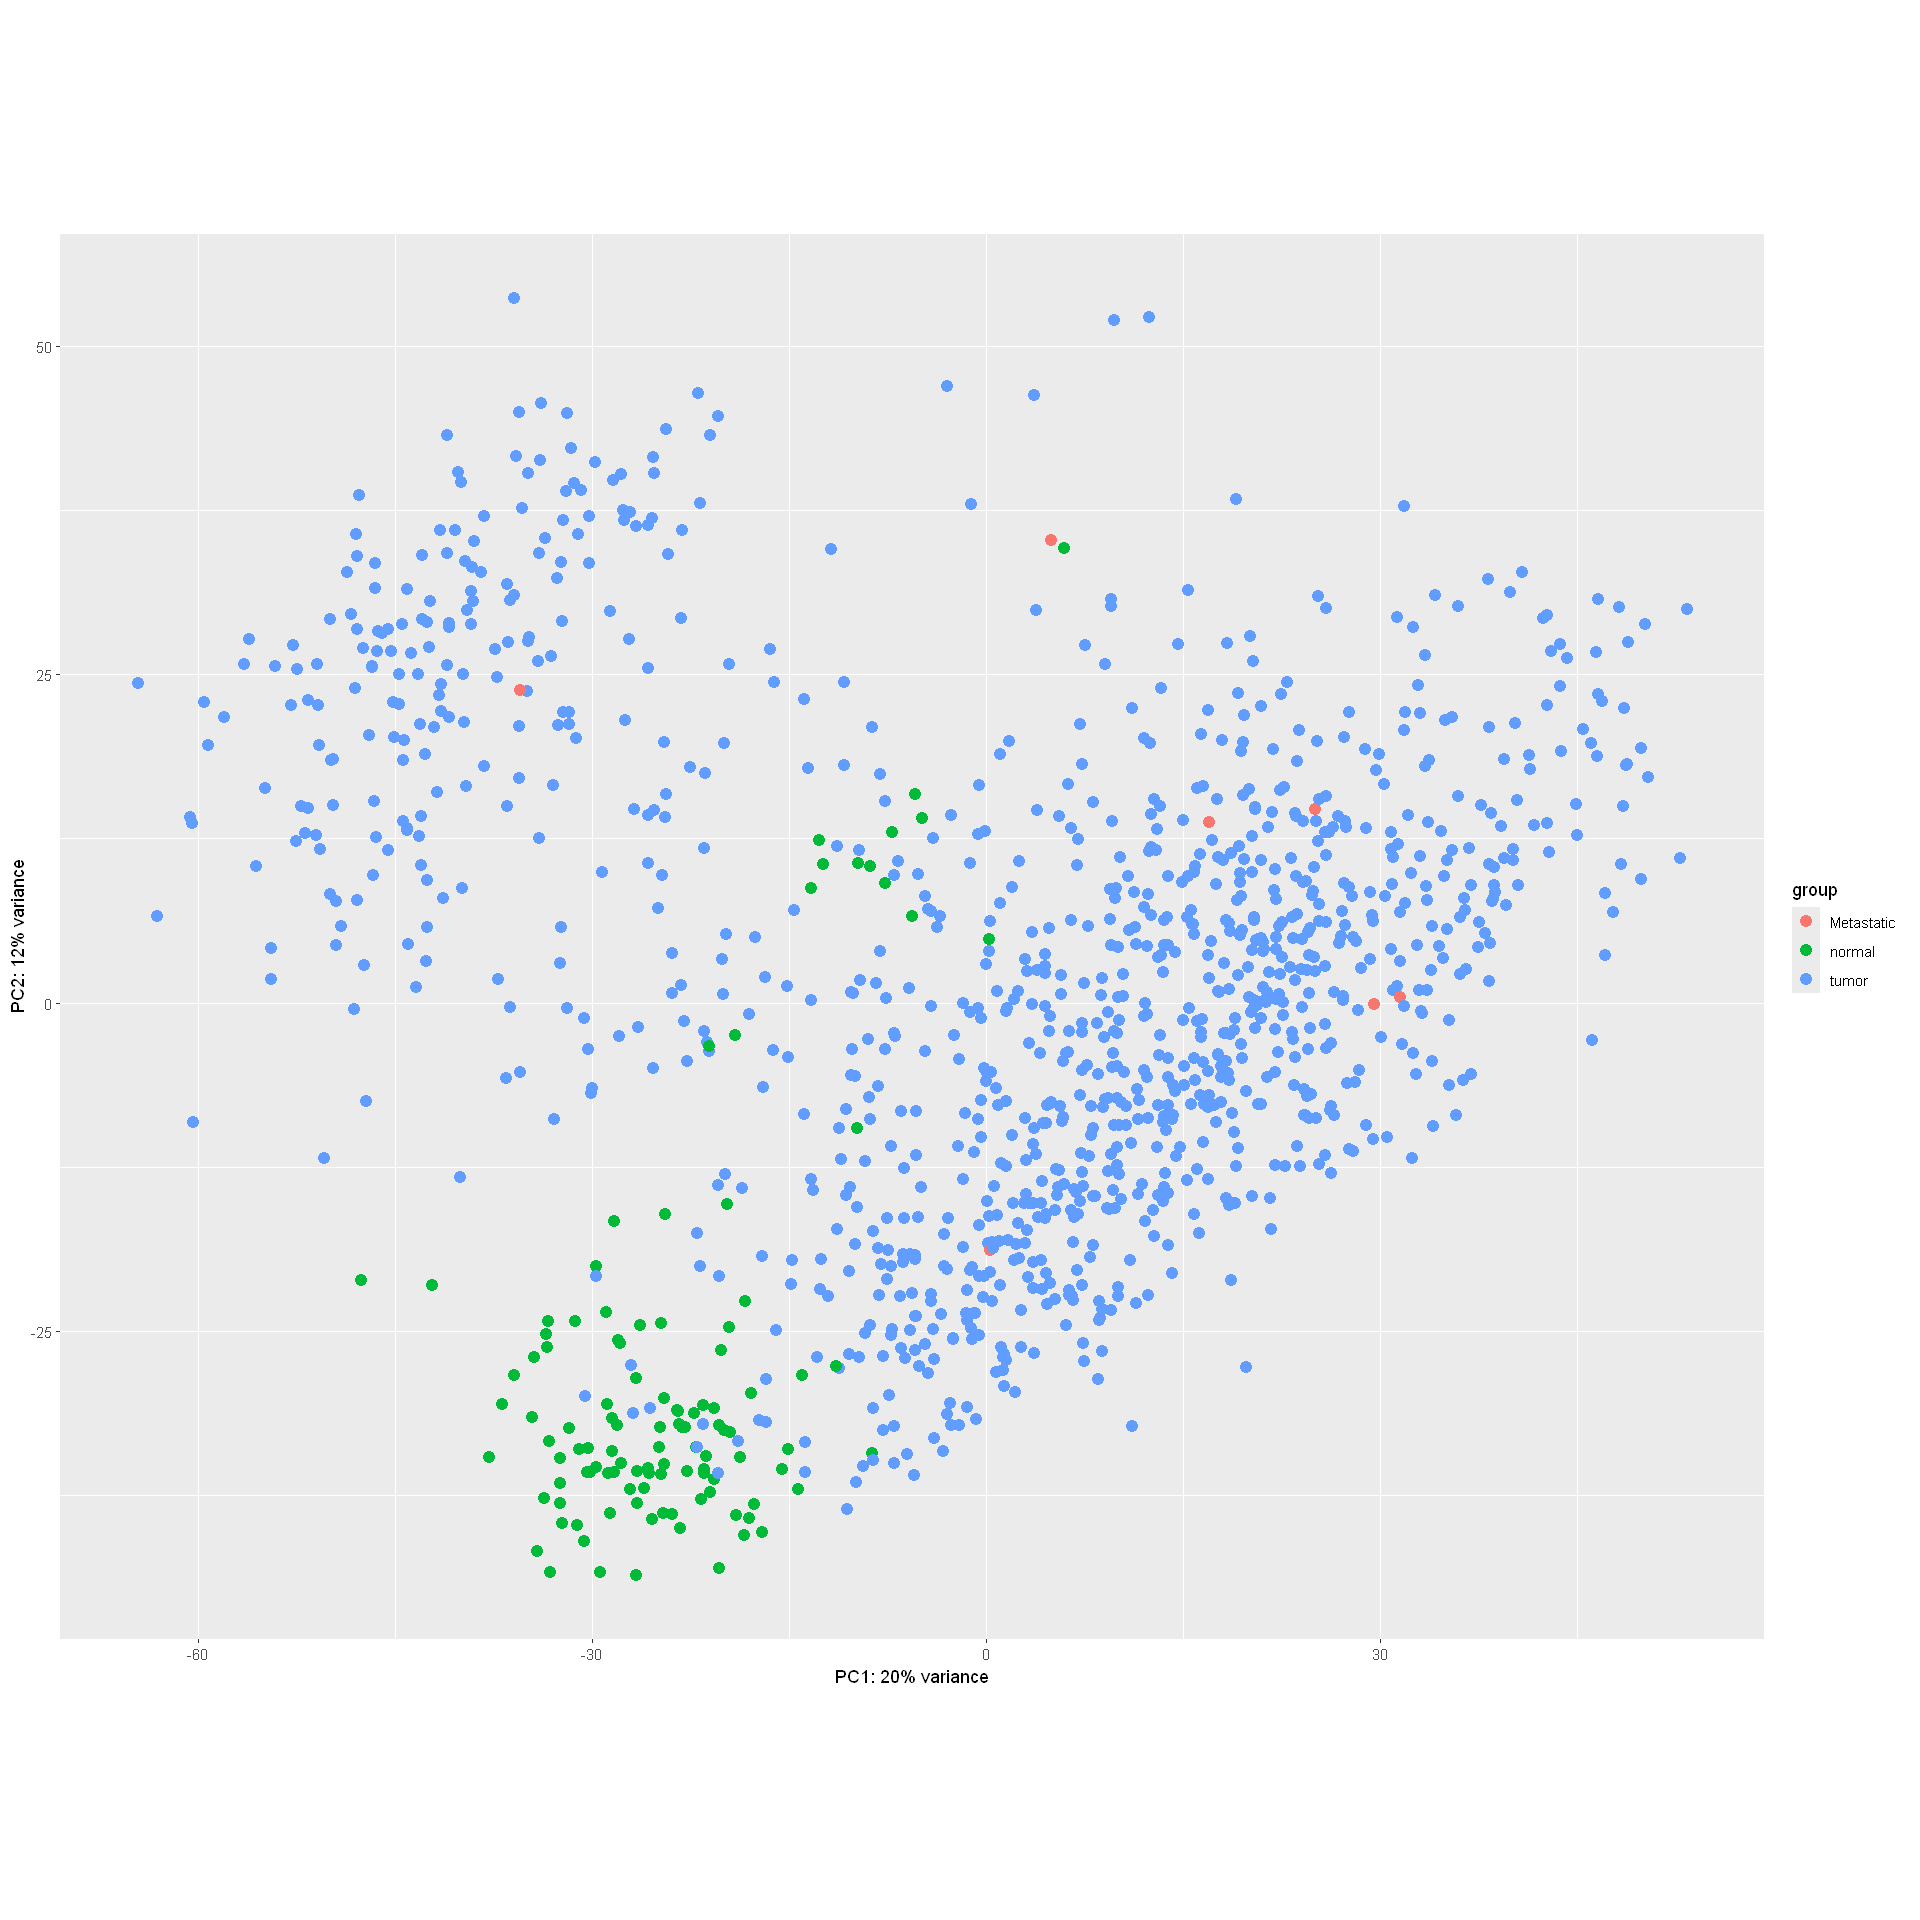

In [27]:
# Plot PCA by batch and sample type
plotPCA(vsd, intgroup = c('sample_type'),ntop=500)

In [25]:
# Calculation pair-wise correlations
count.correlation <- cor(count.data)

head(count.correlation)

TCGA-E9-A1RH-01A-21R-A169-07
TCGA-E9-A1RH-01A-21R-A169-07 1.0000000                   
TCGA-C8-A26W-01A-11R-A16F-07 0.5810220                   
TCGA-E9-A1RH-11A-34R-A169-07 0.4188206                   
TCGA-AO-A0JJ-01A-11R-A056-07 0.5158459                   
TCGA-BH-A0HO-01A-11R-A034-07 0.1812278                   
TCGA-BH-A18F-01A-11R-A12D-07 0.5750864                   
                             TCGA-C8-A26W-01A-11R-A16F-07
TCGA-E9-A1RH-01A-21R-A169-07 0.5810220                   
TCGA-C8-A26W-01A-11R-A16F-07 1.0000000                   
TCGA-E9-A1RH-11A-34R-A169-07 0.7078944                   
TCGA-AO-A0JJ-01A-11R-A056-07 0.8716450                   
TCGA-BH-A0HO-01A-11R-A034-07 0.2953337                   
TCGA-BH-A18F-01A-11R-A12D-07 0.9139183                   
                             TCGA-E9-A1RH-11A-34R-A169-07
TCGA-E9-A1RH-01A-21R-A169-07 0.4188206                   
TCGA-C8-A26W-01A-11R-A16F-07 0.7078944                   
TCGA-E9-A1RH-11A-34R-A169-07 1.0000000                   
TCGA-AO-A0JJ-01A-11R-A056-07 0.5872570                   
TCGA-BH-A0HO-01A-11R-A034-07 0.2040711                   
TCGA-BH-A18F-01A-11R-A12D-07 0.5918278                   
                             TCGA-AO-A0JJ-01A-11R-A056-07
TCGA-E9-A1RH-01A-21R-A169-07 0.5158459                   
TCGA-C8-A26W-01A-11R-A16F-07 0.8716450                   
TCGA-E9-A1RH-11A-34R-A169-07 0.5872570                   
TCGA-AO-A0JJ-01A-11R-A056-07 1.0000000                   
TCGA-BH-A0HO-01A-11R-A034-07 0.3115666                   
TCGA-BH-A18F-01A-11R-A12D-07 0.8885625                   
                             TCGA-BH-A0HO-01A-11R-A034-07
TCGA-E9-A1RH-01A-21R-A169-07 0.1812278                   
TCGA-C8-A26W-01A-11R-A16F-07 0.2953337                   
TCGA-E9-A1RH-11A-34R-A169-07 0.2040711                   
TCGA-AO-A0JJ-01A-11R-A056-07 0.3115666                   
TCGA-BH-A0HO-01A-11R-A034-07 1.0000000                   
TCGA-BH-A18F-01A-11R-A12D-07 0.2943915                   
                             TCGA-BH-A18F-01A-11R-A12D-07
TCGA-E9-A1RH-01A-21R-A169-07 0.5750864                   
TCGA-C8-A26W-01A-11R-A16F-07 0.9139183                   
TCGA-E9-A1RH-11A-34R-A169-07 0.5918278                   
TCGA-AO-A0JJ-01A-11R-A056-07 0.8885625                   
TCGA-BH-A0HO-01A-11R-A034-07 0.2943915                   
TCGA-BH-A18F-01A-11R-A12D-07 1.0000000                   
                             TCGA-C8-A12O-01A-11R-A115-07
TCGA-E9-A1RH-01A-21R-A169-07 0.5464161                   
TCGA-C8-A26W-01A-11R-A16F-07 0.8355048                   
TCGA-E9-A1RH-11A-34R-A169-07 0.4878402                   
TCGA-AO-A0JJ-01A-11R-A056-07 0.7832951                   
TCGA-BH-A0HO-01A-11R-A034-07 0.2639049                   
TCGA-BH-A18F-01A-11R-A12D-07 0.9027366                   
                             TCGA-AQ-A04H-01B-11R-A10J-07
TCGA-E9-A1RH-01A-21R-A169-07 0.5196930                   
TCGA-C8-A26W-01A-11R-A16F-07 0.8241165                   
TCGA-E9-A1RH-11A-34R-A169-07 0.7210535                   
TCGA-AO-A0JJ-01A-11R-A056-07 0.7160638                   
TCGA-BH-A0HO-01A-11R-A034-07 0.2723458                   
TCGA-BH-A18F-01A-11R-A12D-07 0.7705560                   
                             TCGA-BH-A0HY-01A-11R-A056-07
TCGA-E9-A1RH-01A-21R-A169-07 0.4915039                   
TCGA-C8-A26W-01A-11R-A16F-07 0.8299265                   
TCGA-E9-A1RH-11A-34R-A169-07 0.6071248                   
TCGA-AO-A0JJ-01A-11R-A056-07 0.7261629                   
TCGA-BH-A0HO-01A-11R-A034-07 0.2587449                   
TCGA-BH-A18F-01A-11R-A12D-07 0.8191779                   
                             TCGA-B6-A40B-01A-11R-A239-07 ⋯
TCGA-E9-A1RH-01A-21R-A169-07 0.5427819                    ⋯
TCGA-C8-A26W-01A-11R-A16F-07 0.8789487                    ⋯
TCGA-E9-A1RH-11A-34R-A169-07 0.5478681                    ⋯
TCGA-AO-A0JJ-01A-11R-A056-07 0.8137284                    ⋯
TCGA-BH-A0HO-01A-11R-A034-07 0.2664103                    ⋯
TCGA-BH-A18F-01

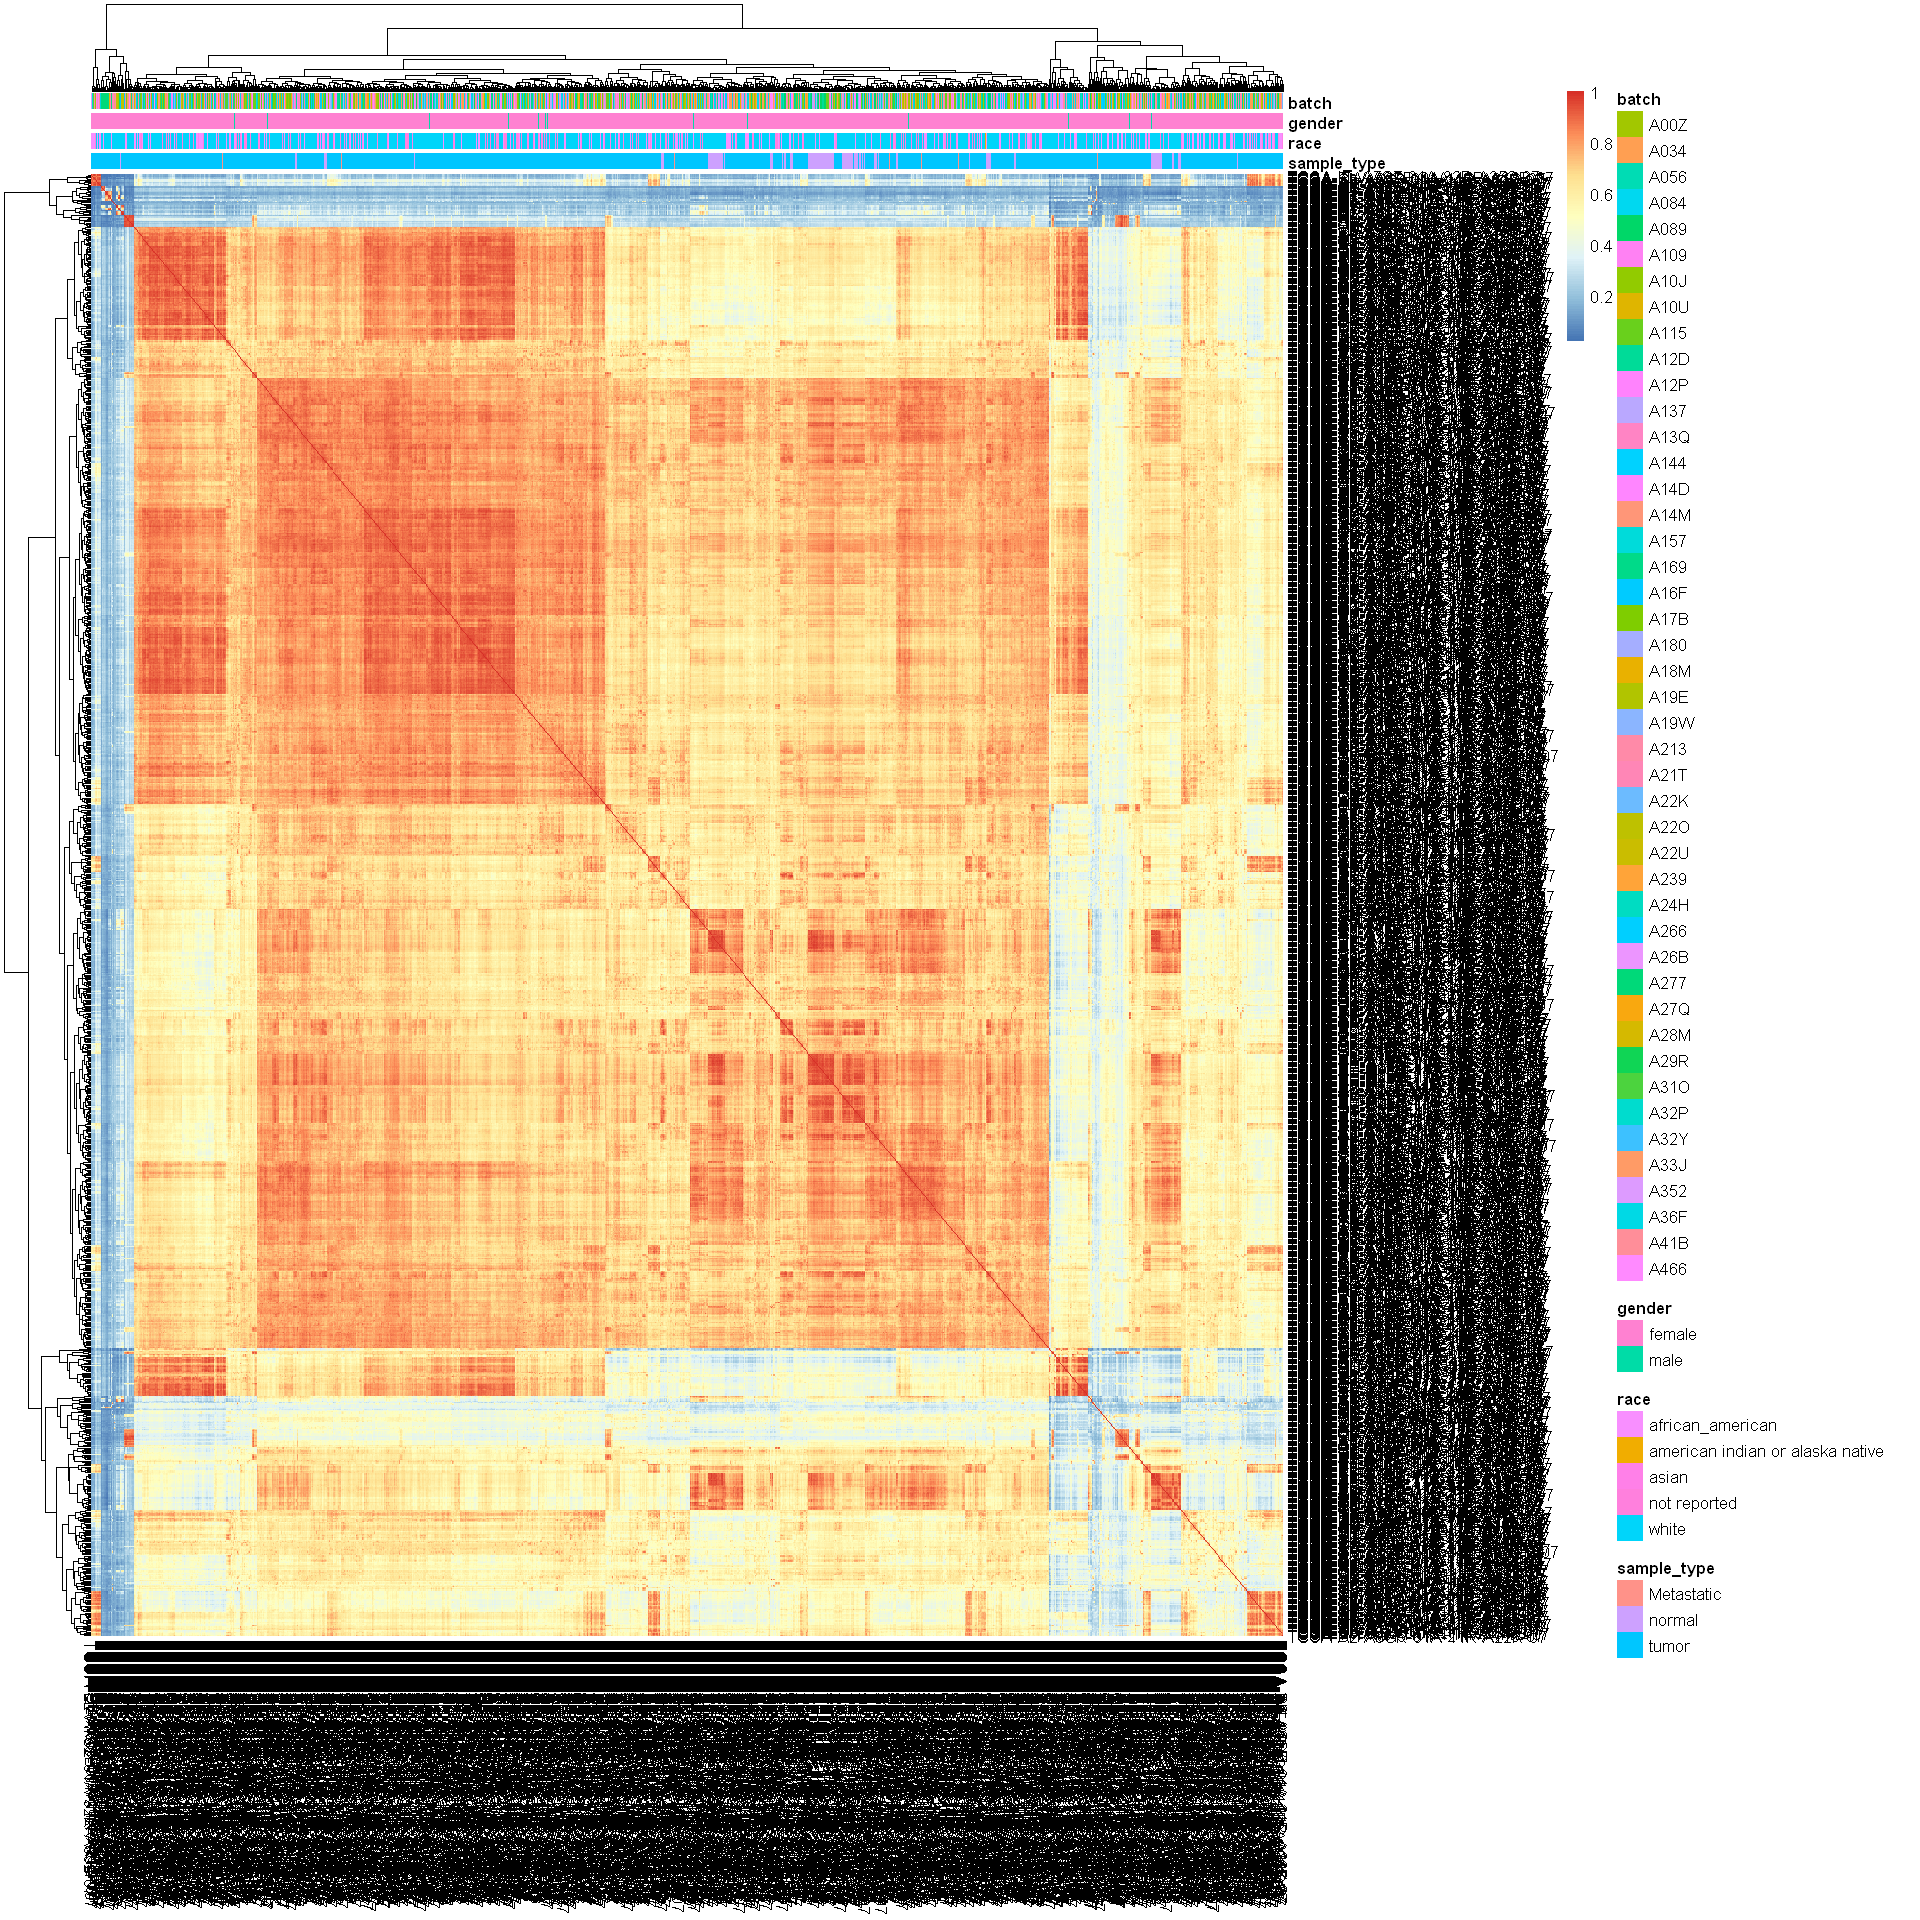

In [28]:
# Plot
pheatmap(count.correlation, 
         annotation_col = sample.data, 
         show_colnames = T, 
         show_rownames = T)

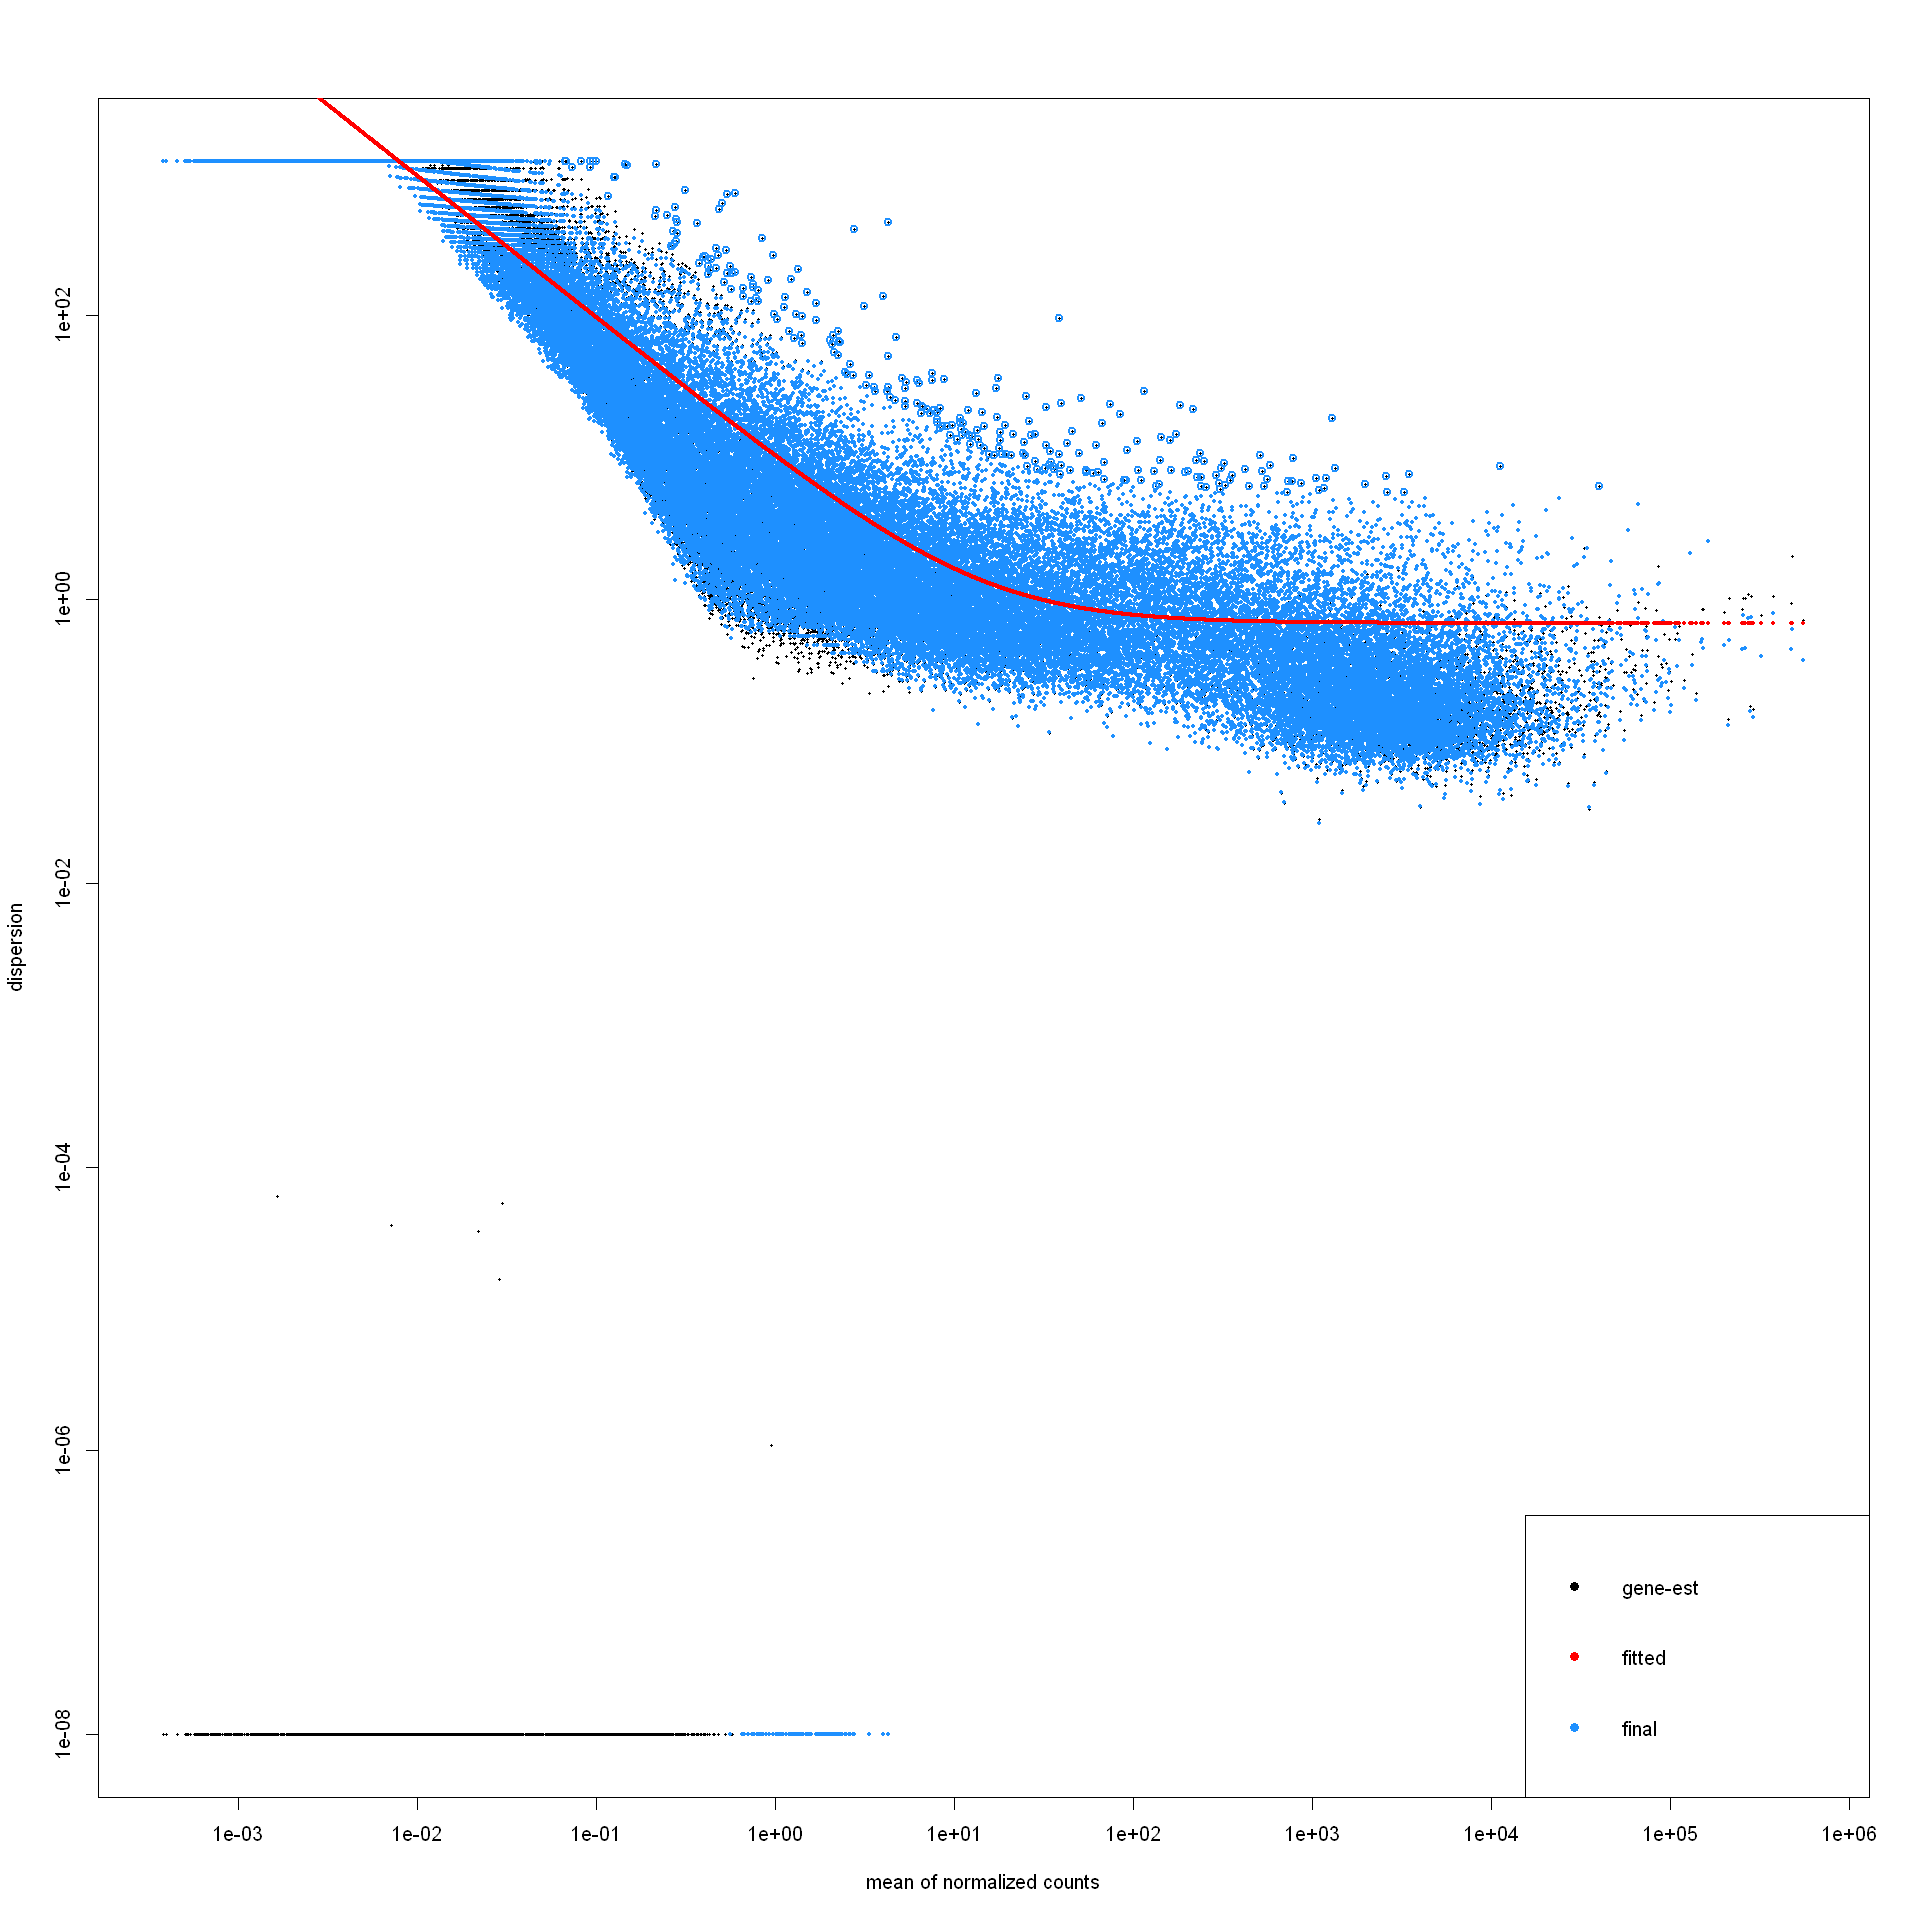

In [9]:
# Plot dispersion
plotDispEsts(loaded_dds)

In [29]:
# Get results based on contrast
res.DESeq2 <- results(loaded_dds, 
                      contrast=c("sample_type", "tumor", "normal")) 
summary(res.DESeq2)


out of 58048 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 19802, 34%
LFC < 0 (down)     : 11275, 19%
outliers [1]       : 121, 0.21%
low counts [2]     : 11225, 19%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



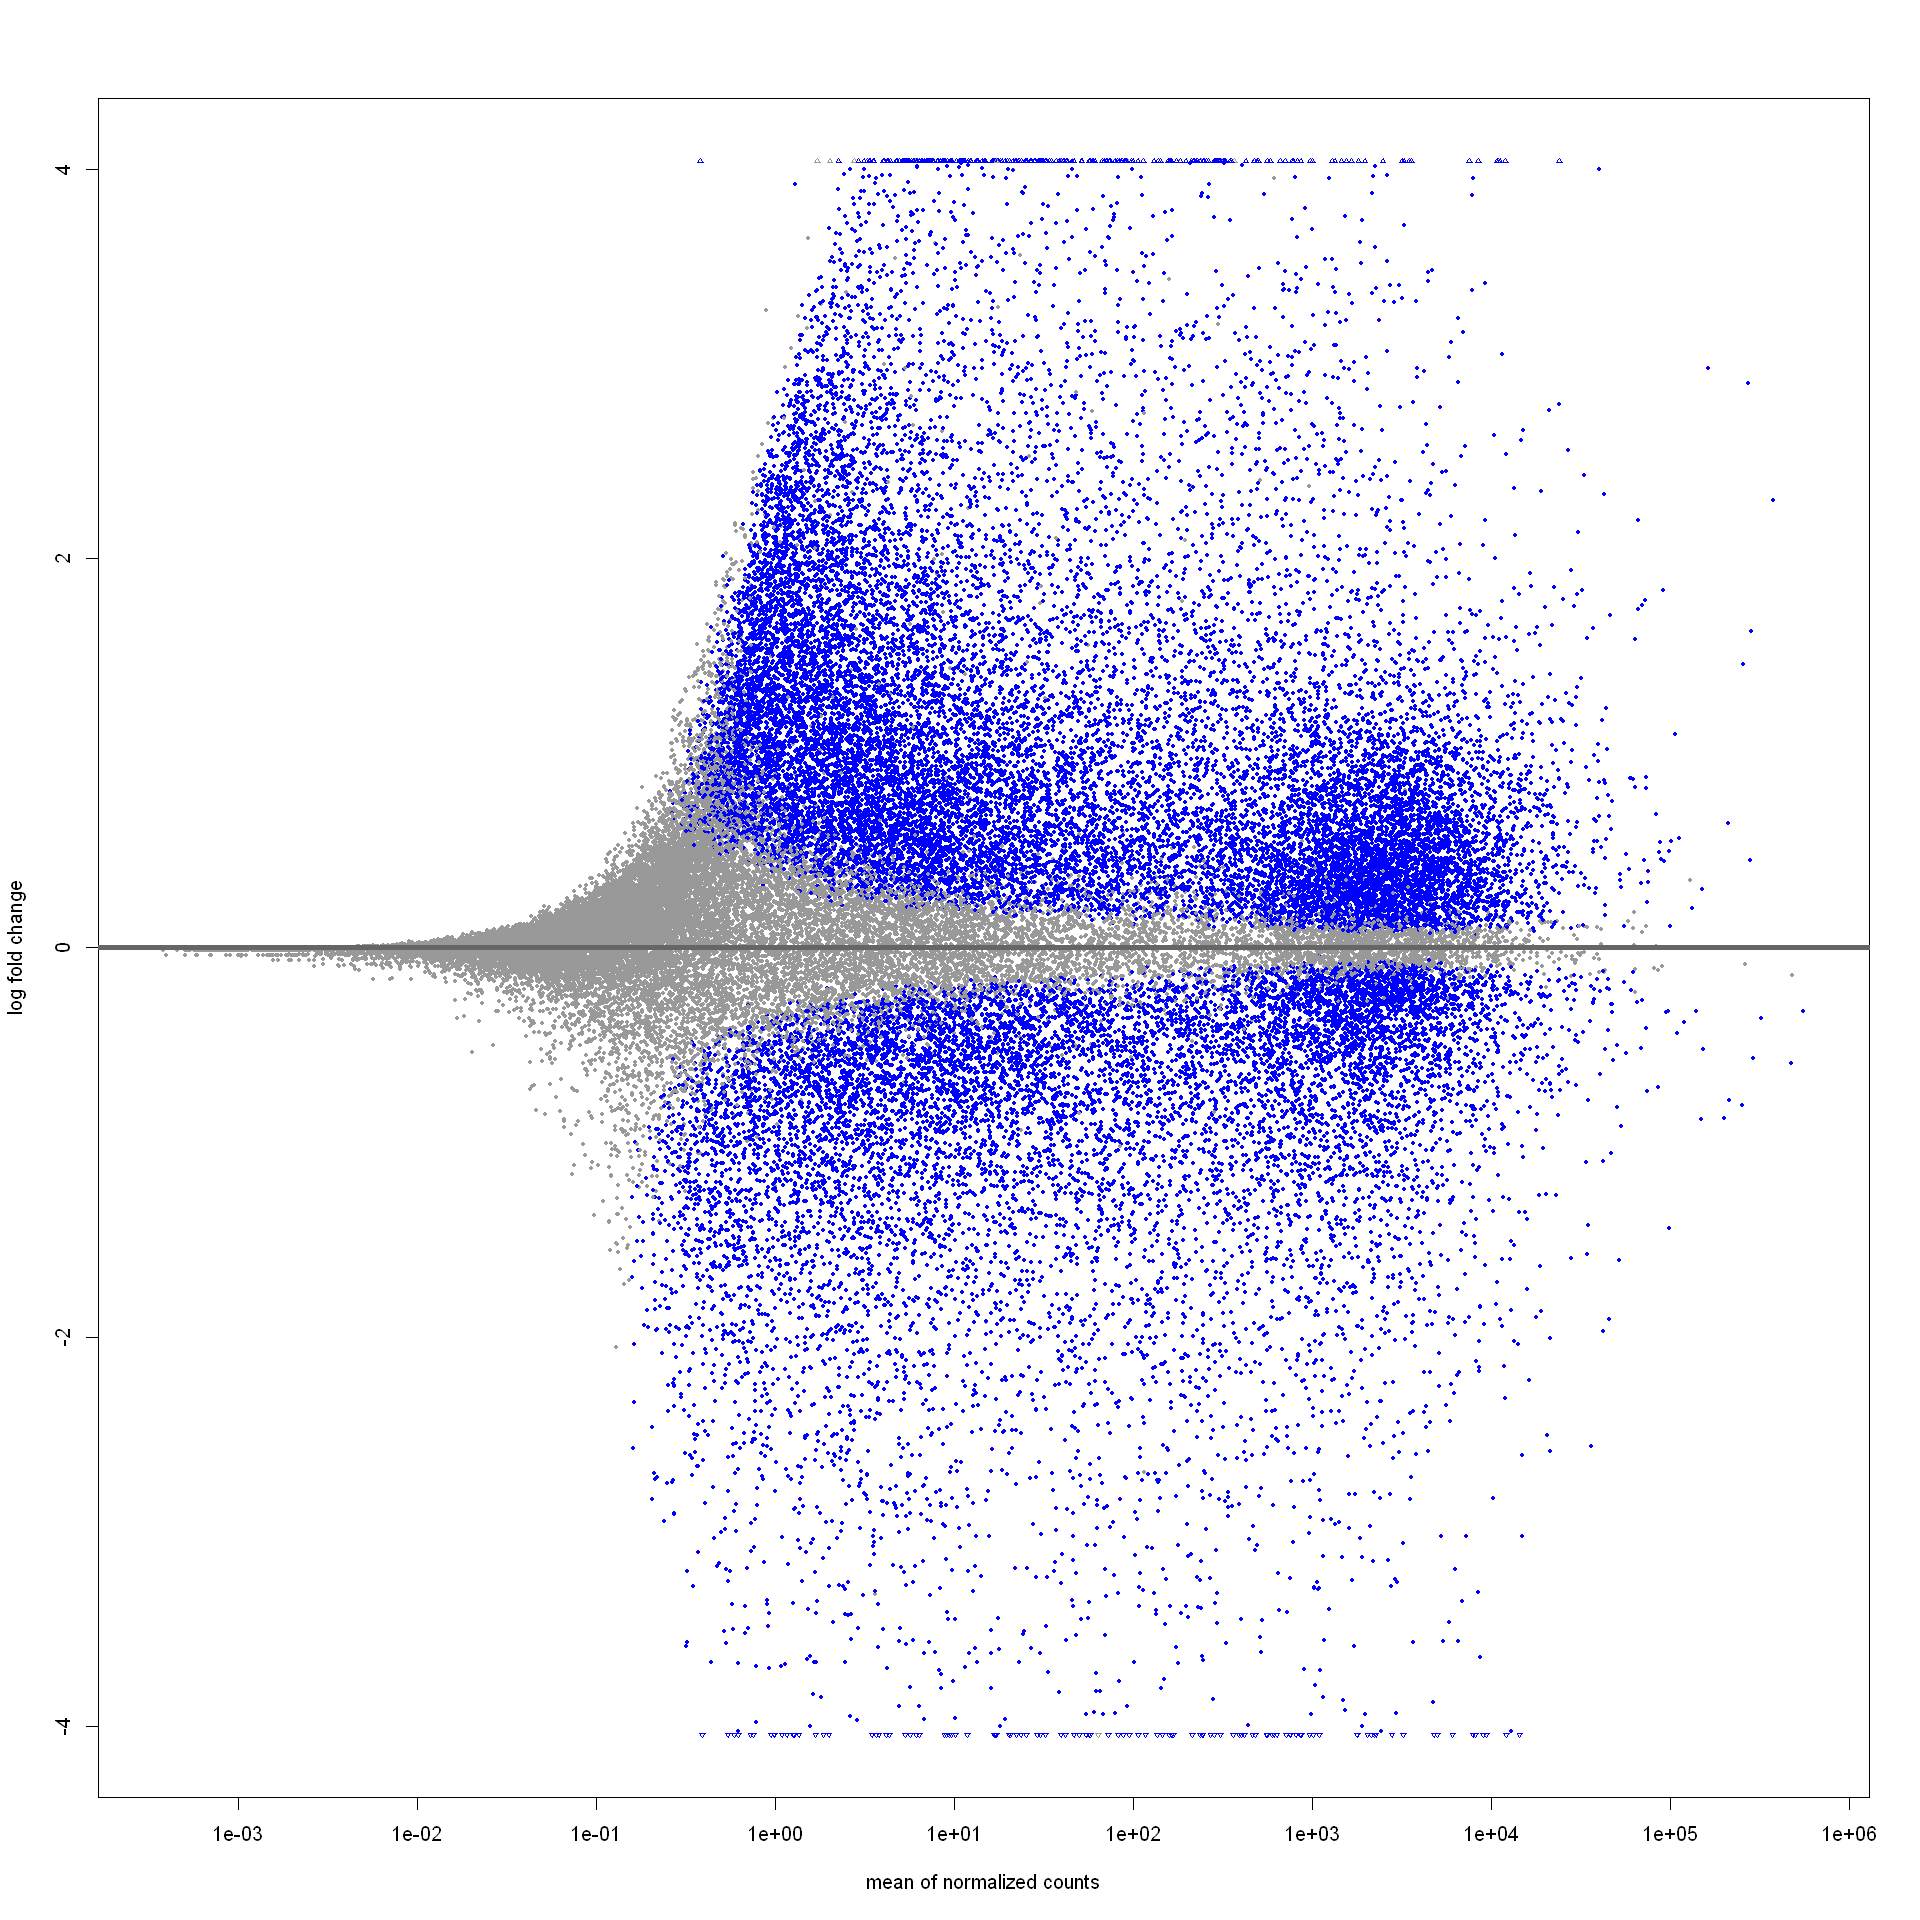

In [30]:
plotMA(res.DESeq2)

In [31]:
# Shrink log2 fold
res.shrink.DESeq2 <- lfcShrink(loaded_dds, 
                               contrast=c("sample_type", "tumor", "normal"), 
                               type="ashr")

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



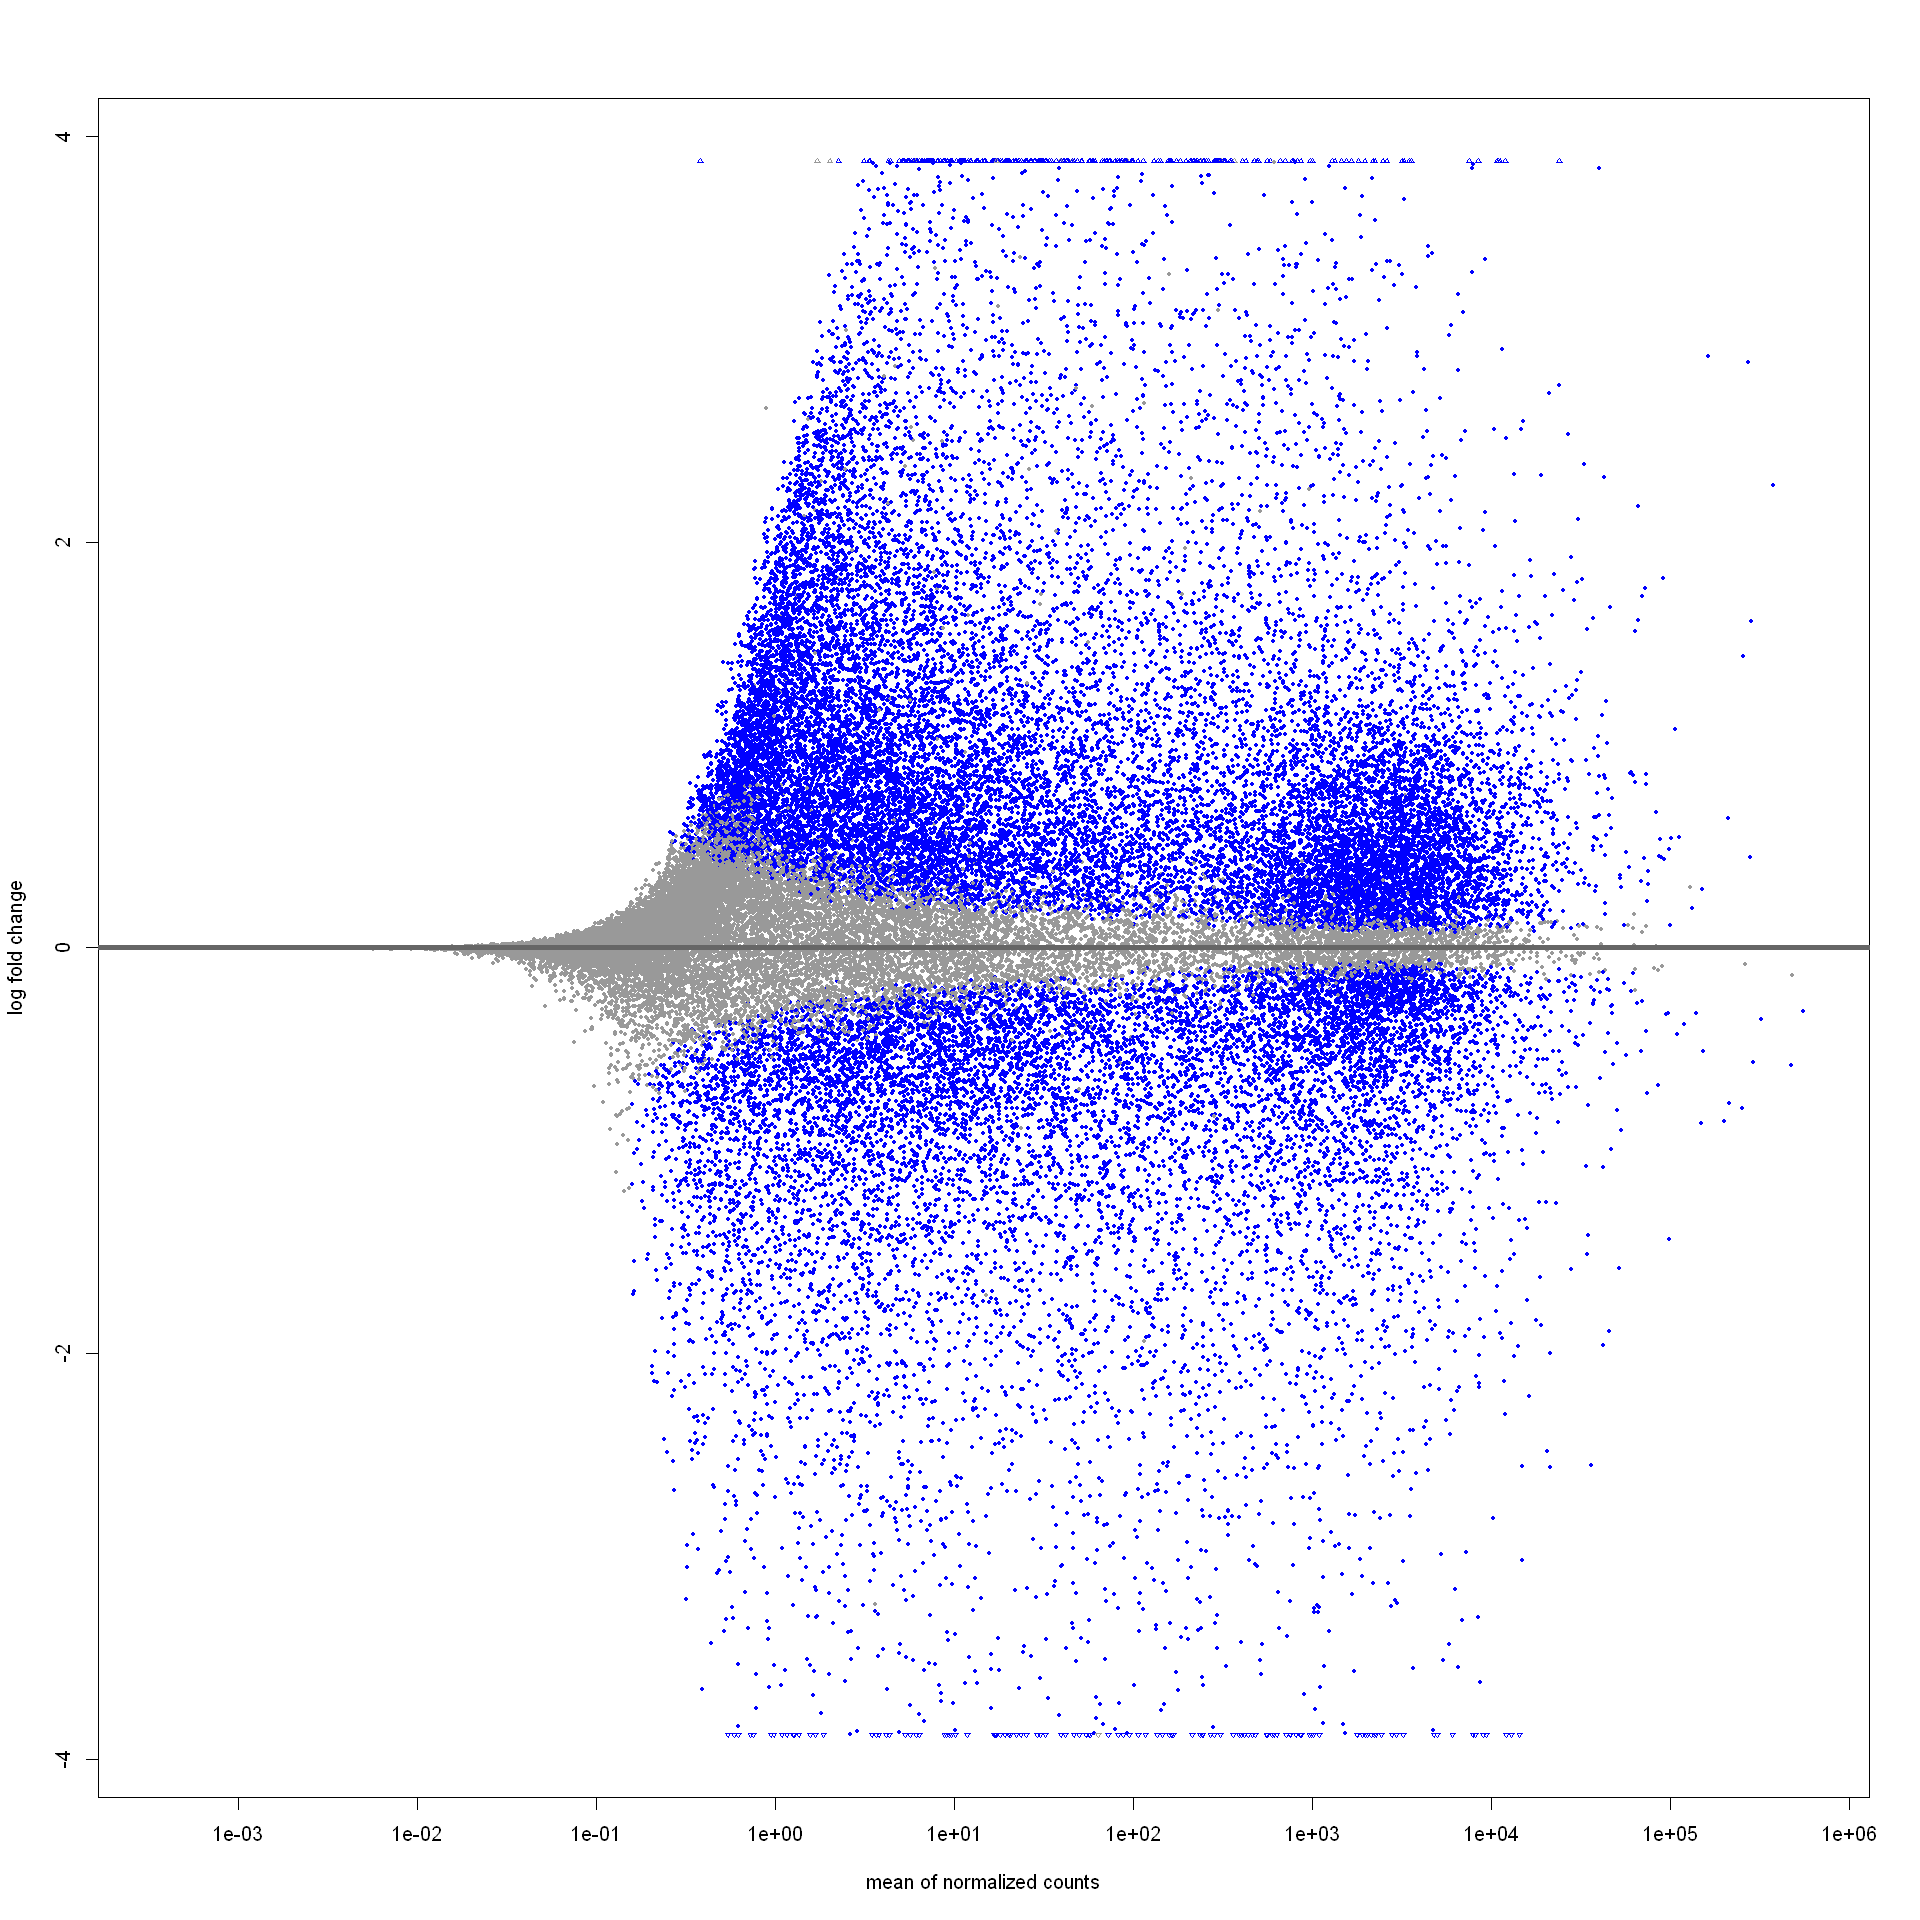

In [34]:
plotMA(res.shrink.DESeq2)

In [40]:
# Convert to dataframe
res.df <- as.data.frame(res.shrink.DESeq2)

head(res.df)

baseMean  log2FoldChange lfcSE      pvalue      
ENSG00000000003.15 3104.3324 -0.5609732     0.09306318 7.670342e-10
ENSG00000000005.6   153.6680 -3.1697081     0.24823668 6.981844e-39
ENSG00000000419.13 2305.1060  0.4214970     0.05604572 3.427589e-14
ENSG00000000457.14 1569.1278  0.4136517     0.05598954 9.504537e-14
ENSG00000000460.17  694.5149  1.3133590     0.07646141 2.637977e-67
ENSG00000000938.13  578.4283 -0.4588758     0.10097833 3.160843e-06
                   padj        
ENSG00000000003.15 2.803853e-09
ENSG00000000005.6  1.101203e-37
ENSG00000000419.13 1.693202e-13
ENSG00000000457.14 4.565267e-13
ENSG00000000460.17 1.075033e-65
ENSG00000000938.13 8.439637e-06

In [41]:
# Get the gene_id and gene_name
gene.anno <- gene.anno %>% 
             dplyr::select(gene_id, gene_name, gene_type) 

head(gene.anno)

gene_id            gene_name gene_type     
ENSG00000000003.15 ENSG00000000003.15 TSPAN6    protein_coding
ENSG00000000005.6  ENSG00000000005.6  TNMD      protein_coding
ENSG00000000419.13 ENSG00000000419.13 DPM1      protein_coding
ENSG00000000457.14 ENSG00000000457.14 SCYL3     protein_coding
ENSG00000000460.17 ENSG00000000460.17 C1orf112  protein_coding
ENSG00000000938.13 ENSG00000000938.13 FGR       protein_coding

In [42]:
# Join DE results with gene names
res.df <- res.df %>% 
          rownames_to_column("gene_id") %>% 
          left_join(gene.anno, by="gene_id")

head(res.df)

gene_id            baseMean  log2FoldChange lfcSE      pvalue      
1 ENSG00000000003.15 3104.3324 -0.5609732     0.09306318 7.670342e-10
2 ENSG00000000005.6   153.6680 -3.1697081     0.24823668 6.981844e-39
3 ENSG00000000419.13 2305.1060  0.4214970     0.05604572 3.427589e-14
4 ENSG00000000457.14 1569.1278  0.4136517     0.05598954 9.504537e-14
5 ENSG00000000460.17  694.5149  1.3133590     0.07646141 2.637977e-67
6 ENSG00000000938.13  578.4283 -0.4588758     0.10097833 3.160843e-06
  padj         gene_name gene_type     
1 2.803853e-09 TSPAN6    protein_coding
2 1.101203e-37 TNMD      protein_coding
3 1.693202e-13 DPM1      protein_coding
4 4.565267e-13 SCYL3     protein_coding
5 1.075033e-65 C1orf112  protein_coding
6 8.439637e-06 FGR       protein_coding

In [43]:
# Check number of genes
dim(res.df)

# Filter only protein_coding genes
res.df <- res.df %>% 
          filter(gene_type == "protein_coding")

# Check number of remaining genes
dim(res.df)

[1] 60660     8

[1] 19962     8

In [44]:
any(duplicated(res.df$gene_name))

[1] TRUE

In [45]:
# Filter duplicated gene names
dup_gene_names <- res.df %>% 
                  filter(duplicated(gene_name)) %>% 
                  pull(gene_name)

# See duplicated gene names
res.df %>% filter(gene_name %in% dup_gene_names)

gene_id                  baseMean     log2FoldChange lfcSE      pvalue      
1  ENSG00000002586.20       1.085393e+04 -0.0174394285  0.08189742 8.276679e-01
2  ENSG00000002586.20_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
3  ENSG00000015479.20       2.157209e+02  0.3671515467  0.12278111 1.862356e-03
4  ENSG00000124333.16       3.229795e+03  0.0659198043  0.04999944 1.830351e-01
5  ENSG00000124333.16_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
6  ENSG00000124334.17       1.625809e+01  1.9921777277  0.14796131 2.382265e-42
7  ENSG00000124334.17_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
8  ENSG00000128655.18       1.254489e+02 -2.3005067297  0.14294419 2.990751e-59
9  ENSG00000158427.15       1.907633e+01  0.8192312450  0.15429876 2.621299e-08
10 ENSG00000167393.18       7.560988e+02  0.3082943622  0.07950926 7.821096e-05
11 ENSG00000167393.18_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
12 ENSG00000168255.20       7.798909e+01  0.3782537634  0.10474784 2.015121e-04
13 ENSG00000169084.15       1.410484e+03  0.4126171368  0.05781511 6.097569e-13
14 ENSG00000169084.15_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
15 ENSG00000169093.16       1.586621e+03 -0.0644629401  0.06538342 3.166024e-01
16 ENSG00000169093.16_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
17 ENSG00000169100.14       2.363848e+04 -0.1661576602  0.07451994 2.290317e-02
18 ENSG00000169100.14_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
19 ENSG00000178605.13       2.402193e+03  0.1142603737  0.06793496 8.702980e-02
20 ENSG00000178605.13_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
21 ENSG00000182162.11       4.406864e+02  0.4712842064  0.11568804 2.569538e-05
22 ENSG00000182162.11_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
23 ENSG00000182378.14       1.082913e+03 -0.0550551735  0.08399663 5.022213e-01
24 ENSG00000182378.14_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
25 ENSG00000182484.15       3.254776e+02  0.3167392433  0.07997450 5.478157e-05
26 ENSG00000182484.15_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
27 ENSG00000182584.6        5.492985e+00  0.3860083685  0.13918926 3.572826e-03
28 ENSG00000185291.12       6.239551e+02 -0.6399143643  0.07880574 1.785837e-16
29 ENSG00000185291.12_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
30 ENSG00000185960.14       3.081700e+00 -2.0253299730  0.21101754 7.060880e-23
31 ENSG00000185960.14_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
32 ENSG00000196433.13       8.499466e+00  0.0297350899  0.14256888 8.258106e-01
33 ENSG00000196433.13_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
34 ENSG00000197976.12       2.386775e+03  0.1526138423  0.05346080 3.882340e-03
35 ENSG00000197976.12_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
36 ENSG00000198223.17       5.646007e+02 -0.4387201748  0.10270927 1.156219e-05
37 ENSG00000198223.17_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
38 ENSG00000205755.12       6.054314e+00 -0.1525681043  0.14409997 2.624721e-01
39 ENSG00000205755.12_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
40 ENSG00000214717.12       4.400589e+03  0.1479695387  0.04845926 2.048844e-03
41 ENSG00000214717.12_PAR_Y 0.000000e+00  0.0000000000  1.06806628           NA
42 ENSG00000269226.7        6.521148e+00 -0.0284434585  0.13887335 8.292642e-01
43 ENSG00000280987.4        5.712048e-01  0.0513978669  0.24843426 8.134743e-01
44 ENSG00000284741.1        1.932325e-02  0.0032841930  0.89023681 9.913701e-01
45 ENSG00000285064.2        6.514396e-04 -0.0005967579  1.00529605 9.976161e-01
46 ENSG00000285437.1        1.684119e+01  0.8133829982  0.14150097 2.193187e-09
47 ENSG00000286920.2        3.556203e-01  0.4710320563  0.30617952 6.534174e-02
48 ENSG00000288649.1        0.000000e+00  0.0000000000  1.06806628           NA
   padj         gene_name gene_type     
1  8.735902e-01 CD99      protein_coding
2

In [46]:
# Sort pvalues from lowest to highest, then pick the lowest
res.df <- res.df %>%
          arrange(padj) %>% 
          distinct(gene_name, .keep_all = TRUE)

# Check gene names for duplication
res.df %>% filter(gene_name %in% dup_gene_names)

# Check if any more duplications
any(duplicated(res.df$gene_name))

gene_id            baseMean     log2FoldChange lfcSE      pvalue      
1  ENSG00000128655.18 1.254489e+02 -2.30050673    0.14294419 2.990751e-59
2  ENSG00000124334.17 1.625809e+01  1.99217773    0.14796131 2.382265e-42
3  ENSG00000185960.14 3.081700e+00 -2.02532997    0.21101754 7.060880e-23
4  ENSG00000185291.12 6.239551e+02 -0.63991436    0.07880574 1.785837e-16
5  ENSG00000169084.15 1.410484e+03  0.41261714    0.05781511 6.097569e-13
6  ENSG00000285437.1  1.684119e+01  0.81338300    0.14150097 2.193187e-09
7  ENSG00000158427.15 1.907633e+01  0.81923124    0.15429876 2.621299e-08
8  ENSG00000198223.17 5.646007e+02 -0.43872017    0.10270927 1.156219e-05
9  ENSG00000182162.11 4.406864e+02  0.47128421    0.11568804 2.569538e-05
10 ENSG00000182484.15 3.254776e+02  0.31673924    0.07997450 5.478157e-05
11 ENSG00000167393.18 7.560988e+02  0.30829436    0.07950926 7.821096e-05
12 ENSG00000015479.20 2.157209e+02  0.36715155    0.12278111 1.862356e-03
13 ENSG00000214717.12 4.400589e+03  0.14796954    0.04845926 2.048844e-03
14 ENSG00000182584.6  5.492985e+00  0.38600837    0.13918926 3.572826e-03
15 ENSG00000197976.12 2.386775e+03  0.15261384    0.05346080 3.882340e-03
16 ENSG00000169100.14 2.363848e+04 -0.16615766    0.07451994 2.290317e-02
17 ENSG00000286920.2  3.556203e-01  0.47103206    0.30617952 6.534174e-02
18 ENSG00000178605.13 2.402193e+03  0.11426037    0.06793496 8.702980e-02
19 ENSG00000124333.16 3.229795e+03  0.06591980    0.04999944 1.830351e-01
20 ENSG00000205755.12 6.054314e+00 -0.15256810    0.14409997 2.624721e-01
21 ENSG00000169093.16 1.586621e+03 -0.06446294    0.06538342 3.166024e-01
22 ENSG00000182378.14 1.082913e+03 -0.05505517    0.08399663 5.022213e-01
23 ENSG00000196433.13 8.499466e+00  0.02973509    0.14256888 8.258106e-01
24 ENSG00000002586.20 1.085393e+04 -0.01743943    0.08189742 8.276679e-01
   padj         gene_name gene_type     
1  9.380394e-58 PDE11A    protein_coding
2  4.285868e-41 IL9R      protein_coding
3  5.561768e-22 SHOX      protein_coding
4  1.008125e-15 IL3RA     protein_coding
5  2.783119e-12 DHRSX     protein_coding
6  7.739627e-09 POLR2J3   protein_coding
7  8.453246e-08 TMSB15B   protein_coding
8  2.914542e-05 CSF2RA    protein_coding
9  6.231633e-05 P2RY8     protein_coding
10 1.280549e-04 WASH6P    protein_coding
11 1.795070e-04 PPP2R3B   protein_coding
12 3.600436e-03 MATR3     protein_coding
13 3.936362e-03 ZBED1     protein_coding
14 6.628983e-03 ACTL10    protein_coding
15 7.167373e-03 AKAP17A   protein_coding
16 3.747149e-02 SLC25A6   protein_coding
17 9.835906e-02 SMIM40    protein_coding
18 1.276488e-01 GTPBP6    protein_coding
19 2.487373e-01 VAMP7     protein_coding
20 3.415714e-01 CRLF2     protein_coding
21 4.017598e-01 ASMTL     protein_coding
22 5.936406e-01 PLCXD1    protein_coding
23 8.721621e-01 ASMT      protein_coding
24 8.735902e-01 CD99      protein_coding

[1] FALSE

In [47]:
# Filter by p-value and log2 fold change
deg.df <- res.df %>% 
          filter(padj < 0.05) %>% 
          filter(abs(log2FoldChange) > 1) 

head(deg.df)

gene_id            baseMean  log2FoldChange lfcSE     pvalue       
1 ENSG00000099953.10 24128.713  6.209371      0.1444367  0.000000e+00
2 ENSG00000101605.13   557.879 -4.729958      0.1231026  0.000000e+00
3 ENSG00000119927.14  4805.515 -4.286995      0.1045970  0.000000e+00
4 ENSG00000123500.10  8508.502  7.105913      0.1562923  0.000000e+00
5 ENSG00000117650.13  1467.549  4.157178      0.1121924 9.186478e-303
6 ENSG00000022267.19  9043.842 -4.925569      0.1406956 2.732241e-271
  padj          gene_name gene_type     
1  0.000000e+00 MMP11     protein_coding
2  0.000000e+00 MYOM1     protein_coding
3  0.000000e+00 GPAM      protein_coding
4  0.000000e+00 COL10A1   protein_coding
5 8.580538e-299 NEK2      protein_coding
6 1.822873e-267 FHL1      protein_coding

In [48]:
# Upregulated genes
deg.up <- deg.df %>% 
          filter(padj < 0.05) %>% 
          filter(log2FoldChange > 1) %>%  
          arrange(padj)

# Downregulatd genes
deg.down <- deg.df %>% 
            filter(padj < 0.05) %>% 
            filter(log2FoldChange < -1) %>%  
            arrange(padj)

head(deg.up)
head(deg.down)

gene_id            baseMean  log2FoldChange lfcSE     pvalue       
1 ENSG00000099953.10 24128.713 6.209371       0.1444367  0.000000e+00
2 ENSG00000123500.10  8508.502 7.105913       0.1562923  0.000000e+00
3 ENSG00000117650.13  1467.549 4.157178       0.1121924 9.186478e-303
4 ENSG00000060718.22 11993.748 6.149808       0.1778572 1.898304e-265
5 ENSG00000090889.12  1539.004 3.739803       0.1121651 1.069976e-245
6 ENSG00000127564.17   922.351 3.784278       0.1146965 1.043166e-240
  padj          gene_name gene_type     
1  0.000000e+00 MMP11     protein_coding
2  0.000000e+00 COL10A1   protein_coding
3 8.580538e-299 NEK2      protein_coding
4 9.850513e-262 COL11A1   protein_coding
5 4.997002e-242 KIF4A     protein_coding
6 4.059830e-237 PKMYT1    protein_coding

gene_id            baseMean   log2FoldChange lfcSE      pvalue       
1 ENSG00000101605.13   557.8790 -4.729958      0.12310257  0.000000e+00
2 ENSG00000119927.14  4805.5151 -4.286995      0.10459695  0.000000e+00
3 ENSG00000022267.19  9043.8420 -4.925569      0.14069561 2.732241e-271
4 ENSG00000079308.19 15028.0313 -3.015924      0.08675633 3.422968e-266
5 ENSG00000133800.9    753.8624 -4.828455      0.14585296 4.905253e-243
6 ENSG00000095637.22  6556.4347 -3.546585      0.11101732 9.299865e-226
  padj          gene_name gene_type     
1  0.000000e+00 MYOM1     protein_coding
2  0.000000e+00 GPAM      protein_coding
3 1.822873e-267 FHL1      protein_coding
4 1.998243e-262 TNS1      protein_coding
5 2.082592e-239 LYVE1     protein_coding
6 3.102302e-222 SORBS1    protein_coding

Warning message:
"One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value..."


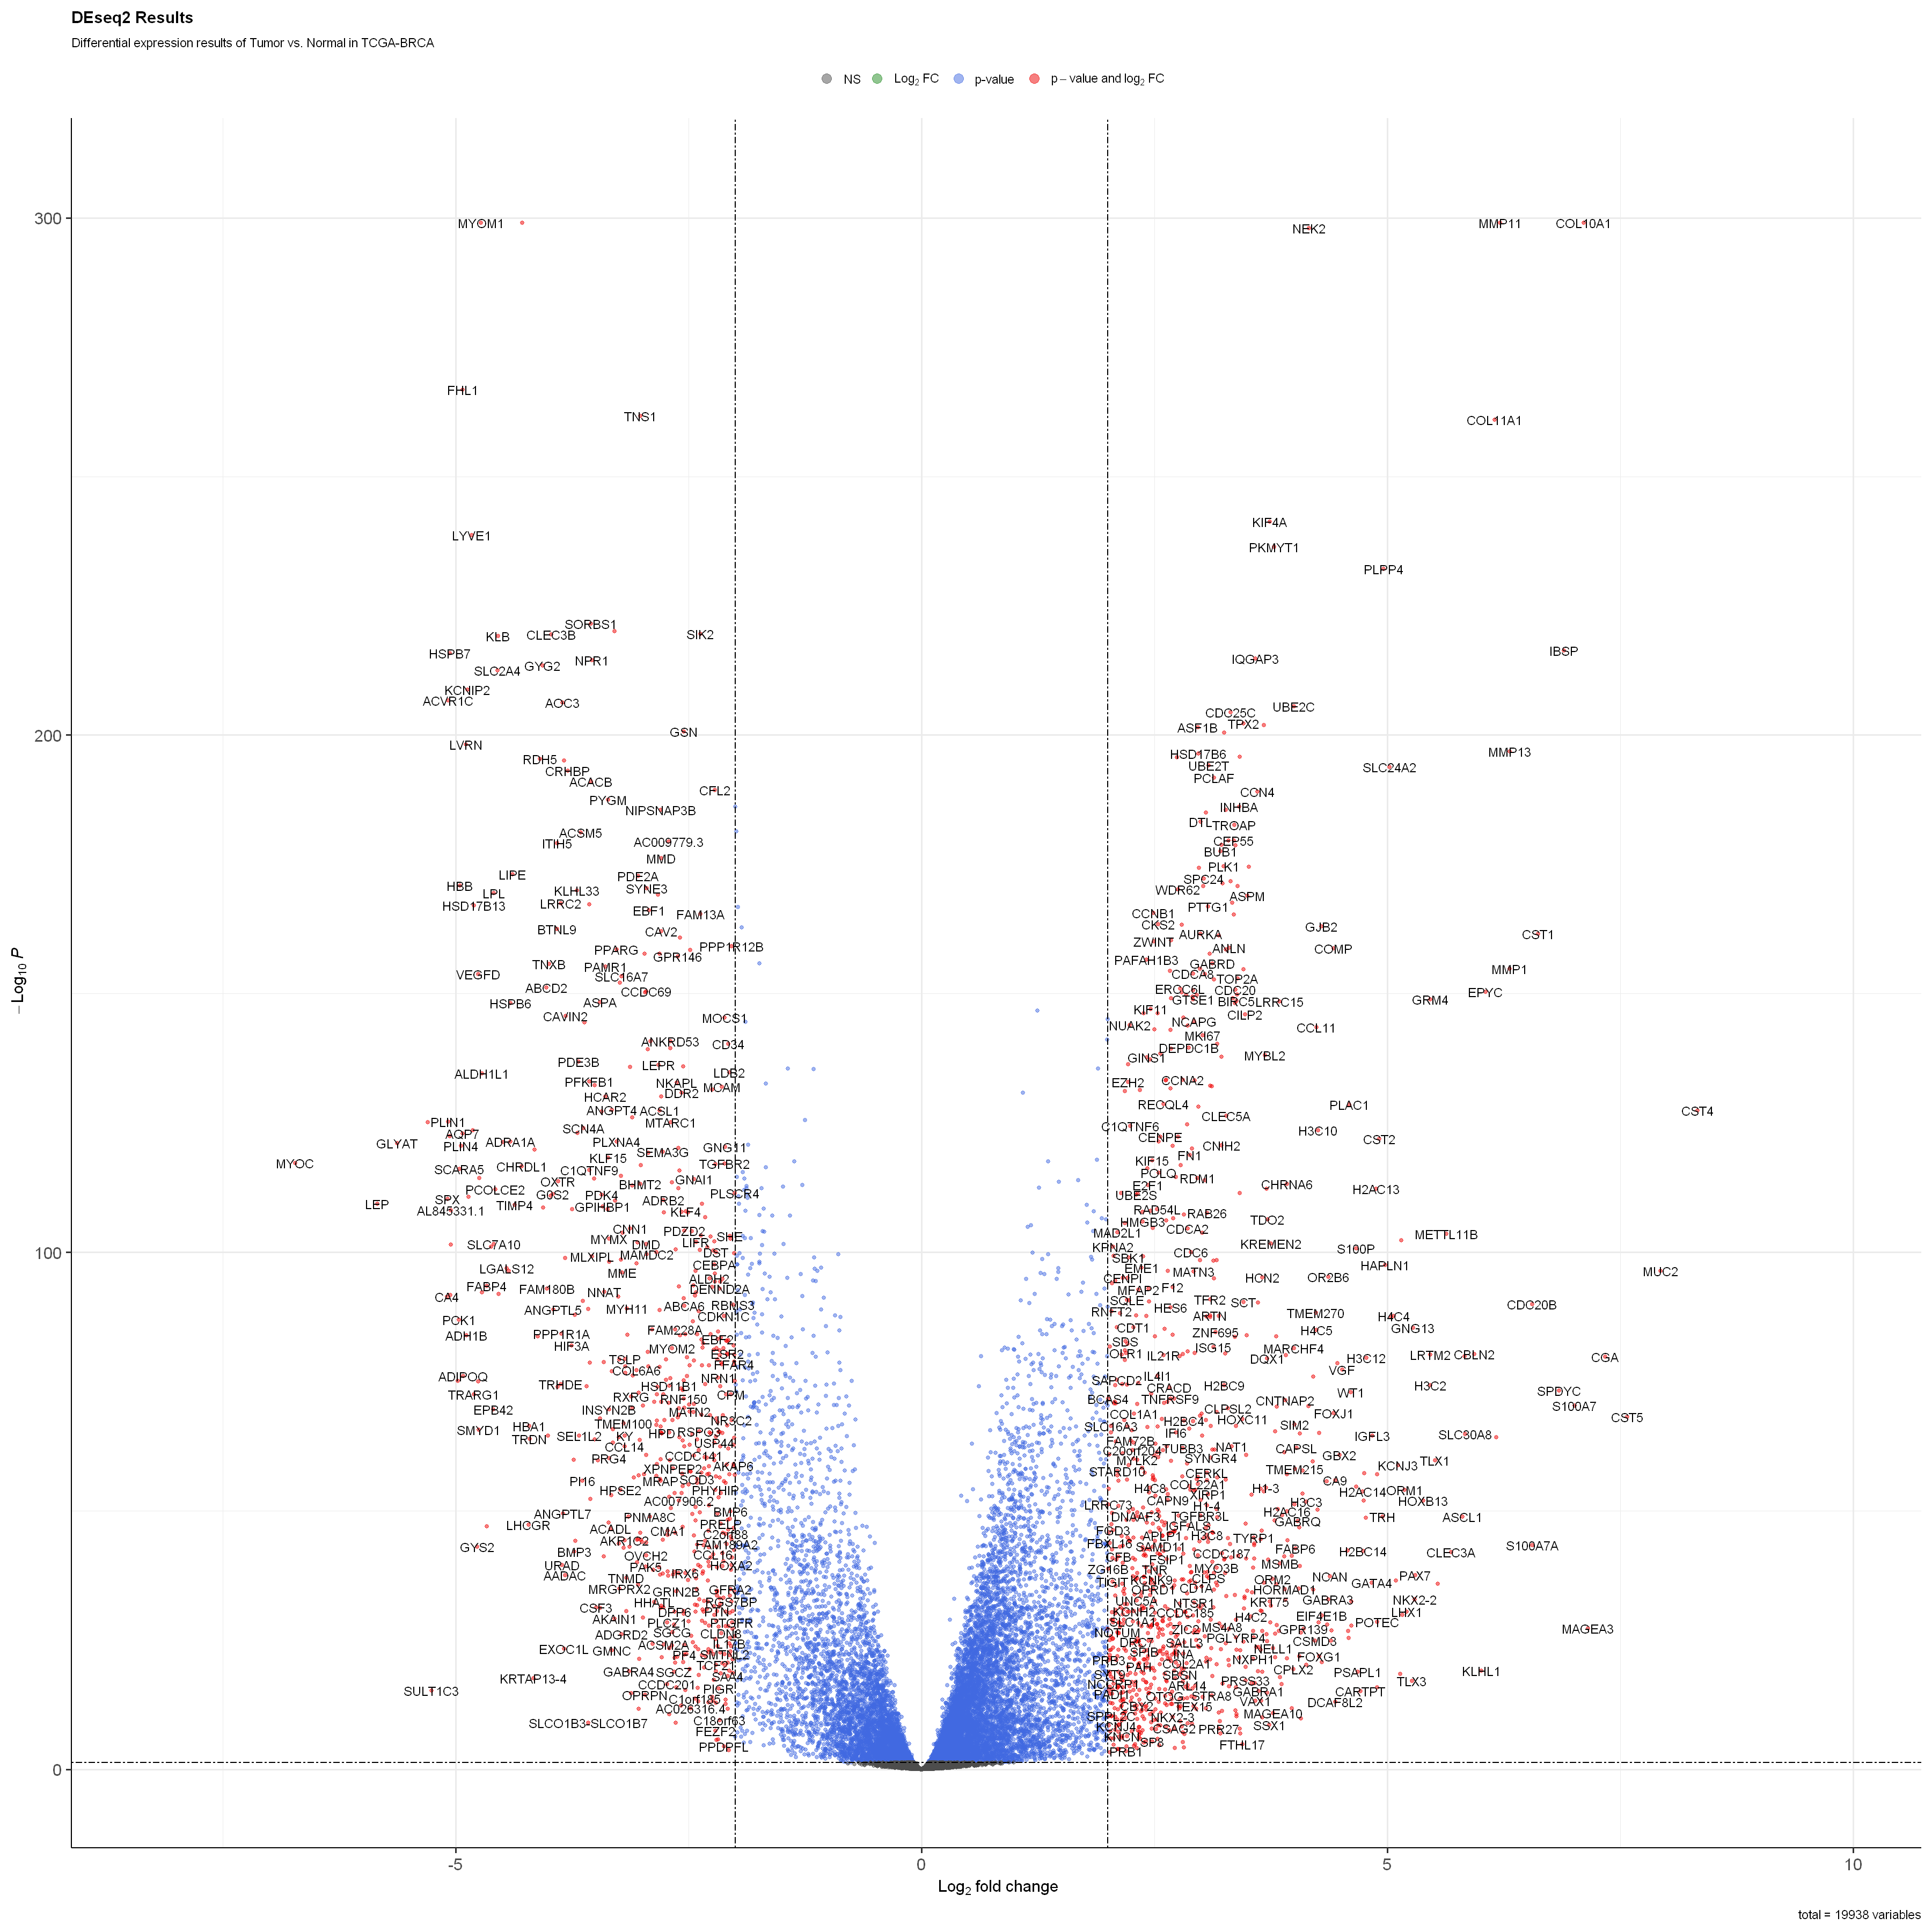

In [ ]:
# set plot dimensions
options(repr.plot.width=30, repr.plot.height=30)

# Plot
EnhancedVolcano(res.df,
                lab = res.df$gene_name,
                x = 'log2FoldChange',
                y = 'padj',
                pCutoff = 0.05,
                FCcutoff = 2,
                cutoffLineType = 'twodash',
                cutoffLineWidth = 0.8,
                title = 'DEseq2 Results',
                subtitle = "Differential expression results of Tumor vs. Normal in TCGA-BRCA"
               )

Warning message:
"One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value..."


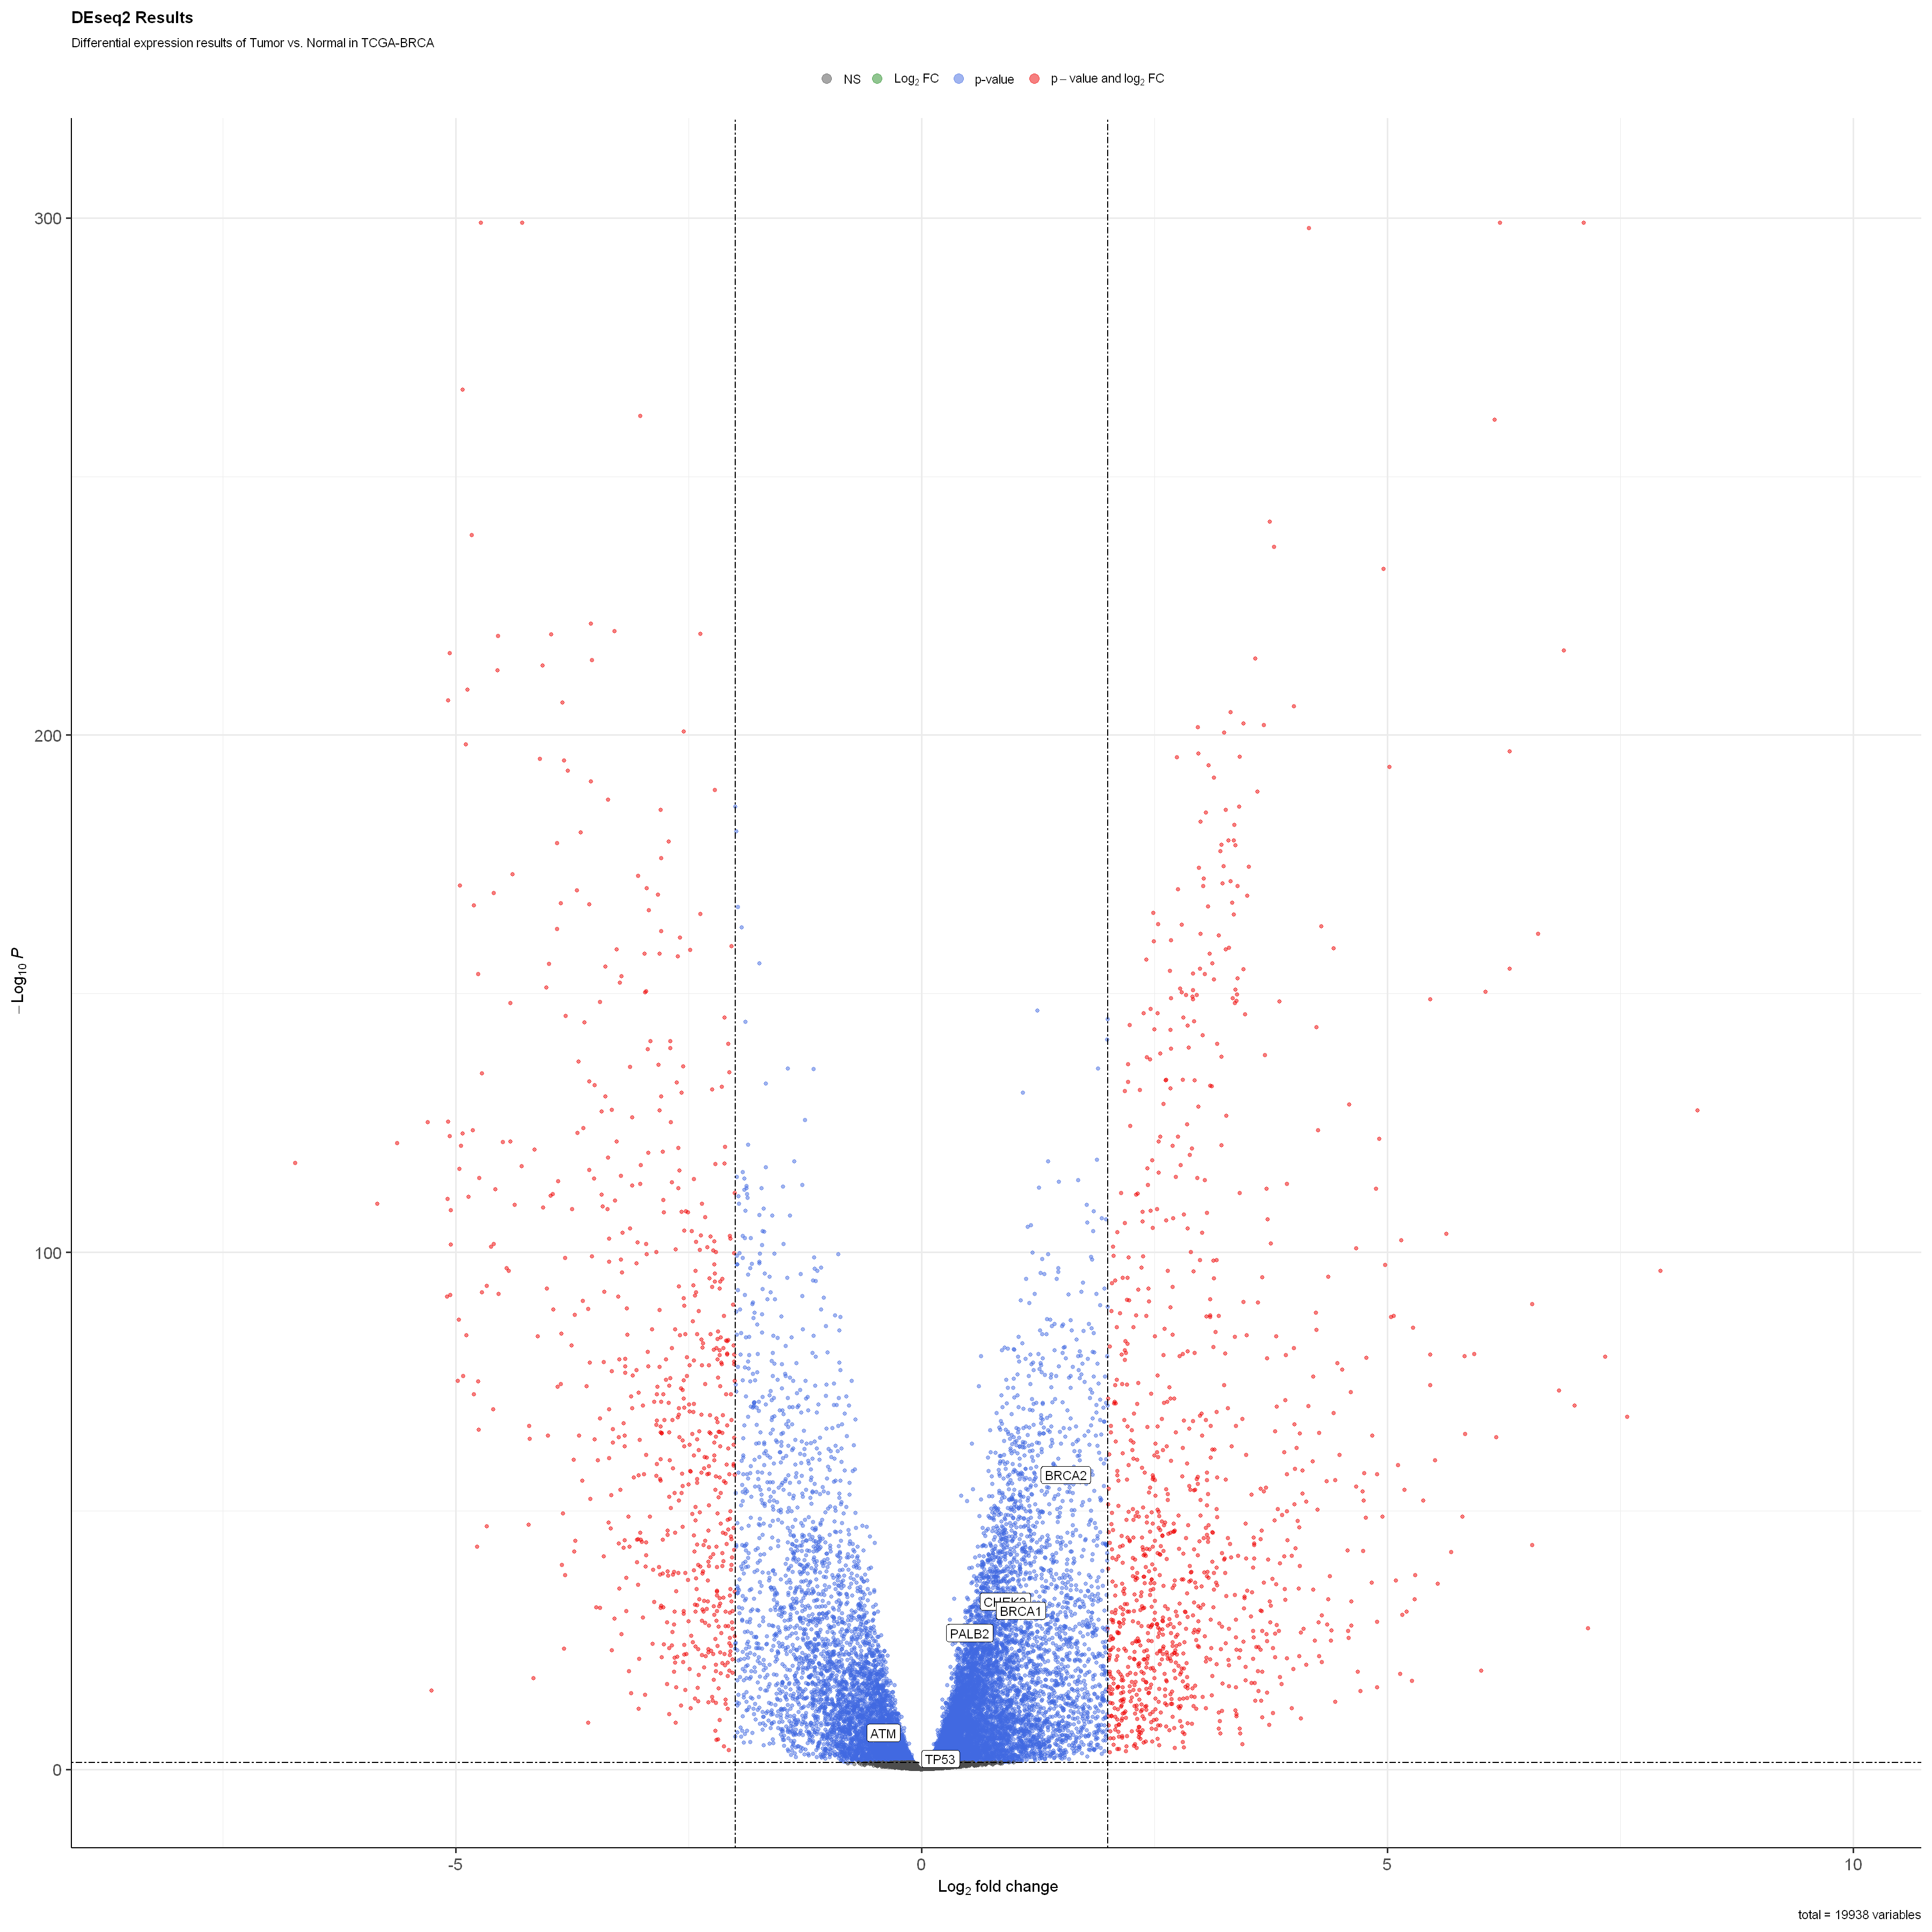

In [ ]:
# Highlighting gene(s)
EnhancedVolcano(res.df,
                lab = res.df$gene_name,
                 selectLab = c('BRCA1', 'BRCA2', 'PALB2','ATM','CHEK2','TP53'),
                             labSize = 5.0, 
                  boxedLabels = TRUE,
                x = 'log2FoldChange',
                y = 'padj',
                pCutoff = 0.05,
                FCcutoff = 2,
                cutoffLineType = 'twodash',
                cutoffLineWidth = 0.8,
                title = 'DEseq2 Results',
                subtitle = "Differential expression results of Tumor vs. Normal in TCGA-BRCA"
               )

In [49]:
# Perform variance stabilizing transformation
vsd <- vst(loaded_dds, blind=FALSE)

vsd.df <- assay(vsd) %>% 
          as.data.frame()

# Subset the top 50 up and downregulated genes
df.hm <- vsd.df[c(deg.up$gene_id[1:50], deg.down$gene_id[1:50]), ]
rownames(df.hm) <- c(deg.up$gene_name[1:50], deg.down$gene_name[1:50])

head(df.hm)

TCGA-E9-A1RH-01A-21R-A169-07 TCGA-C8-A26W-01A-11R-A16F-07
MMP11   15.08347                     12.94130                    
COL10A1 13.10193                     12.83034                    
NEK2    10.87999                     11.11535                    
COL11A1 15.20041                     12.15174                    
KIF4A   12.24908                     11.52619                    
PKMYT1  10.68307                     10.70515                    
        TCGA-E9-A1RH-11A-34R-A169-07 TCGA-AO-A0JJ-01A-11R-A056-07
MMP11   8.195933                     11.823747                   
COL10A1 6.741619                     12.285033                   
NEK2    6.174680                     10.251394                   
COL11A1 6.264805                     10.221886                   
KIF4A   6.328788                     10.261469                   
PKMYT1  5.198220                      8.977711                   
        TCGA-BH-A0HO-01A-11R-A034-07 TCGA-BH-A18F-01A-11R-A12D-07
MMP11   12.611907                    14.78328                    
COL10A1 11.459272                    13.06597                    
NEK2     9.571552                    11.29555                    
COL11A1 12.875196                    12.69271                    
KIF4A    9.842314                    11.33276                    
PKMYT1   7.744925                    10.77168                    
        TCGA-C8-A12O-01A-11R-A115-07 TCGA-AQ-A04H-01B-11R-A10J-07
MMP11   15.38154                     12.81956                    
COL10A1 14.77203                     10.05697                    
NEK2    10.45794                     11.08624                    
COL11A1 15.21934                     11.42959                    
KIF4A   11.18134                     11.05343                    
PKMYT1  10.33368                     10.50491                    
        TCGA-BH-A0HY-01A-11R-A056-07 TCGA-B6-A40B-01A-11R-A239-07 ⋯
MMP11   14.28965                     15.89716                     ⋯
COL10A1 13.46227                     13.23736                     ⋯
NEK2    11.75886                     10.99440                     ⋯
COL11A1 14.09205                     14.05852                     ⋯
KIF4A   10.61002                     10.00118                     ⋯
PKMYT1  10.83560                     10.86002                     ⋯
        TCGA-AR-A1AU-01A-11R-A12P-07 TCGA-B6-A0IG-01A-11R-A034-07
MMP11   16.656202                    14.70670                    
COL10A1 12.868522                    12.73775                    
NEK2    10.109377                     9.82973                    
COL11A1 11.616901                    11.18090                    
KIF4A   10.443451                    11.07035                    
PKMYT1   8.881826                    12.02041                    
        TCGA-EW-A6SC-01A-12R-A32P-07 TCGA-OL-A66I-01A-21R-A29R-07
MMP11   16.36069                     14.10484                    
COL10A1 13.68296                     12.50376                    
NEK2    10.98369                     10.72278                    
COL11A1 13.78759                     12.73097                    
KIF4A   11.04947                     11.36476                    
PKMYT1  10.51743                     11.53284                    
        TCGA-AO-A0JE-01A-11R-A056-07 TCGA-BH-A0AU-01A-11R-A12P-07
MMP11   15.79960                     15.179225                   
COL10A1 14.74138                     13.947061                   
NEK2    10.16544                     10.950769                   
COL11A1 15.78786                     14.335072                   
KIF4A   10.39064                     11.085195                   
PKMYT1  10.71661                      9.261697                   
        TCGA-A8-A09G-01A-21R-A00Z-07 TCGA-E2-A14X-01A-11R-A115-07
MMP11   11.326394                    12.511569                   
COL10A1 11.102216                    10.569772                   
NEK2    10.867110                    11.249803                   
COL11A1 12.113749                 

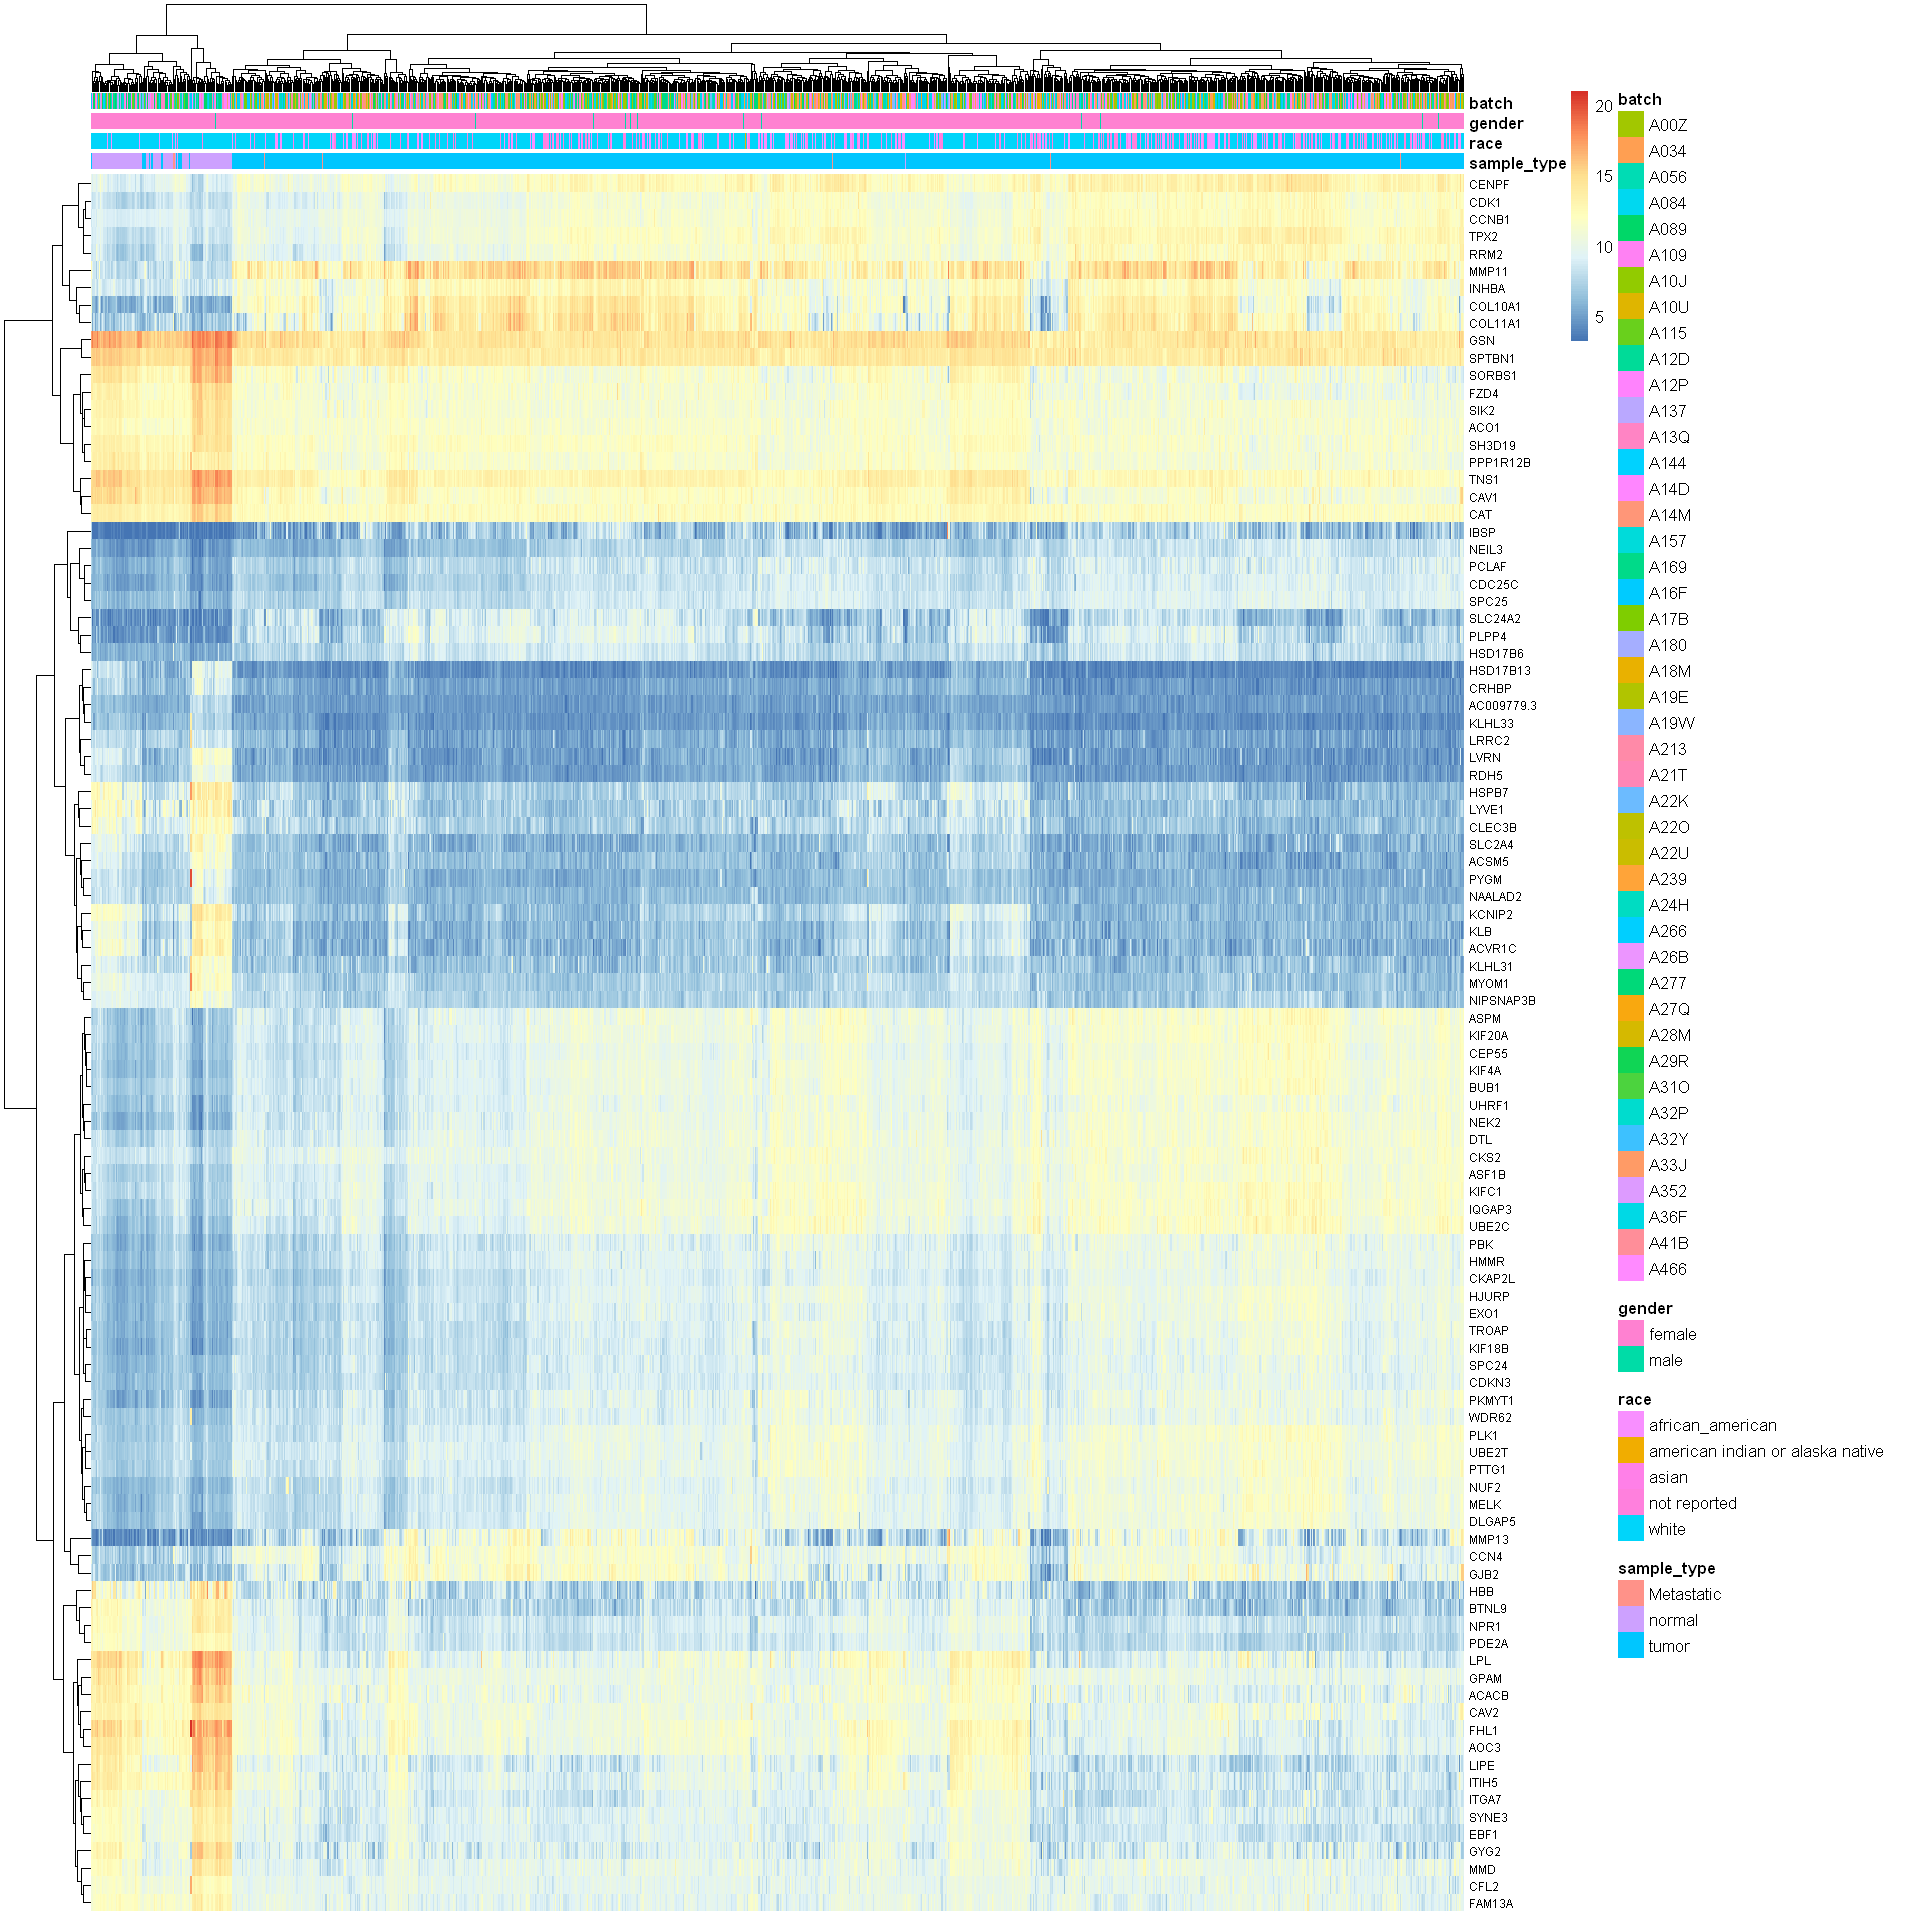

In [50]:
# Plot
pheatmap(df.hm, 
         annotation_col = sample.data, 
         show_colnames = F, 
         show_rownames = T, 
         fontsize_row = 7)

In [ ]:
write.table(res.df,"results_DESeq2.tsv", sep="\t", quote = F, col.names = T, row.names = F)
write.table(deg.df,"results_DEGs_DESeq2.tsv", sep="\t", quote = F, col.names = T, row.names = F)
write.table(vsd.df, "exp_vsd.tsv", sep="\t", quote = F, col.names = T, row.names = T) 

In [51]:
deg.df <- read.delim("results_DEGs_DESeq2.tsv")

head(deg.df)

gene_id            baseMean  log2FoldChange lfcSE     pvalue       
1 ENSG00000099953.10 24128.713  6.209371      0.1444367  0.000000e+00
2 ENSG00000101605.13   557.879 -4.729958      0.1231026  0.000000e+00
3 ENSG00000119927.14  4805.515 -4.286995      0.1045970  0.000000e+00
4 ENSG00000123500.10  8508.502  7.105913      0.1562923  0.000000e+00
5 ENSG00000117650.13  1467.549  4.157178      0.1121924 9.186478e-303
6 ENSG00000022267.19  9043.842 -4.925569      0.1406956 2.732241e-271
  padj          gene_name gene_type     
1  0.000000e+00 MMP11     protein_coding
2  0.000000e+00 MYOM1     protein_coding
3  0.000000e+00 GPAM      protein_coding
4  0.000000e+00 COL10A1   protein_coding
5 8.580538e-299 NEK2      protein_coding
6 1.822873e-267 FHL1      protein_coding

In [52]:
# Filter significant up-regulated genes
deg.up <- deg.df %>% 
          filter(padj < 0.05) %>%        
          filter(log2FoldChange > 1) %>%  
          arrange(padj)

head(deg.up)

gene_id            baseMean  log2FoldChange lfcSE     pvalue       
1 ENSG00000099953.10 24128.713 6.209371       0.1444367  0.000000e+00
2 ENSG00000123500.10  8508.502 7.105913       0.1562923  0.000000e+00
3 ENSG00000117650.13  1467.549 4.157178       0.1121924 9.186478e-303
4 ENSG00000060718.22 11993.748 6.149808       0.1778572 1.898304e-265
5 ENSG00000090889.12  1539.004 3.739803       0.1121651 1.069976e-245
6 ENSG00000127564.17   922.351 3.784278       0.1146965 1.043166e-240
  padj          gene_name gene_type     
1  0.000000e+00 MMP11     protein_coding
2  0.000000e+00 COL10A1   protein_coding
3 8.580538e-299 NEK2      protein_coding
4 9.850513e-262 COL11A1   protein_coding
5 4.997002e-242 KIF4A     protein_coding
6 4.059830e-237 PKMYT1    protein_coding

In [53]:
# GO enrichment analysis
ego <- enrichGO(deg.up$gene_name,
                keyType = "SYMBOL",
                OrgDb = "org.Hs.eg.db",
                minGSSize = 10, 
                maxGSSize = 500,
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.25,
                ont="BP",
                readable = TRUE
                )

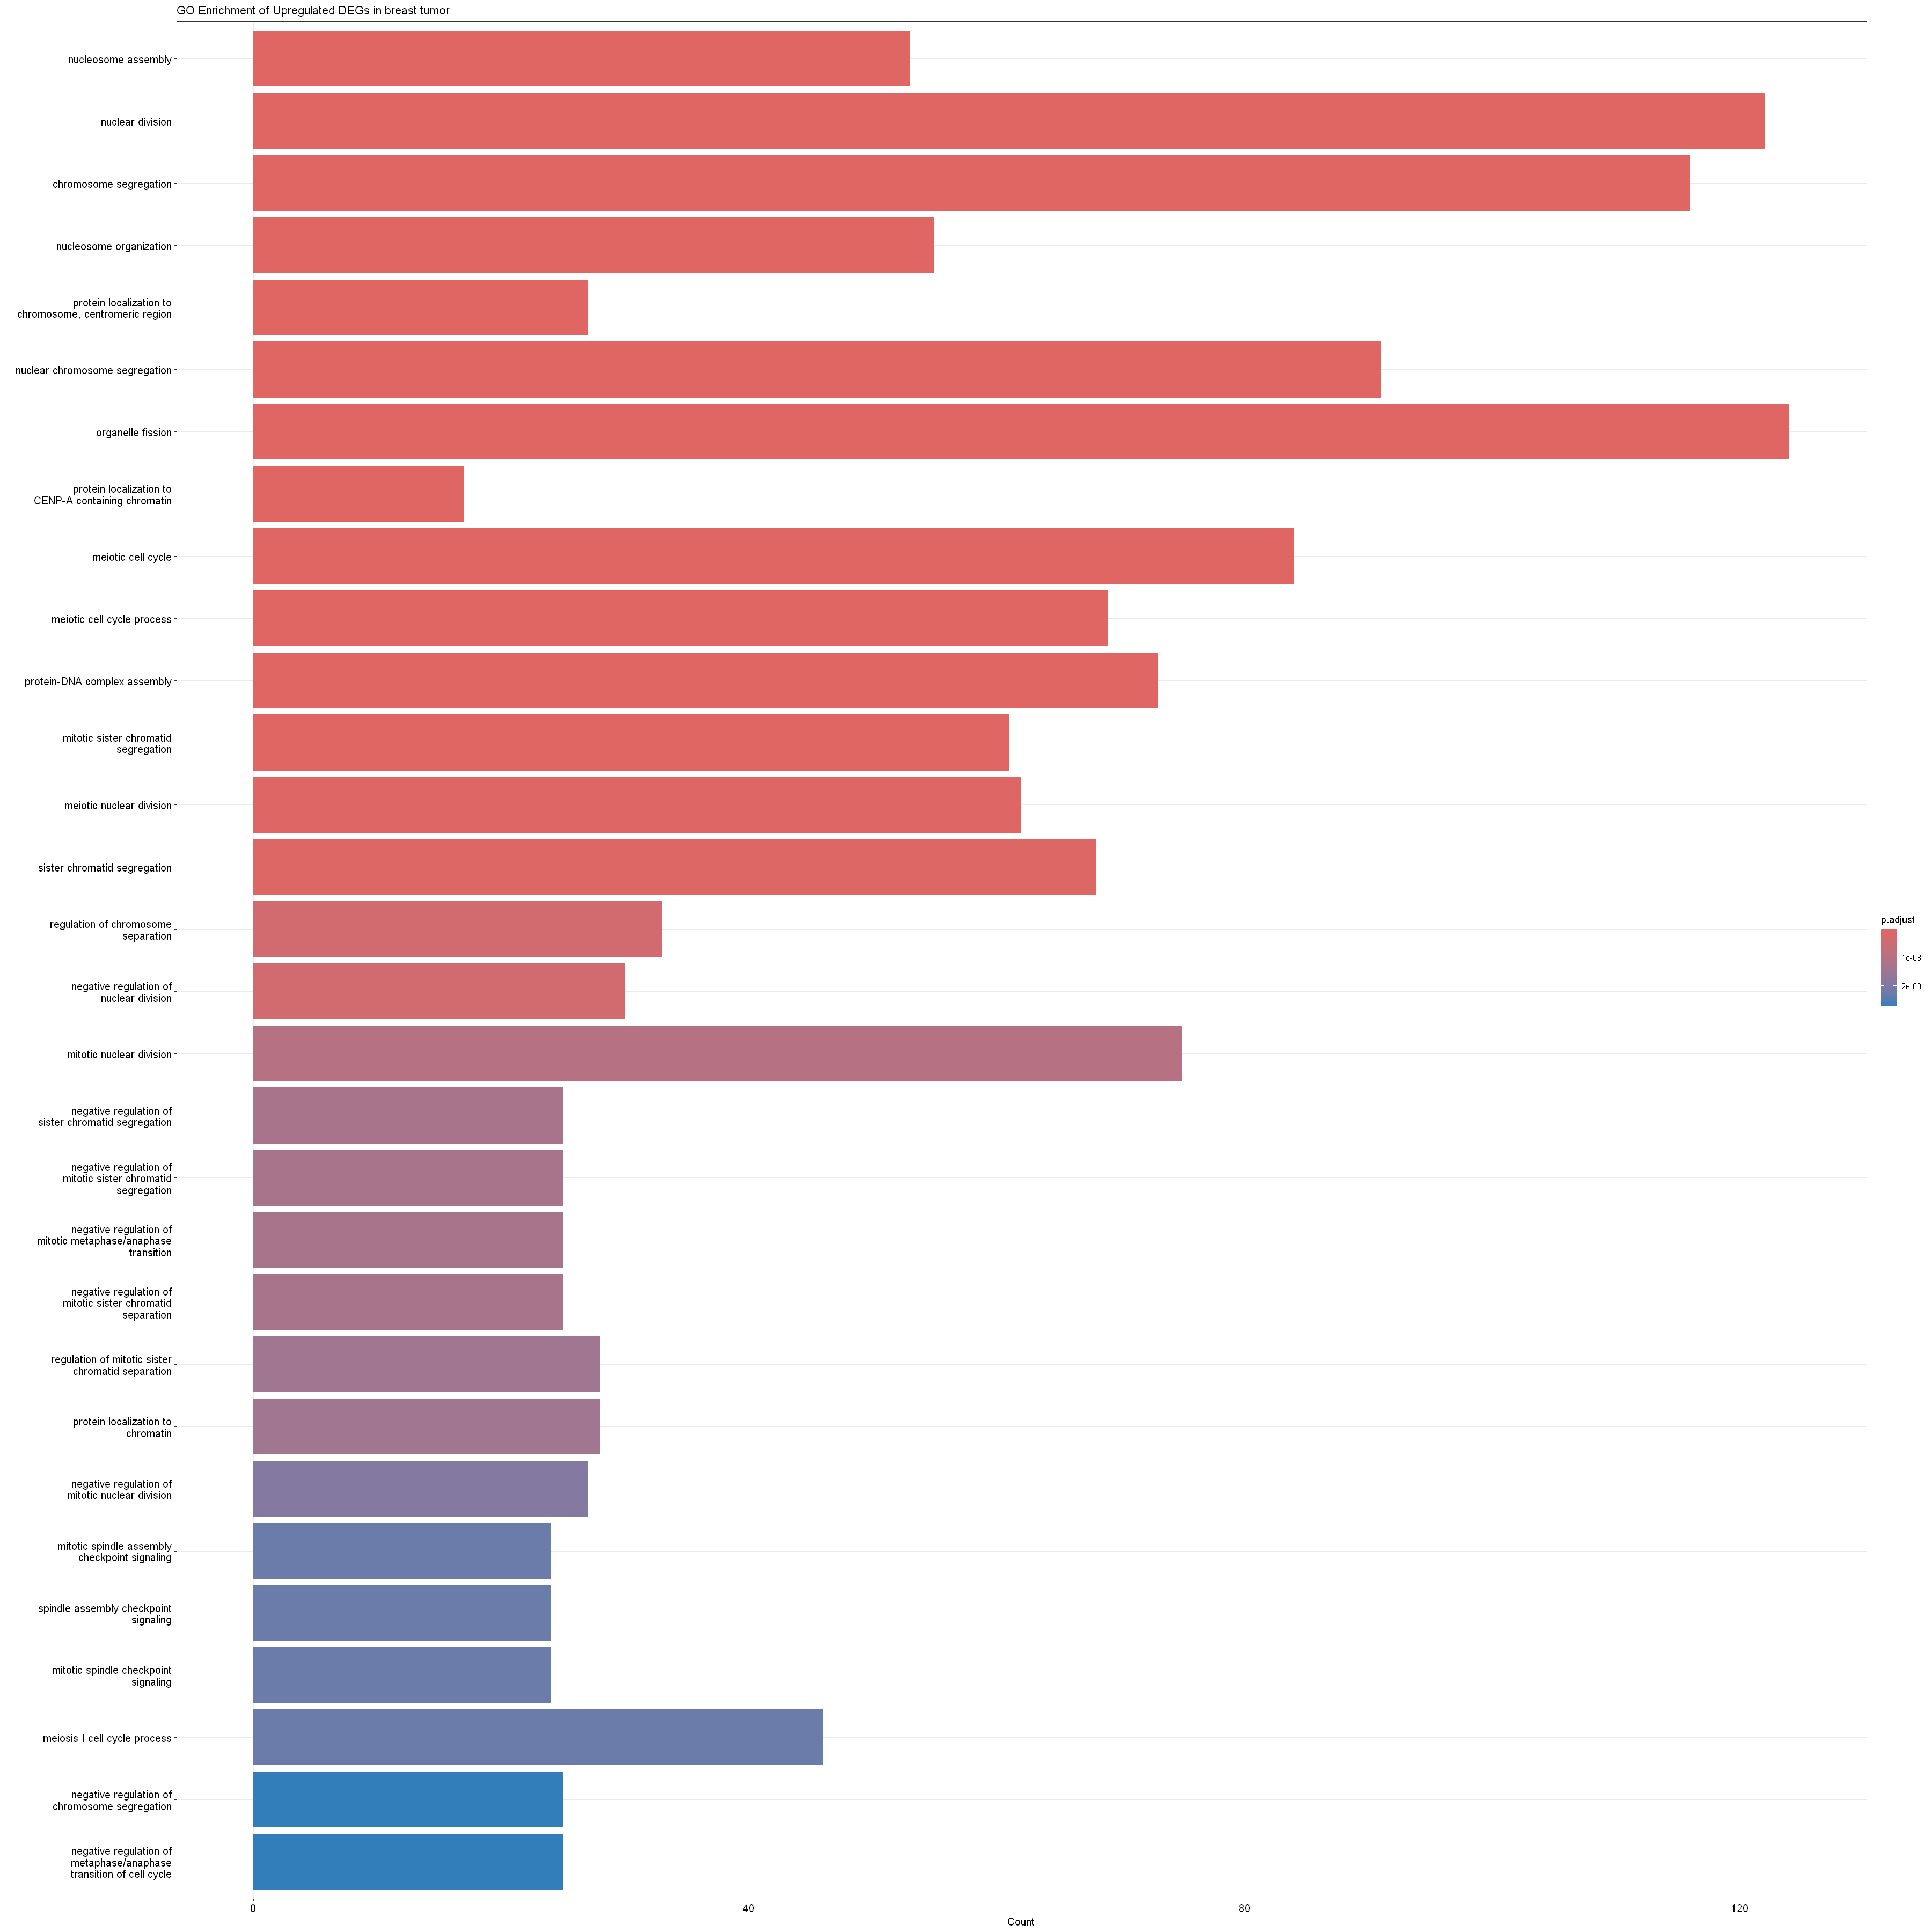

In [ ]:
# Set plot dimensions
options(repr.plot.width = 30, repr.plot.height = 30)

# Barplot
barplot(ego, showCategory=30) + ggtitle("GO Enrichment of Upregulated DEGs in breast tumor")

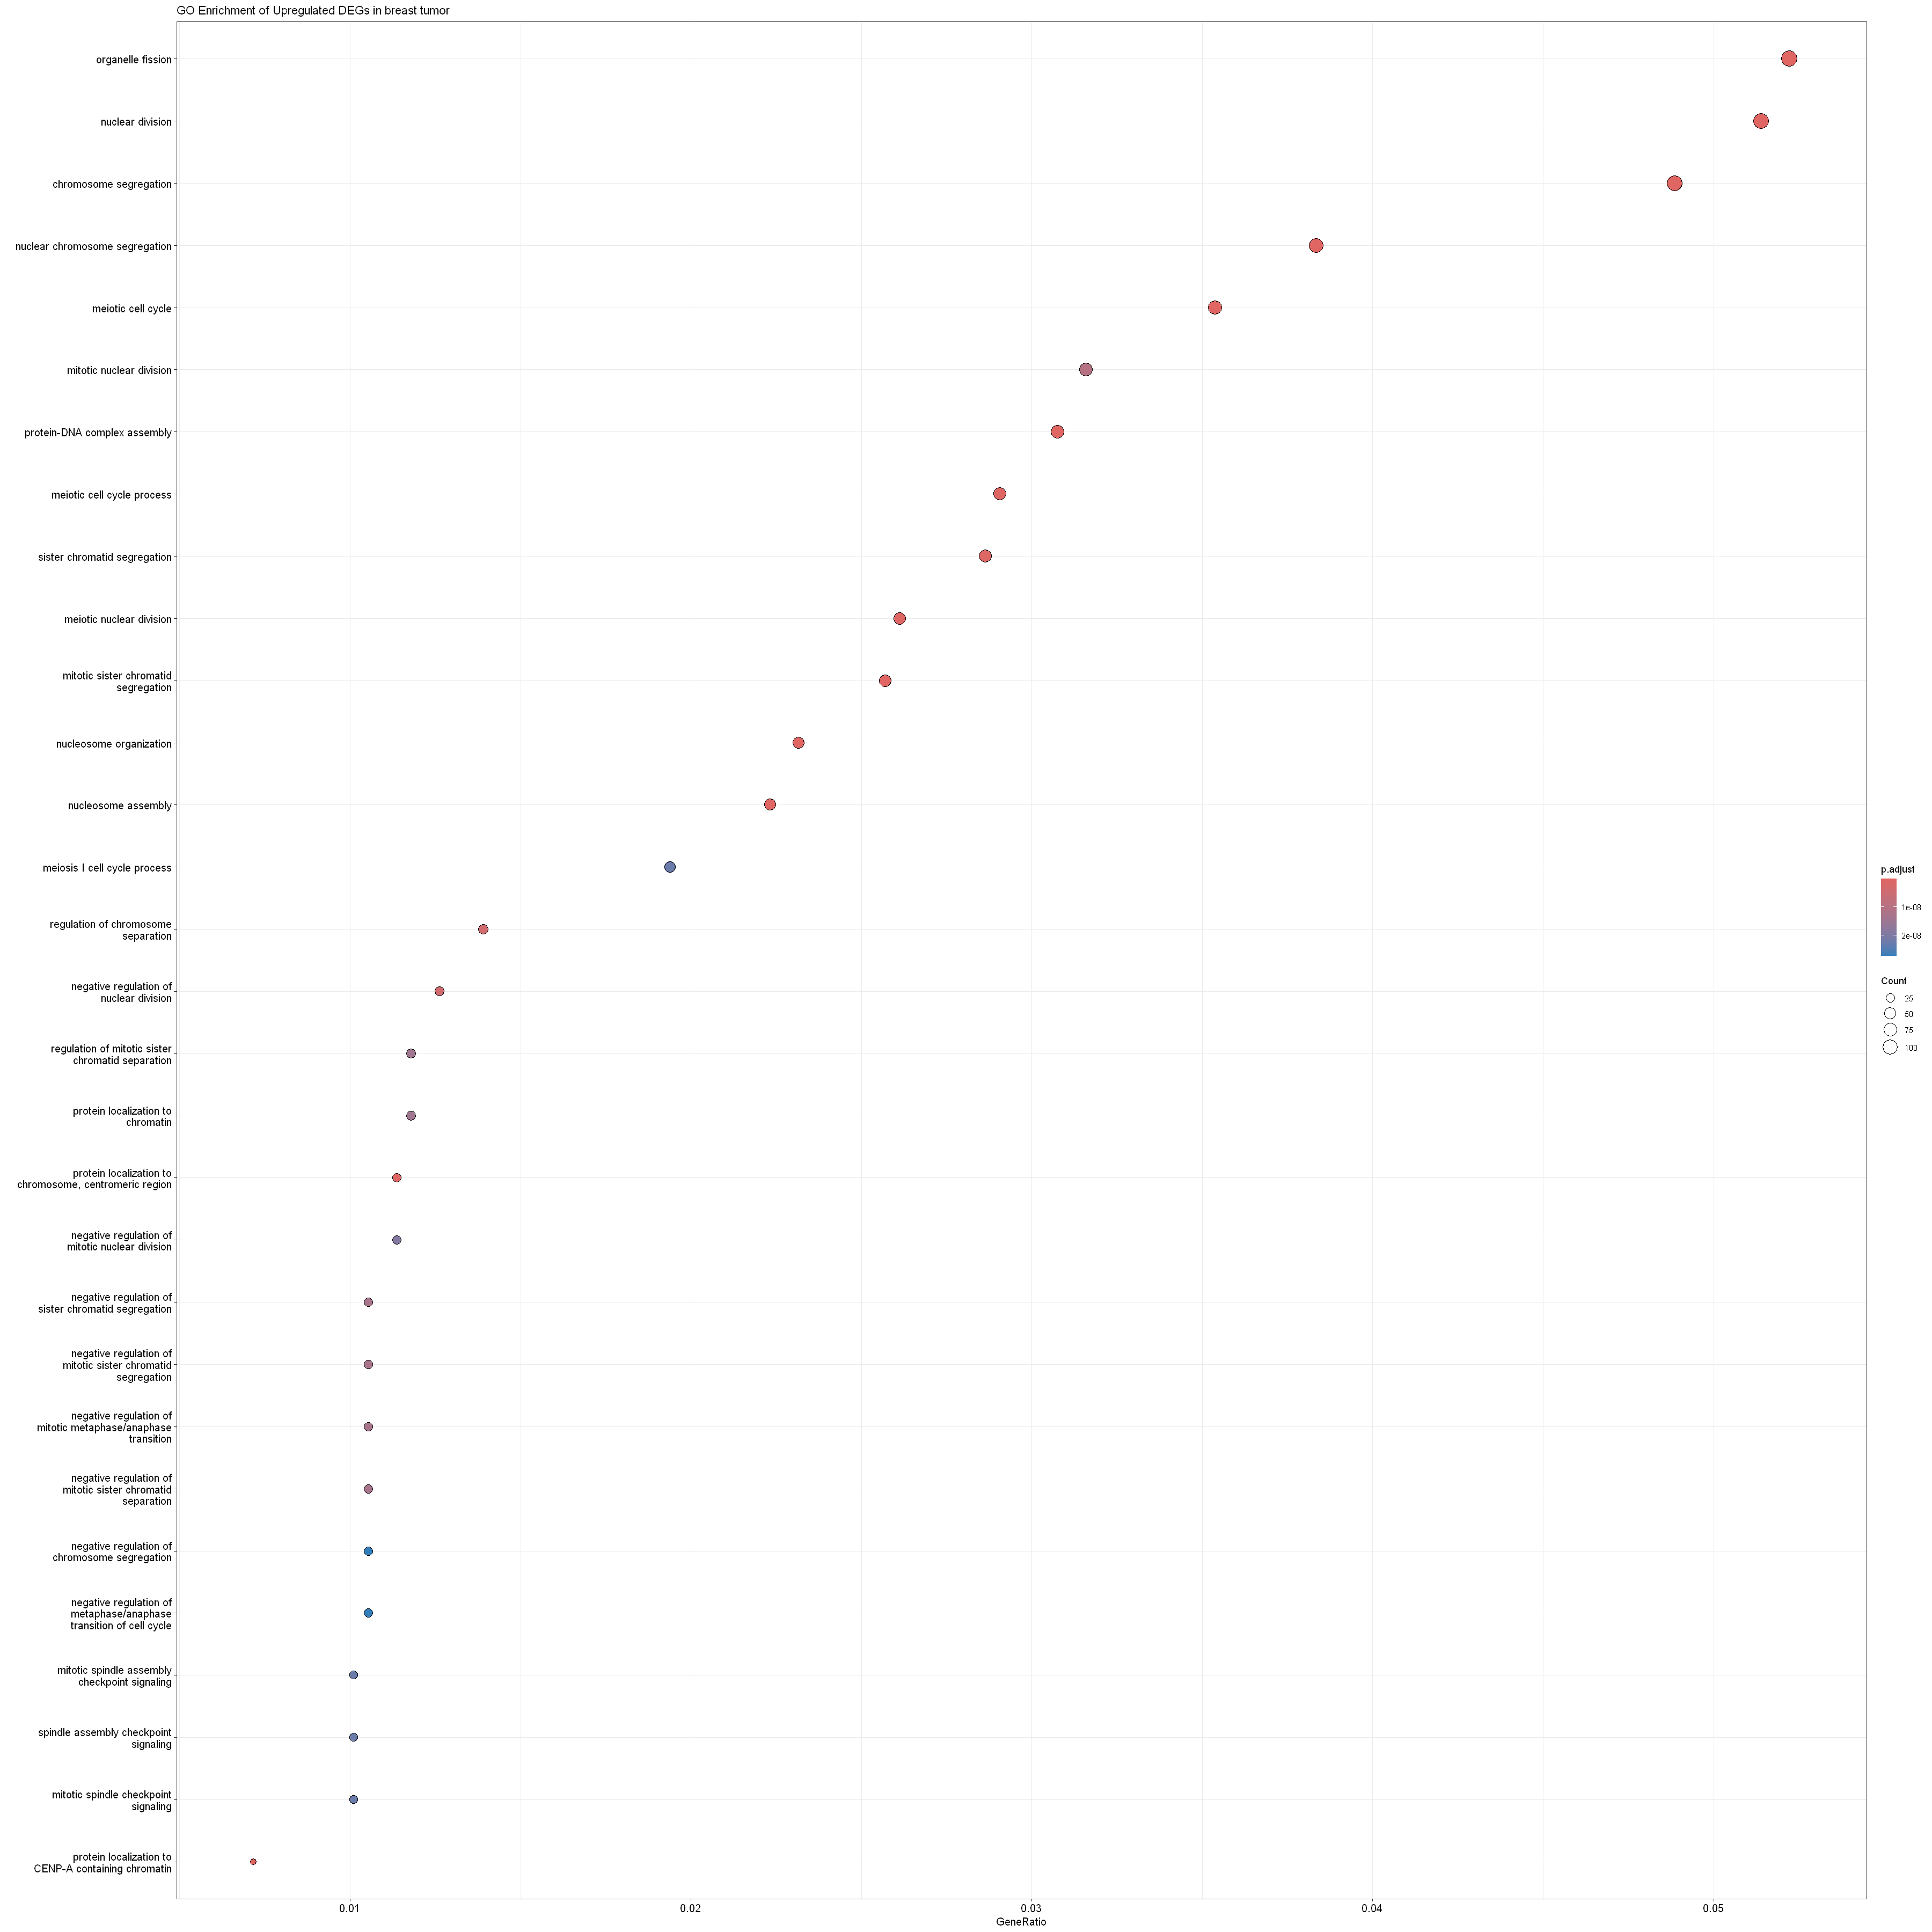

In [ ]:
# Set plot dimensions
options(repr.plot.width = 30, repr.plot.height = 30)

# Dotplot
dotplot(ego, showCategory=30) + ggtitle("GO Enrichment of Upregulated DEGs in breast tumor")

Warning message in cnetplot.enrichResult(x, ...):
"Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version."


Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Warning message:
"ggrepel: 155 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


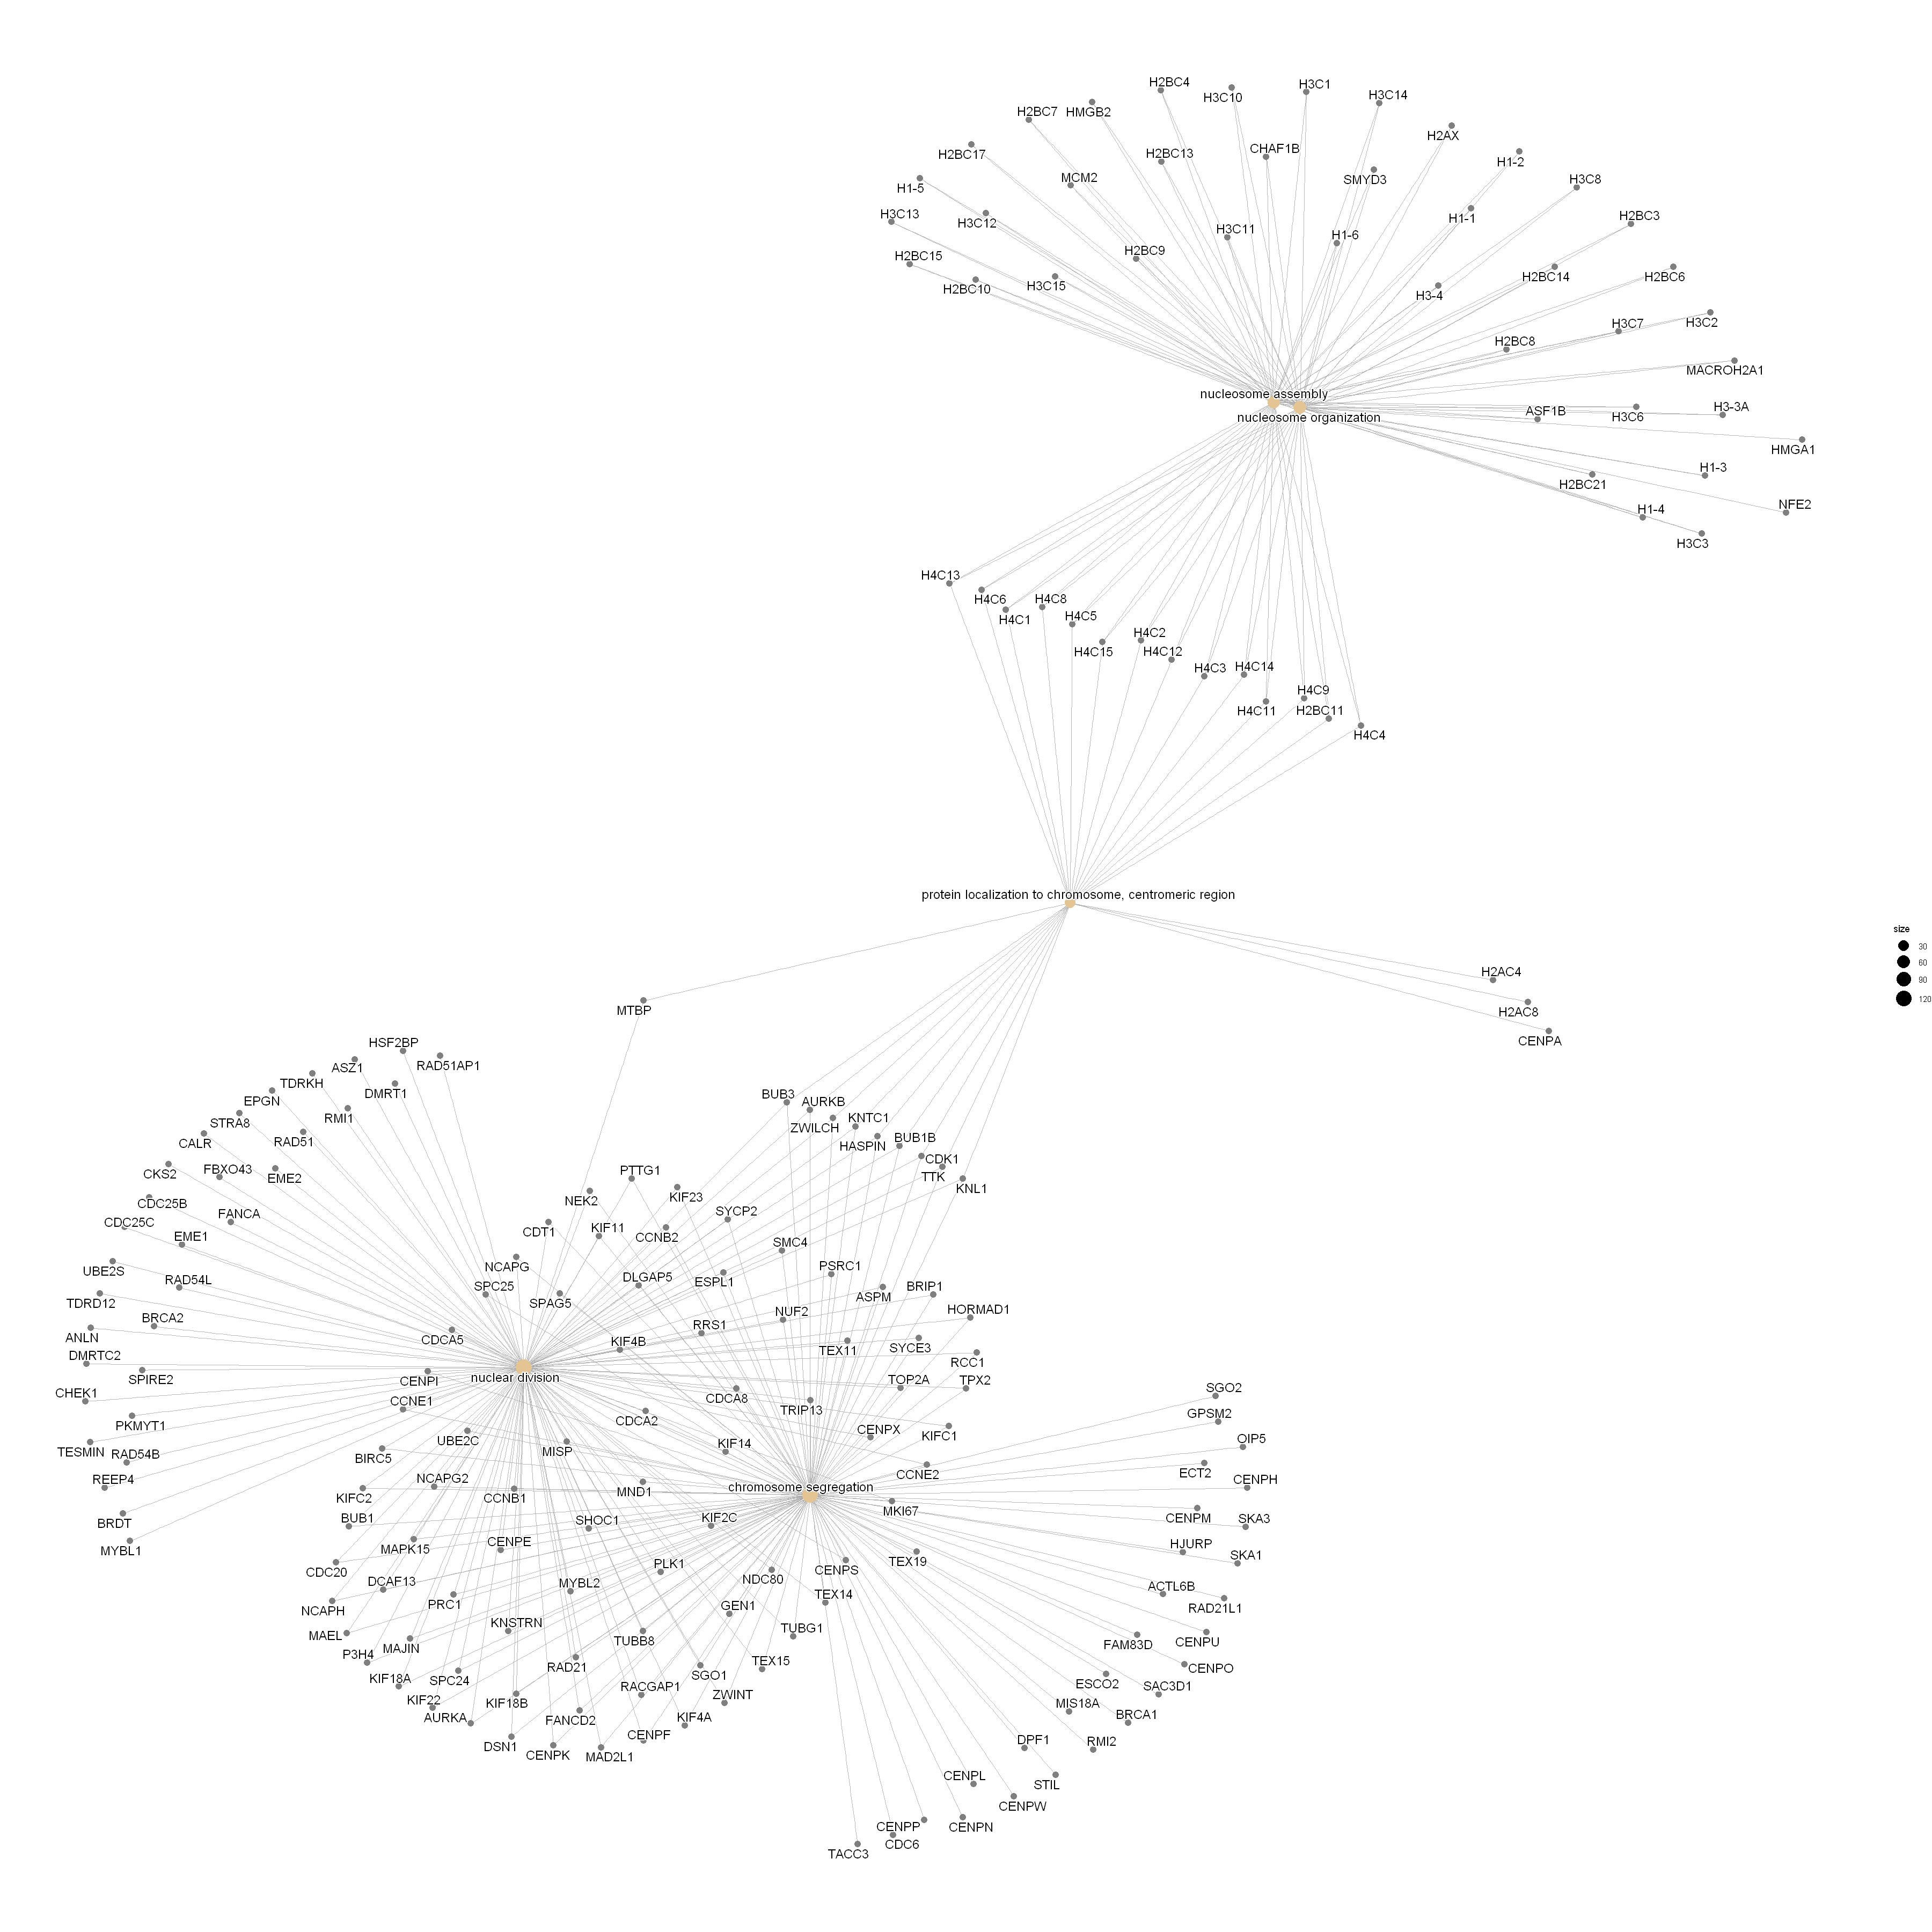

In [ ]:
# Get vector of log2 fold changes
up_foldchange <- deg.up$log2FoldChange

# Cnetplot
cnetplot(ego, 
         showCategory = 5, 
         foldChange=up_foldchange)

In [ ]:
write.table(ego ,"results_GO_Upregulated_RNAseq.tsv", sep="\t", quote = F, col.names = T, row.names = F)

In [55]:
# Map SYMBOL to ENTREZID
deg.up.entrez <- mapIds(org.Hs.eg.db,
                       keys=deg.up$gene_name , #Column containing Ensembl gene ids
                       column="ENTREZID",
                       keytype="SYMBOL",
                       multiVals="first")

deg.up$entrez_id <- deg.up.entrez

# Remove NAs
deg.up <- deg.up %>% drop_na(entrez_id)

head(deg.up)

'select()' returned 1:1 mapping between keys and columns



gene_id            baseMean  log2FoldChange lfcSE     pvalue       
1 ENSG00000099953.10 24128.713 6.209371       0.1444367  0.000000e+00
2 ENSG00000123500.10  8508.502 7.105913       0.1562923  0.000000e+00
3 ENSG00000117650.13  1467.549 4.157178       0.1121924 9.186478e-303
4 ENSG00000060718.22 11993.748 6.149808       0.1778572 1.898304e-265
5 ENSG00000090889.12  1539.004 3.739803       0.1121651 1.069976e-245
6 ENSG00000127564.17   922.351 3.784278       0.1146965 1.043166e-240
  padj          gene_name gene_type      entrez_id
1  0.000000e+00 MMP11     protein_coding 4320     
2  0.000000e+00 COL10A1   protein_coding 1300     
3 8.580538e-299 NEK2      protein_coding 4751     
4 9.850513e-262 COL11A1   protein_coding 1301     
5 4.997002e-242 KIF4A     protein_coding 24137    
6 4.059830e-237 PKMYT1    protein_coding 9088

In [56]:
# KEGG enrichment analysis with entrez IDs
ekegg <- enrichKEGG(gene = deg.up.entrez,
                    organism = 'hsa',
                    pvalueCutoff  = 0.05
)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...



Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



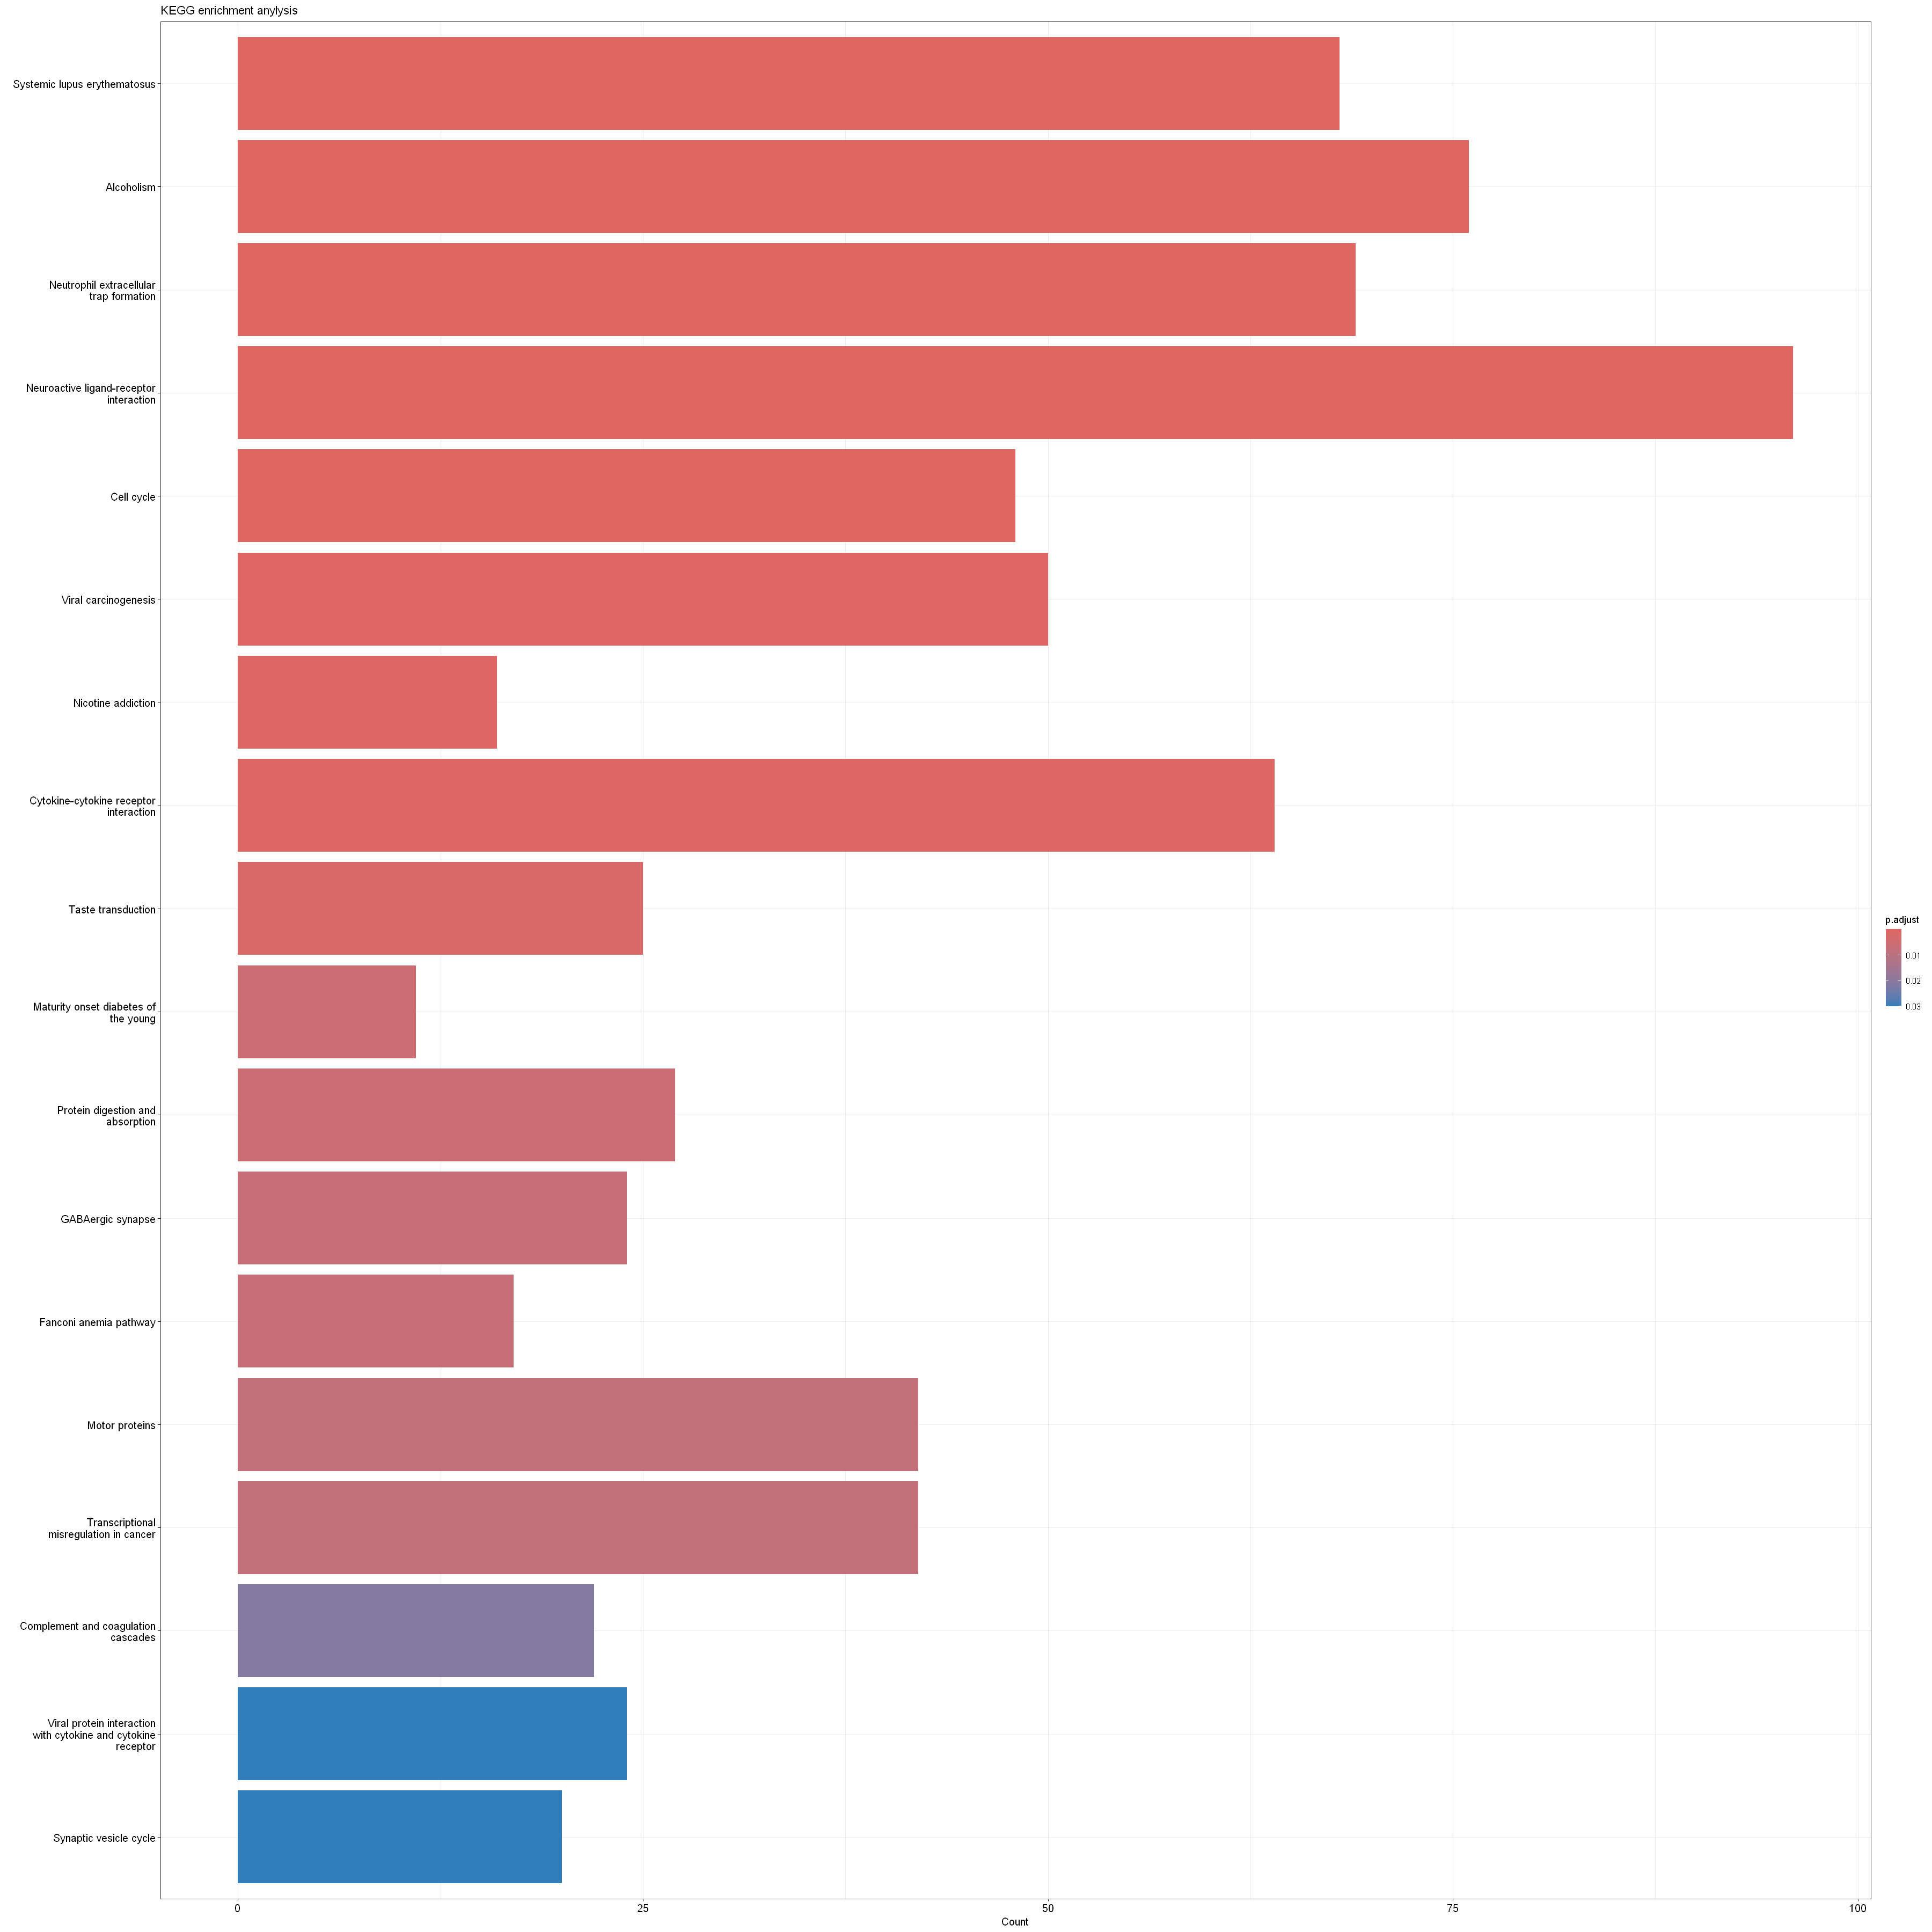

In [ ]:
# Set plot dimensions
options(repr.plot.width = 30, repr.plot.height = 30)

# Barplot
barplot(ekegg, showCategory=30)+ggtitle("KEGG enrichment anylysis")

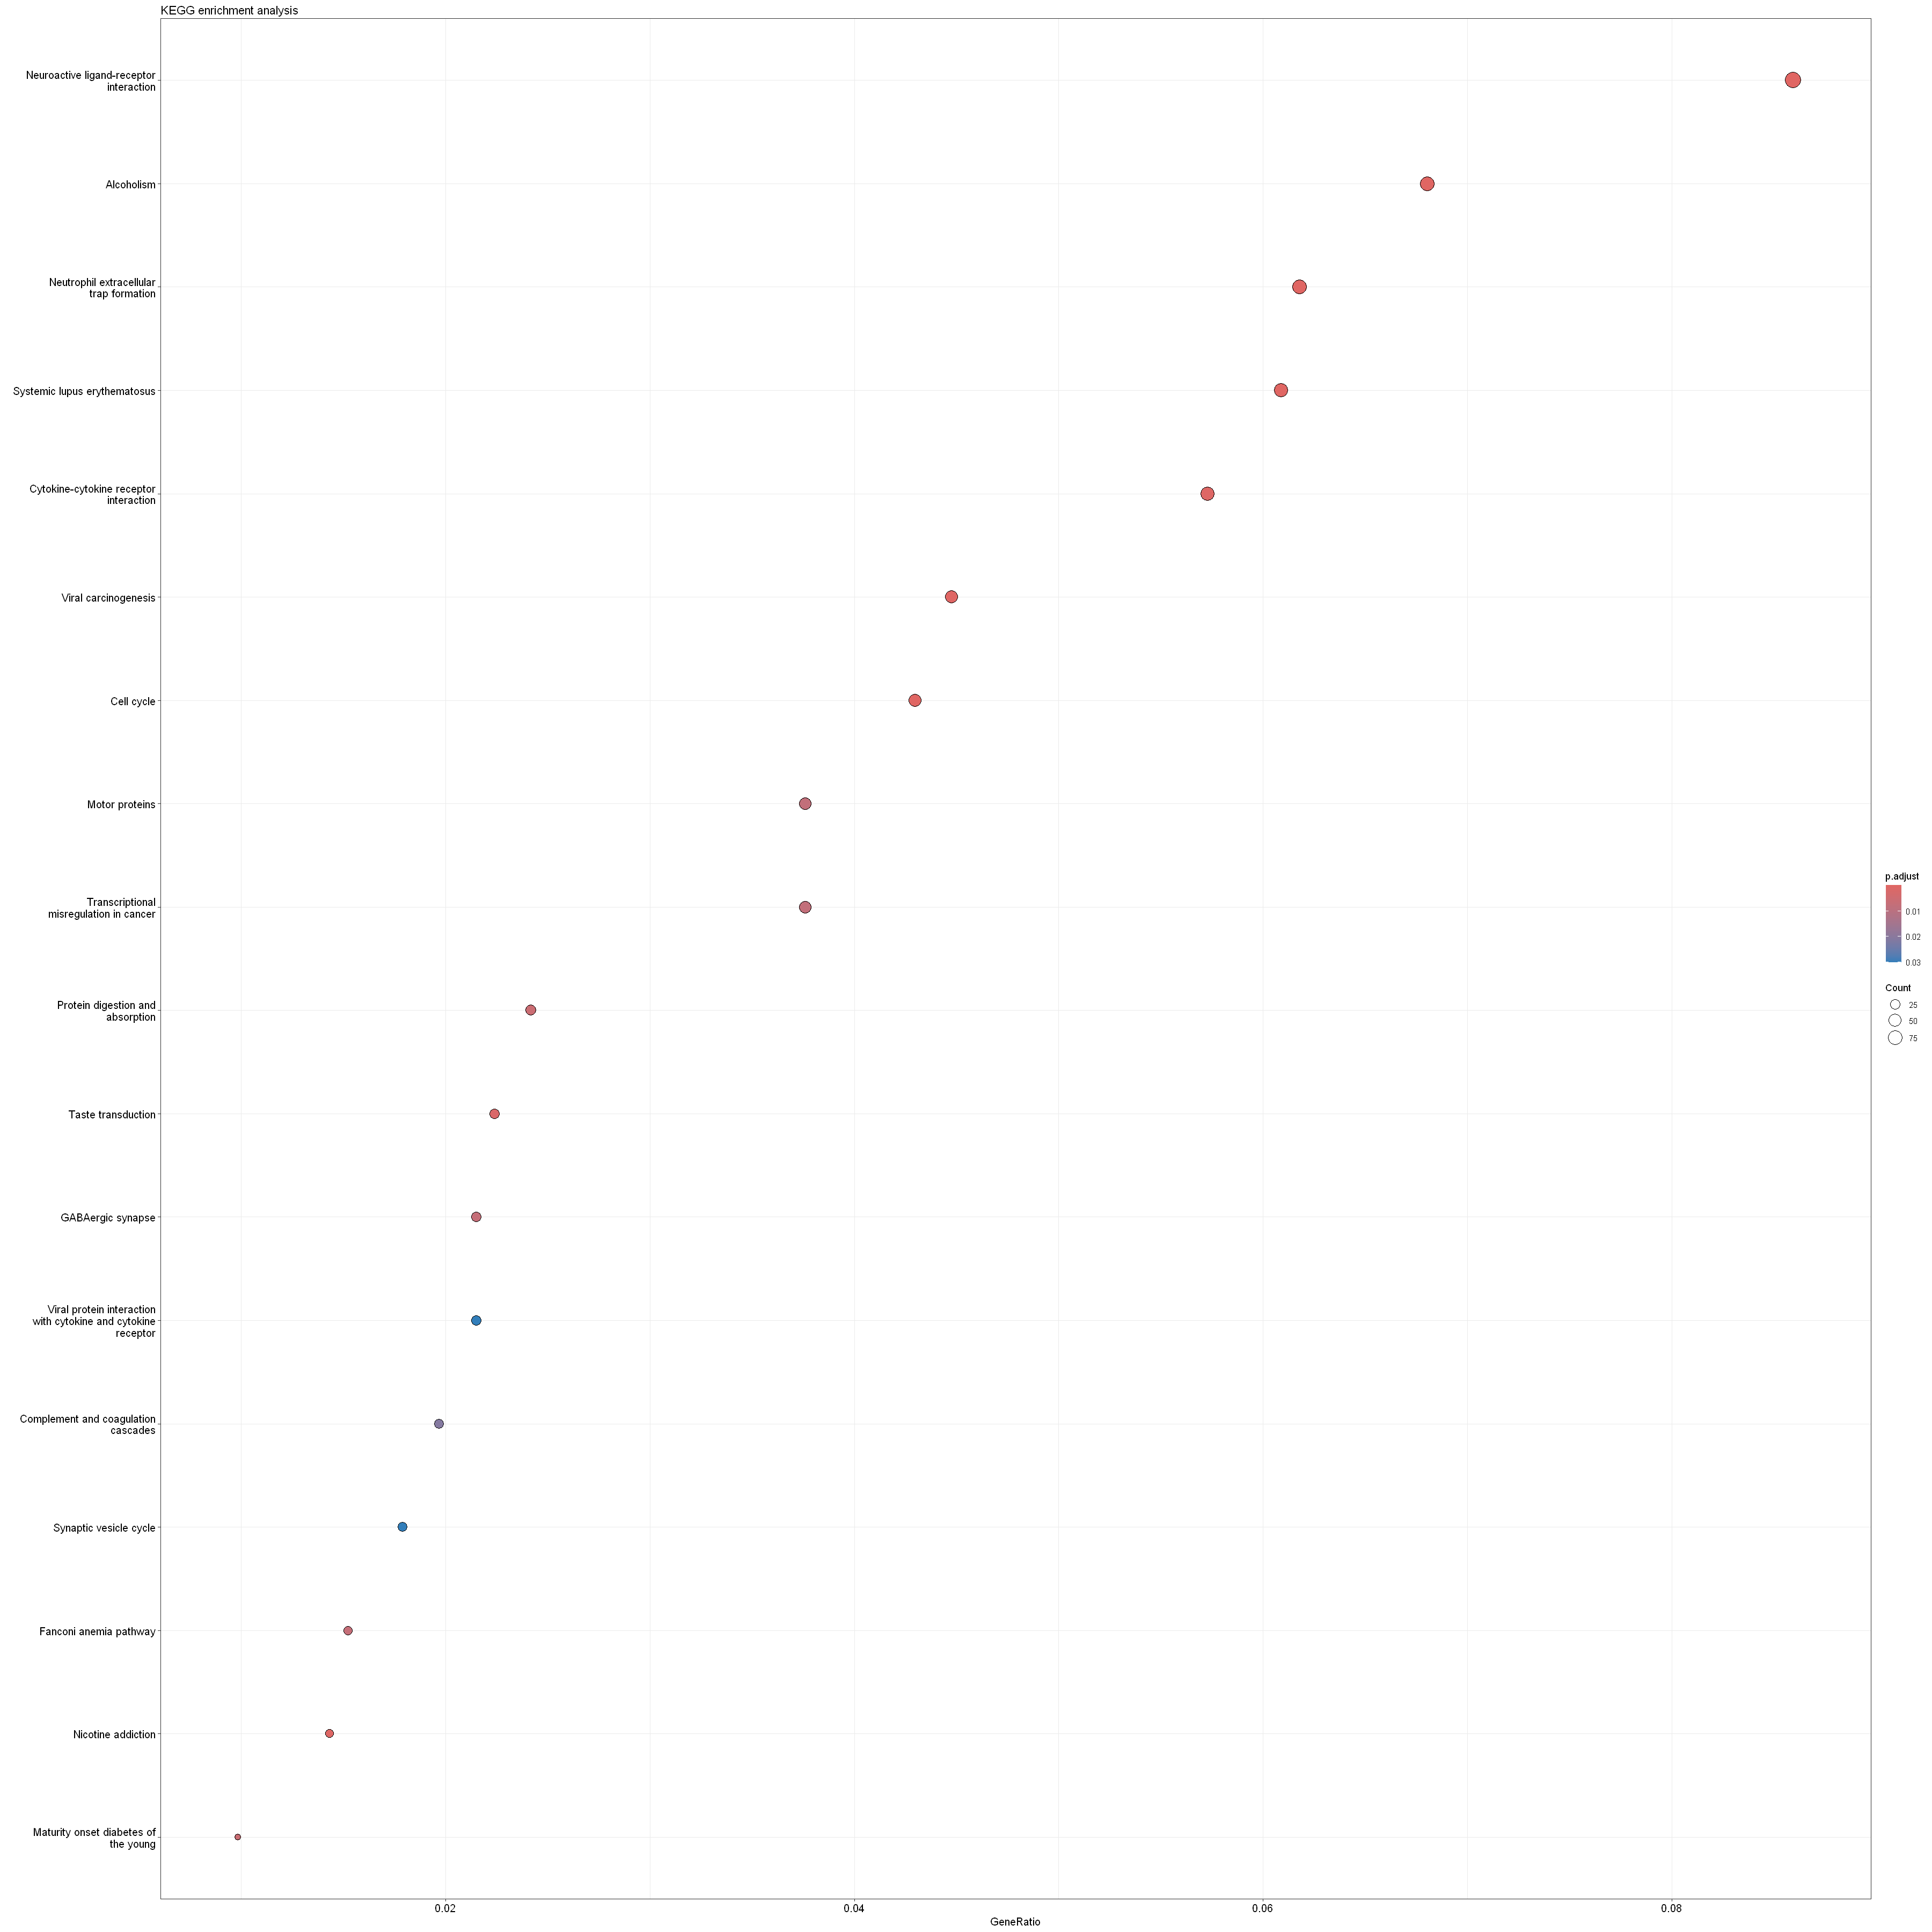

In [ ]:
# Set plot dimensions
options(repr.plot.width = 30, repr.plot.height = 30)

# Dotplot
dotplot(ekegg, showCategory=30) + ggtitle("KEGG enrichment analysis")

In [57]:
# Look for significant pathways
ekegg@result %>% filter(p.adjust < 0.05)

category                            
hsa05322 Human Diseases                      
hsa05034 Human Diseases                      
hsa04613 Organismal Systems                  
hsa04080 Environmental Information Processing
hsa04110 Cellular Processes                  
hsa05203 Human Diseases                      
hsa04060 Environmental Information Processing
hsa05033 Human Diseases                      
hsa04742 Organismal Systems                  
hsa04974 Organismal Systems                  
hsa04950 Human Diseases                      
hsa04727 Organismal Systems                  
hsa03460 Genetic Information Processing      
hsa04814 Cellular Processes                  
hsa05202 Human Diseases                      
hsa04610 Organismal Systems                  
hsa04061 Environmental Information Processing
hsa04721 Organismal Systems                  
         subcategory                         ID      
hsa05322 Immune disease                      hsa05322
hsa05034 Substance dependence                hsa05034
hsa04613 Immune system                       hsa04613
hsa04080 Signaling molecules and interaction hsa04080
hsa04110 Cell growth and death               hsa04110
hsa05203 Cancer: overview                    hsa05203
hsa04060 Signaling molecules and interaction hsa04060
hsa05033 Substance dependence                hsa05033
hsa04742 Sensory system                      hsa04742
hsa04974 Digestive system                    hsa04974
hsa04950 Endocrine and metabolic disease     hsa04950
hsa04727 Nervous system                      hsa04727
hsa03460 Replication and repair              hsa03460
hsa04814 Cell motility                       hsa04814
hsa05202 Cancer: overview                    hsa05202
hsa04610 Immune system                       hsa04610
hsa04061 Signaling molecules and interaction hsa04061
hsa04721 Nervous system                      hsa04721
         Description                                                  
hsa05322 Systemic lupus erythematosus                                 
hsa05034 Alcoholism                                                   
hsa04613 Neutrophil extracellular trap formation                      
hsa04080 Neuroactive ligand-receptor interaction                      
hsa04110 Cell cycle                                                   
hsa05203 Viral carcinogenesis                                         
hsa04060 Cytokine-cytokine receptor interaction                       
hsa05033 Nicotine addiction                                           
hsa04742 Taste transduction                                           
hsa04974 Protein digestion and absorption                             
hsa04950 Maturity onset diabetes of the young                         
hsa04727 GABAergic synapse                                            
hsa03460 Fanconi anemia pathway                                       
hsa04814 Motor proteins                                               
hsa05202 Transcriptional misregulation in cancer                      
hsa04610 Complement and coagulation cascades                          
hsa04061 Viral protein interaction with cytokine and cytokine receptor
hsa04721 Synaptic vesicle cycle                                       
         GeneRatio BgRatio  pvalue       p.adjust     qvalue      
hsa05322 68/1124   137/8753 6.863518e-26 2.264961e-23 2.066280e-23
hsa05034 76/1124   188/8753 8.372218e-22 1.381416e-19 1.260239e-19
hsa04613 69/1124   191/8753 8.531295e-17 9.384424e-15 8.561229e-15
hsa04080 96/1124   367/8753 1.570377e-12 1.295561e-10 1.181915e-10
hsa04110 48/1124   157/8753 3.304701e-09 2.181103e-07 1.989778e-07
hsa05203 50/1124   204/8753 3.224993e-06 1.773746e-04 1.618154e-04
hsa04060 64/1124   297/8753 1.493600e-05 6.206155e-04 5.661756e-04
hsa05033 16/1124   40/8753  1.504522e-05 6.206155e-04 5.661756e-04
hsa04742 25/1124   86/8753  4.993002e-05 1.830767e-03 1.670174e-03
hsa04974 27/1124   103/8753 1.784374e-04 5.472178e-03 4.992162e-03
hsa04950 11/1124   26/8

In [58]:
gene_list <- deg.up %>% 
             dplyr::select(entrez_id, log2FoldChange) %>%
             deframe()

head(gene_list)

4320     1300     4751     1301    24137     9088 
6.209371 7.105913 4.157178 6.149808 3.739803 3.784278

In [ ]:

hsa05322 <- pathview(gene.data  = gene_list,
                     pathway.id = "hsa05322",
                     species    = "hsa")

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory d:/OneDrive - National University of Singapore/NUS/2024-Master/5003 Statistics/jupyterlab/Project

Info: Writing image file hsa05322.pathview.png



In [ ]:

hsa05322 <- pathview(gene.data  = gene_list,
                     pathway.id = "hsa05034",
                     species    = "hsa")

Info: Downloading xml files for hsa05034, 1/1 pathways..



Info: Downloading png files for hsa05034, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory d:/OneDrive - National University of Singapore/NUS/2024-Master/5003 Statistics/jupyterlab/Project

Info: Writing image file hsa05034.pathview.png



In [ ]:

hsa05322 <- pathview(gene.data  = gene_list,
                     pathway.id = "hsa04613",
                     species    = "hsa")

Info: Downloading xml files for hsa04613, 1/1 pathways..



Info: Downloading png files for hsa04613, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory d:/OneDrive - National University of Singapore/NUS/2024-Master/5003 Statistics/jupyterlab/Project

Info: Writing image file hsa04613.pathview.png



In [59]:
hsa04080 <- pathview(gene.data  = gene_list,
                     pathway.id = "hsa04080",
                     species    = "hsa")

Info: Downloading xml files for hsa04080, 1/1 pathways..

Info: Downloading png files for hsa04080, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory d:/OneDrive - National University of Singapore/NUS/2024-Master/5003 Statistics/jupyterlab/Project

Info: Writing image file hsa04080.pathview.png



In [ ]:
write.table(ekegg@result ,"results_KEGG_Upregulated_RNAseq.tsv", sep="\t", quote = F, col.names = T, row.names = F)

In [14]:
library(msigdbr)

# Load gene sets
hs_hallmark_sets <- msigdbr(
  species = "Homo sapiens",
  category = "H"
)

head(hs_hallmark_sets)

gs_cat gs_subcat gs_name               gene_symbol entrez_gene
1 H                HALLMARK_ADIPOGENESIS ABCA1          19      
2 H                HALLMARK_ADIPOGENESIS ABCB8       11194      
3 H                HALLMARK_ADIPOGENESIS ACAA2       10449      
4 H                HALLMARK_ADIPOGENESIS ACADL          33      
5 H                HALLMARK_ADIPOGENESIS ACADM          34      
6 H                HALLMARK_ADIPOGENESIS ACADS          35      
  ensembl_gene    human_gene_symbol human_entrez_gene human_ensembl_gene gs_id
1 ENSG00000165029 ABCA1                19             ENSG00000165029    M5905
2 ENSG00000197150 ABCB8             11194             ENSG00000197150    M5905
3 ENSG00000167315 ACAA2             10449             ENSG00000167315    M5905
4 ENSG00000115361 ACADL                33             ENSG00000115361    M5905
5 ENSG00000117054 ACADM                34             ENSG00000117054    M5905
6 ENSG00000122971 ACADS                35             ENSG00000122971    M5905
  gs_pmid  gs_geoid gs_exact_source gs_url
1 26771021                                
2 26771021                                
3 26771021                                
4 26771021                                
5 26771021                                
6 26771021                                
  gs_description                                                     
1 Genes up-regulated during adipocyte differentiation (adipogenesis).
2 Genes up-regulated during adipocyte differentiation (adipogenesis).
3 Genes up-regulated during adipocyte differentiation (adipogenesis).
4 Genes up-regulated during adipocyte differentiation (adipogenesis).
5 Genes up-regulated during adipocyte differentiation (adipogenesis).
6 Genes up-regulated during adipocyte differentiation (adipogenesis).

In [15]:
# Show unique gene sets
hs_hallmark_sets %>% 
dplyr::select(gs_name, gs_description) %>%
distinct()

gs_name                                   
1  HALLMARK_ADIPOGENESIS                     
2  HALLMARK_ALLOGRAFT_REJECTION              
3  HALLMARK_ANDROGEN_RESPONSE                
4  HALLMARK_ANGIOGENESIS                     
5  HALLMARK_APICAL_JUNCTION                  
6  HALLMARK_APICAL_SURFACE                   
7  HALLMARK_APOPTOSIS                        
8  HALLMARK_BILE_ACID_METABOLISM             
9  HALLMARK_CHOLESTEROL_HOMEOSTASIS          
10 HALLMARK_COAGULATION                      
11 HALLMARK_COMPLEMENT                       
12 HALLMARK_DNA_REPAIR                       
13 HALLMARK_E2F_TARGETS                      
14 HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
15 HALLMARK_ESTROGEN_RESPONSE_EARLY          
16 HALLMARK_ESTROGEN_RESPONSE_LATE           
17 HALLMARK_FATTY_ACID_METABOLISM            
18 HALLMARK_G2M_CHECKPOINT                   
19 HALLMARK_GLYCOLYSIS                       
20 HALLMARK_HEDGEHOG_SIGNALING               
21 HALLMARK_HEME_METABOLISM                  
22 HALLMARK_HYPOXIA                          
23 HALLMARK_IL2_STAT5_SIGNALING              
24 HALLMARK_IL6_JAK_STAT3_SIGNALING          
25 HALLMARK_INFLAMMATORY_RESPONSE            
26 HALLMARK_INTERFERON_ALPHA_RESPONSE        
27 HALLMARK_INTERFERON_GAMMA_RESPONSE        
28 HALLMARK_KRAS_SIGNALING_DN                
29 HALLMARK_KRAS_SIGNALING_UP                
30 HALLMARK_MITOTIC_SPINDLE                  
31 HALLMARK_MTORC1_SIGNALING                 
32 HALLMARK_MYC_TARGETS_V1                   
33 HALLMARK_MYC_TARGETS_V2                   
34 HALLMARK_MYOGENESIS                       
35 HALLMARK_NOTCH_SIGNALING                  
36 HALLMARK_OXIDATIVE_PHOSPHORYLATION        
37 HALLMARK_P53_PATHWAY                      
38 HALLMARK_PANCREAS_BETA_CELLS              
39 HALLMARK_PEROXISOME                       
40 HALLMARK_PI3K_AKT_MTOR_SIGNALING          
41 HALLMARK_PROTEIN_SECRETION                
42 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY  
43 HALLMARK_SPERMATOGENESIS                  
44 HALLMARK_TGF_BETA_SIGNALING               
45 HALLMARK_TNFA_SIGNALING_VIA_NFKB          
46 HALLMARK_UNFOLDED_PROTEIN_RESPONSE        
47 HALLMARK_UV_RESPONSE_DN                   
48 HALLMARK_UV_RESPONSE_UP                   
49 HALLMARK_WNT_BETA_CATENIN_SIGNALING       
50 HALLMARK_XENOBIOTIC_METABOLISM            
   gs_description                                                                                                                      
1  Genes up-regulated during adipocyte differentiation (adipogenesis).                                                                 
2  Genes up-regulated during transplant rejection.                                                                                     
3  Genes defining response to androgens.                                                                                               
4  Genes up-regulated during formation of blood vessels (angiogenesis).                                                                
5  Genes encoding components of apical junction complex.                                                                               
6  Genes encoding proteins over-represented on the apical surface of epithelial cells, e.g., important for cell polarity (apical area).
7  Genes mediating programmed cell death (apoptosis) by activation of caspases.                                                        
8  Genes involve in metabolism of bile acids and salts.                                                                                
9  Genes involved in cholesterol homeostasis.                                                                                          
10 Genes encoding components of blood coagulation system; also up-regulated in platelets.                                              
11 Genes encoding components of the complement system, which is part of the innate immune system.                                      
12 Genes involved in DNA 

In [21]:
lfc_vector <- deg.df %>% 
              dplyr::select(gene_name, log2FoldChange) %>%
              arrange(-log2FoldChange) %>%
              deframe()

head(lfc_vector)

CST4     MUC2     CST5      CGA   MAGEA3  COL10A1 
8.326706 7.934648 7.573870 7.336113 7.154857 7.105913

In [22]:
# Set the seed so our results are reproducible:
set.seed(1000)

gsea_results <- GSEA(
  geneList = lfc_vector, # Ordered ranked gene list
  minGSSize = 25, # Minimum gene set size
  maxGSSize = 500, # Maximum gene set set
  pvalueCutoff = 0.05, # p-value cutoff
  eps = 0, # Boundary for calculating the p value
  seed = TRUE, # Set seed to make results reproducible
  pAdjustMethod = "BH", # Benjamini-Hochberg correction
  TERM2GENE = dplyr::select(
    hs_hallmark_sets,
    gs_name,
    human_gene_symbol
  )
)

preparing geneSet collections...

GSEA analysis...



leading edge analysis...

done...



In [23]:
gsea.df <- data.frame(gsea_results@result)

head(gsea.df)

ID                            
HALLMARK_G2M_CHECKPOINT        HALLMARK_G2M_CHECKPOINT       
HALLMARK_E2F_TARGETS           HALLMARK_E2F_TARGETS          
HALLMARK_ADIPOGENESIS          HALLMARK_ADIPOGENESIS         
HALLMARK_MYOGENESIS            HALLMARK_MYOGENESIS           
HALLMARK_FATTY_ACID_METABOLISM HALLMARK_FATTY_ACID_METABOLISM
HALLMARK_XENOBIOTIC_METABOLISM HALLMARK_XENOBIOTIC_METABOLISM
                               Description                    setSize
HALLMARK_G2M_CHECKPOINT        HALLMARK_G2M_CHECKPOINT        86     
HALLMARK_E2F_TARGETS           HALLMARK_E2F_TARGETS           90     
HALLMARK_ADIPOGENESIS          HALLMARK_ADIPOGENESIS          56     
HALLMARK_MYOGENESIS            HALLMARK_MYOGENESIS            84     
HALLMARK_FATTY_ACID_METABOLISM HALLMARK_FATTY_ACID_METABOLISM 42     
HALLMARK_XENOBIOTIC_METABOLISM HALLMARK_XENOBIOTIC_METABOLISM 53     
                               enrichmentScore NES       pvalue      
HALLMARK_G2M_CHECKPOINT         0.5702579       3.248366 3.925313e-16
HALLMARK_E2F_TARGETS            0.5327806       3.066844 7.254871e-14
HALLMARK_ADIPOGENESIS          -0.5891708      -3.566836 2.403000e-13
HALLMARK_MYOGENESIS            -0.4070951      -2.722298 1.778070e-08
HALLMARK_FATTY_ACID_METABOLISM -0.4637976      -2.589111 2.819190e-06
HALLMARK_XENOBIOTIC_METABOLISM -0.4167826      -2.492400 1.055743e-05
                               p.adjust     qvalue       rank
HALLMARK_G2M_CHECKPOINT        1.256100e-14 7.437435e-15 1025
HALLMARK_E2F_TARGETS           1.160779e-12 6.873036e-13 1374
HALLMARK_ADIPOGENESIS          2.563200e-12 1.517684e-12 1191
HALLMARK_MYOGENESIS            1.422456e-07 8.422435e-08 1202
HALLMARK_FATTY_ACID_METABOLISM 1.804281e-05 1.068324e-05  388
HALLMARK_XENOBIOTIC_METABOLISM 5.630630e-05 3.333925e-05  532
                               leading_edge                  
HALLMARK_G2M_CHECKPOINT        tags=65%, list=22%, signal=52%
HALLMARK_E2F_TARGETS           tags=69%, list=29%, signal=50%
HALLMARK_ADIPOGENESIS          tags=73%, list=26%, signal=55%
HALLMARK_MYOGENESIS            tags=55%, list=26%, signal=41%
HALLMARK_FATTY_ACID_METABOLISM tags=33%, list=8%, signal=31% 
HALLMARK_XENOBIOTIC_METABOLISM tags=38%, list=11%, signal=34%
                               core_enrichment                                                                                                                                                                                                                                                                                                                                                                  
HALLMARK_G2M_CHECKPOINT        NEK2/UBE2C/KIF4A/MYBL2/TPX2/TOP2A/BIRC5/PBK/CDC20/TROAP/EXO1/PLK1/CENPF/BUB1/KIF2C/AURKB/CENPA/NDC80/PTTG1/CDK1/MKI67/AURKA/HMMR/CCNB2/CDC6/CCNA2/CDKN3/KNL1/TTK/CDC45/ESPL1/CENPE/POLQ/CKS2/KIF23/RAD54L/SLC7A5/KIF15/KIF11/ORC6/E2F1/E2F2/LMNB1/HMGB3/HOXC10/UBE2S/EZH2/SQLE/TACC3/MAD2L1/CDC25A/JPT1/KPNA2/STIL/H2BC12/GINS2                                                  
HALLMARK_E2F_TARGETS           KIF4A/MYBL2/MELK/TOP2A/KIF18B/BIRC5/CDC20/RRM2/PLK1/DLGAP5/DEPDC1/KIF2C/AURKB/UBE2T/PTTG1/CDK1/CDCA3/SPC24/MKI67/AURKA/HMMR/ASF1B/TK1/CDCA8/CCNB2/BUB1B/CDKN3/SPC25/SPAG5/CENPM/ESPL1/CCNE1/CENPE/CKS2/E2F8/TRIP13/ORC6/GINS1/LMNB1/HMGB3/UBE2S/CDKN2A/EZH2/RAD51AP1/DIAPH3/TACC3/MAD2L1/CDC25A/JPT1/KPNA2/CIT/ATAD2/GINS4/RACGAP1/NME1/CHEK1/H2AX/HELLS/PLK4/MCM4/STMN1/RNASEH2A
HALLMARK_ADIPOGENESIS          ACADS/CDKN2C/STAT5A/ELMOD3/LAMA4/ARL4A/GBE1/SSPN/ME1/SPARCL1/CD302/RETSAT/SNCG/ITSN1/CAVIN1/PFKFB3/ANGPTL4/CAT/MYLK/MGLL/ALDH2/LIFR/FZD4/ENPP2/ANGPT1/MRAP/PPARG/ACADL/SORBS1/ITGA7/GPX3/CAVIN2/ITIH5/CD36/GPAM/LIPE/LPL/FABP4/CIDEA/ADIPOQ/LEP                                                                                                                                  
HALLMARK_MYOGENESIS            ABLIM1/SCHIP1/NCAM1/MYL2/APOD/SSPN/PC/SGCA/LDB3/SCD/CDH13/TNNT1/LAMA2/BIN1/TPM2/CAV3/PTGIS/NOS1/CKMT2/MYLK/MRAS/SO

In [24]:
# Sort by descending NES
gsea.df %>% 
arrange(-NES) %>%
head(1)

ID                      Description             setSize
HALLMARK_G2M_CHECKPOINT HALLMARK_G2M_CHECKPOINT HALLMARK_G2M_CHECKPOINT 86     
                        enrichmentScore NES      pvalue       p.adjust  
HALLMARK_G2M_CHECKPOINT 0.5702579       3.248366 3.925313e-16 1.2561e-14
                        qvalue       rank leading_edge                  
HALLMARK_G2M_CHECKPOINT 7.437435e-15 1025 tags=65%, list=22%, signal=52%
                        core_enrichment                                                                                                                                                                                                                                                                                                                
HALLMARK_G2M_CHECKPOINT NEK2/UBE2C/KIF4A/MYBL2/TPX2/TOP2A/BIRC5/PBK/CDC20/TROAP/EXO1/PLK1/CENPF/BUB1/KIF2C/AURKB/CENPA/NDC80/PTTG1/CDK1/MKI67/AURKA/HMMR/CCNB2/CDC6/CCNA2/CDKN3/KNL1/TTK/CDC45/ESPL1/CENPE/POLQ/CKS2/KIF23/RAD54L/SLC7A5/KIF15/KIF11/ORC6/E2F1/E2F2/LMNB1/HMGB3/HOXC10/UBE2S/EZH2/SQLE/TACC3/MAD2L1/CDC25A/JPT1/KPNA2/STIL/H2BC12/GINS2

In [26]:
options(repr.plot.width = 30, repr.plot.height = 30)

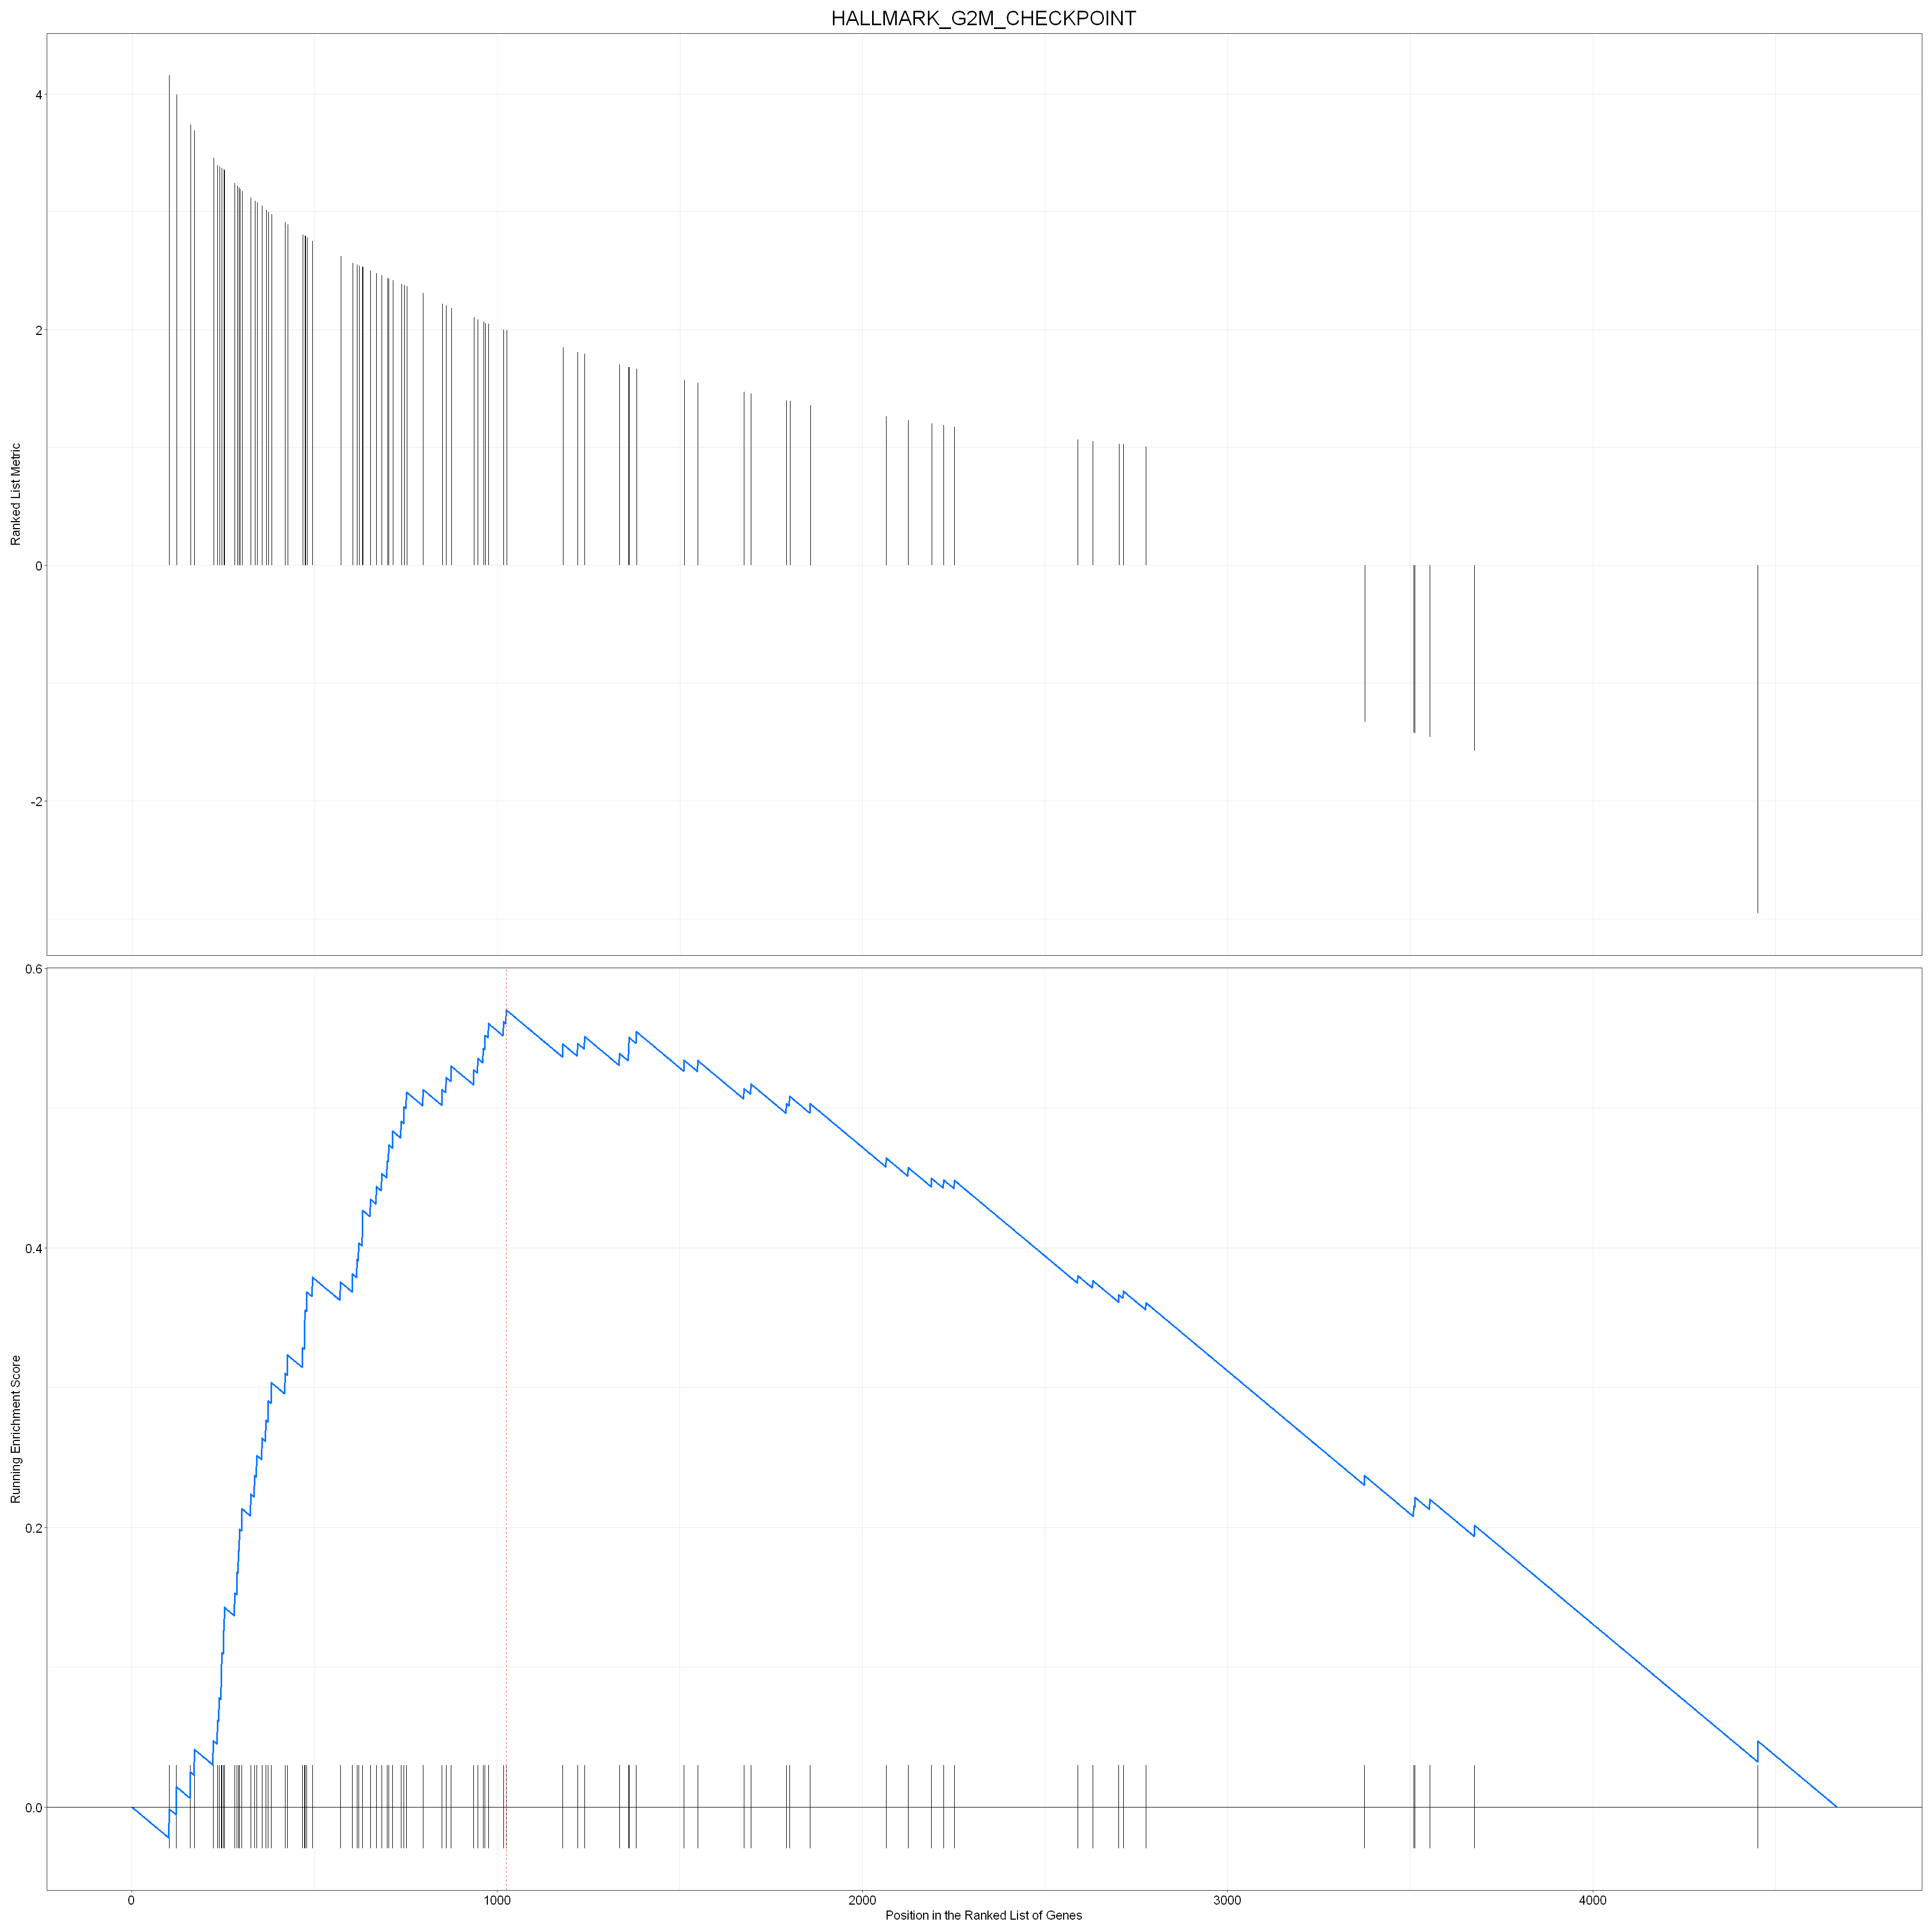

In [27]:
gseaplot(
  gsea_results,
  geneSetID = "HALLMARK_G2M_CHECKPOINT",
  title = "HALLMARK_G2M_CHECKPOINT",
  color.line = "#0d76ff"
)

In [28]:
gsea.df %>% 
arrange(NES) %>%
head(1)

ID                    Description           setSize
HALLMARK_ADIPOGENESIS HALLMARK_ADIPOGENESIS HALLMARK_ADIPOGENESIS 56     
                      enrichmentScore NES       pvalue    p.adjust  
HALLMARK_ADIPOGENESIS -0.5891708      -3.566836 2.403e-13 2.5632e-12
                      qvalue       rank leading_edge                  
HALLMARK_ADIPOGENESIS 1.517684e-12 1191 tags=73%, list=26%, signal=55%
                      core_enrichment                                                                                                                                                                                                                                
HALLMARK_ADIPOGENESIS ACADS/CDKN2C/STAT5A/ELMOD3/LAMA4/ARL4A/GBE1/SSPN/ME1/SPARCL1/CD302/RETSAT/SNCG/ITSN1/CAVIN1/PFKFB3/ANGPTL4/CAT/MYLK/MGLL/ALDH2/LIFR/FZD4/ENPP2/ANGPT1/MRAP/PPARG/ACADL/SORBS1/ITGA7/GPX3/CAVIN2/ITIH5/CD36/GPAM/LIPE/LPL/FABP4/CIDEA/ADIPOQ/LEP

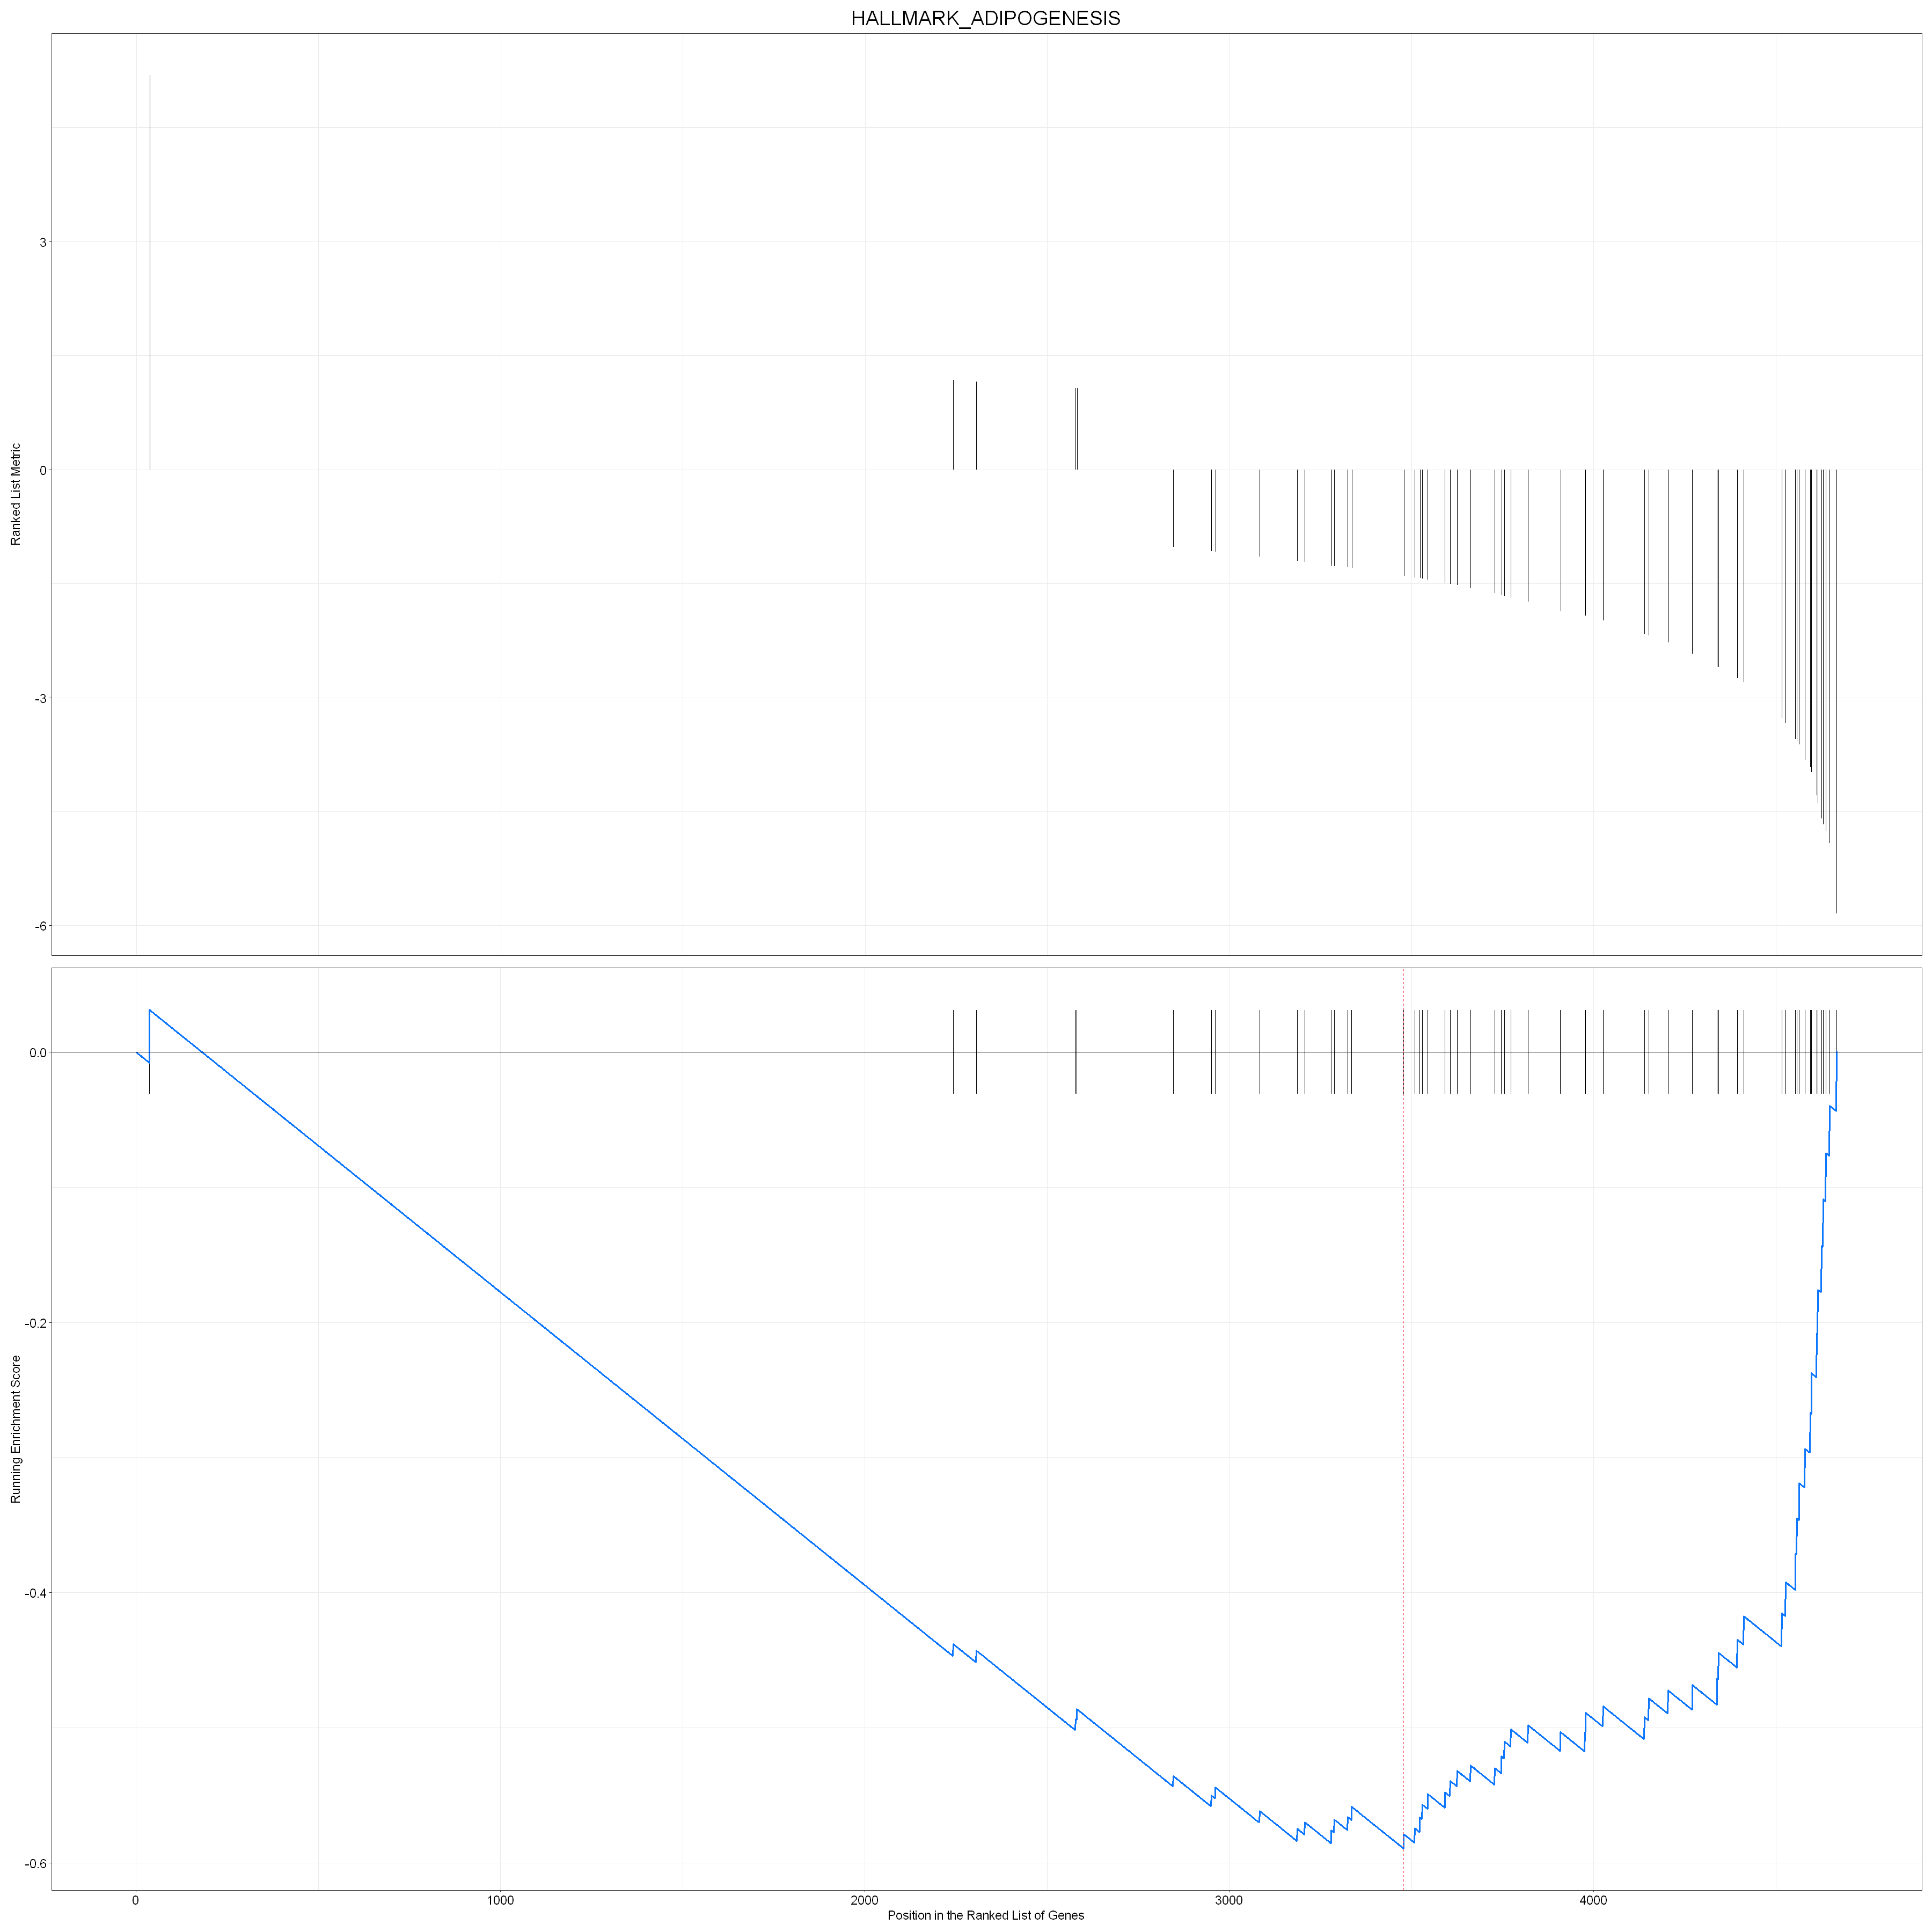

In [29]:
gseaplot(
  gsea_results,
  geneSetID = "HALLMARK_ADIPOGENESIS",
  title = "HALLMARK_ADIPOGENESIS",
  color.line = "#0d76ff"
)

In [30]:
write.table(gsea.df,"results_GSEA_hallmark_RNAseq.tsv", sep="\t", quote = F, col.names = T, row.names = F)

In [31]:
library(tidyverse)
load("exp.rda")
clin.data <- data.frame(exp@colData)
head(clin.data)

barcode                      patient     
TCGA-D8-A146-01A-31R-A115-07 TCGA-D8-A146-01A-31R-A115-07 TCGA-D8-A146
TCGA-AQ-A0Y5-01A-11R-A14M-07 TCGA-AQ-A0Y5-01A-11R-A14M-07 TCGA-AQ-A0Y5
TCGA-C8-A274-01A-11R-A16F-07 TCGA-C8-A274-01A-11R-A16F-07 TCGA-C8-A274
TCGA-BH-A0BD-01A-11R-A034-07 TCGA-BH-A0BD-01A-11R-A034-07 TCGA-BH-A0BD
TCGA-B6-A1KC-01B-11R-A157-07 TCGA-B6-A1KC-01B-11R-A157-07 TCGA-B6-A1KC
TCGA-AC-A62V-01A-11R-A31O-07 TCGA-AC-A62V-01A-11R-A31O-07 TCGA-AC-A62V
                             sample           shortLetterCode
TCGA-D8-A146-01A-31R-A115-07 TCGA-D8-A146-01A TP             
TCGA-AQ-A0Y5-01A-11R-A14M-07 TCGA-AQ-A0Y5-01A TP             
TCGA-C8-A274-01A-11R-A16F-07 TCGA-C8-A274-01A TP             
TCGA-BH-A0BD-01A-11R-A034-07 TCGA-BH-A0BD-01A TP             
TCGA-B6-A1KC-01B-11R-A157-07 TCGA-B6-A1KC-01B TP             
TCGA-AC-A62V-01A-11R-A31O-07 TCGA-AC-A62V-01A TP             
                             definition          sample_submitter_id
TCGA-D8-A146-01A-31R-A115-07 Primary solid Tumor TCGA-D8-A146-01A   
TCGA-AQ-A0Y5-01A-11R-A14M-07 Primary solid Tumor TCGA-AQ-A0Y5-01A   
TCGA-C8-A274-01A-11R-A16F-07 Primary solid Tumor TCGA-C8-A274-01A   
TCGA-BH-A0BD-01A-11R-A034-07 Primary solid Tumor TCGA-BH-A0BD-01A   
TCGA-B6-A1KC-01B-11R-A157-07 Primary solid Tumor TCGA-B6-A1KC-01B   
TCGA-AC-A62V-01A-11R-A31O-07 Primary solid Tumor TCGA-AC-A62V-01A   
                             sample_type_id tumor_descriptor
TCGA-D8-A146-01A-31R-A115-07 01             Primary         
TCGA-AQ-A0Y5-01A-11R-A14M-07 01             Primary         
TCGA-C8-A274-01A-11R-A16F-07 01             Primary         
TCGA-BH-A0BD-01A-11R-A034-07 01             Primary         
TCGA-B6-A1KC-01B-11R-A157-07 01             Primary         
TCGA-AC-A62V-01A-11R-A31O-07 01             Primary         
                             sample_id                            sample_type  
TCGA-D8-A146-01A-31R-A115-07 e8232960-f69e-4491-9cf0-ed7bdcf20031 Primary Tumor
TCGA-AQ-A0Y5-01A-11R-A14M-07 f5675b71-ed1b-4fdb-be07-d627dc98ed88 Primary Tumor
TCGA-C8-A274-01A-11R-A16F-07 7a3cd962-7512-4797-864a-cf374b5cb385 Primary Tumor
TCGA-BH-A0BD-01A-11R-A034-07 832b8766-0e59-4ad4-b4c9-1e39b2ce4fb1 Primary Tumor
TCGA-B6-A1KC-01B-11R-A157-07 018b2eaa-216b-4726-a26e-ac726f4b47d3 Primary Tumor
TCGA-AC-A62V-01A-11R-A31O-07 61db743a-627f-4666-b958-2542dbf3f320 Primary Tumor
                             ⋯ paper_tobacco_smoking_history paper_CNV.Clusters
TCGA-D8-A146-01A-31R-A115-07 ⋯ NA                            NA                
TCGA-AQ-A0Y5-01A-11R-A14M-07 ⋯ NA                            C4                
TCGA-C8-A274-01A-11R-A16F-07 ⋯ NA                            C1                
TCGA-BH-A0BD-01A-11R-A034-07 ⋯ NA                            C1                
TCGA-B6-A1KC-01B-11R-A157-07 ⋯ NA                            C4                
TCGA-AC-A62V-01A-11R-A31O-07 ⋯ NA                            NA                
                             paper_Mutation.Clusters
TCGA-D8-A146-01A-31R-A115-07 C4                     
TCGA-AQ-A0Y5-01A-11R-A14M-07 C4                     
TCGA-C8-A274-01A-11R-A16F-07 C6                     
TCGA-BH-A0BD-01A-11R-A034-07 C2                     
TCGA-B6-A1KC-01B-11R-A157-07 C3                     
TCGA-AC-A62V-01A-11R-A31O-07 NA                     
                             paper_DNA.Methylation.Clusters paper_mRNA.Clusters
TCGA-D8-A146-01A-31R-A115-07 C1                             C1                 
TCGA-AQ-A0Y5-01A-11R-A14M-07 C2                             C1                 
TCGA-C8-A274-01A-11R-A16F-07 C2                             C1                 
TCGA-BH-A0BD-01A-11R-A034-07 C1                             C1                 
TCGA-B6-A1KC-01B-11R-A157-07 C1                             C1                 
TCGA-AC-A62V-01A-11R-A31O-07 NA                             NA                 
                             paper_miRNA.Clusters paper_lncRNA.Clusters
TCGA-D8-A146-01A-31R-A115-07 NA                   C6             

In [32]:
# Select columns
surv.data <- clin.data %>% 
             dplyr::select(barcode,  
                           sample_type, 
                           gender,
                           race,
                           paper_age_at_initial_pathologic_diagnosis, 
                           paper_pathologic_stage, 
                           vital_status, 
                           days_to_last_follow_up, 
                           days_to_death)

head(surv.data)

barcode                      sample_type   gender
TCGA-D8-A146-01A-31R-A115-07 TCGA-D8-A146-01A-31R-A115-07 Primary Tumor female
TCGA-AQ-A0Y5-01A-11R-A14M-07 TCGA-AQ-A0Y5-01A-11R-A14M-07 Primary Tumor female
TCGA-C8-A274-01A-11R-A16F-07 TCGA-C8-A274-01A-11R-A16F-07 Primary Tumor female
TCGA-BH-A0BD-01A-11R-A034-07 TCGA-BH-A0BD-01A-11R-A034-07 Primary Tumor female
TCGA-B6-A1KC-01B-11R-A157-07 TCGA-B6-A1KC-01B-11R-A157-07 Primary Tumor female
TCGA-AC-A62V-01A-11R-A31O-07 TCGA-AC-A62V-01A-11R-A31O-07 Primary Tumor male  
                             race                     
TCGA-D8-A146-01A-31R-A115-07 white                    
TCGA-AQ-A0Y5-01A-11R-A14M-07 white                    
TCGA-C8-A274-01A-11R-A16F-07 asian                    
TCGA-BH-A0BD-01A-11R-A034-07 white                    
TCGA-B6-A1KC-01B-11R-A157-07 white                    
TCGA-AC-A62V-01A-11R-A31O-07 black or african american
                             paper_age_at_initial_pathologic_diagnosis
TCGA-D8-A146-01A-31R-A115-07 57                                       
TCGA-AQ-A0Y5-01A-11R-A14M-07 70                                       
TCGA-C8-A274-01A-11R-A16F-07 63                                       
TCGA-BH-A0BD-01A-11R-A034-07 47                                       
TCGA-B6-A1KC-01B-11R-A157-07 67                                       
TCGA-AC-A62V-01A-11R-A31O-07 NA                                       
                             paper_pathologic_stage vital_status
TCGA-D8-A146-01A-31R-A115-07 Stage_II               Alive       
TCGA-AQ-A0Y5-01A-11R-A14M-07 Stage_III              Dead        
TCGA-C8-A274-01A-11R-A16F-07 Stage_II               Alive       
TCGA-BH-A0BD-01A-11R-A034-07 Stage_II               Alive       
TCGA-B6-A1KC-01B-11R-A157-07 Stage_II               Alive       
TCGA-AC-A62V-01A-11R-A31O-07 NA                     Dead        
                             days_to_last_follow_up days_to_death
TCGA-D8-A146-01A-31R-A115-07  643                    NA          
TCGA-AQ-A0Y5-01A-11R-A14M-07   NA                   172          
TCGA-C8-A274-01A-11R-A16F-07  508                    NA          
TCGA-BH-A0BD-01A-11R-A034-07  554                    NA          
TCGA-B6-A1KC-01B-11R-A157-07 1326                    NA          
TCGA-AC-A62V-01A-11R-A31O-07    2                   348

In [33]:
# Code for time and status
surv.data <- surv.data %>%      
             mutate(OS.days = case_when(vital_status == "Alive" ~ days_to_last_follow_up,
                                        vital_status == "Dead" ~ days_to_death)) %>%
             mutate(Status = recode(vital_status, "Alive" = 0, "Dead" = 1)) %>% 
             mutate(Status = as.numeric(Status)) %>% 
             mutate(OS.month = round(as.numeric(OS.days)/30, 3))

head(surv.data)

barcode                      sample_type   gender
TCGA-D8-A146-01A-31R-A115-07 TCGA-D8-A146-01A-31R-A115-07 Primary Tumor female
TCGA-AQ-A0Y5-01A-11R-A14M-07 TCGA-AQ-A0Y5-01A-11R-A14M-07 Primary Tumor female
TCGA-C8-A274-01A-11R-A16F-07 TCGA-C8-A274-01A-11R-A16F-07 Primary Tumor female
TCGA-BH-A0BD-01A-11R-A034-07 TCGA-BH-A0BD-01A-11R-A034-07 Primary Tumor female
TCGA-B6-A1KC-01B-11R-A157-07 TCGA-B6-A1KC-01B-11R-A157-07 Primary Tumor female
TCGA-AC-A62V-01A-11R-A31O-07 TCGA-AC-A62V-01A-11R-A31O-07 Primary Tumor male  
                             race                     
TCGA-D8-A146-01A-31R-A115-07 white                    
TCGA-AQ-A0Y5-01A-11R-A14M-07 white                    
TCGA-C8-A274-01A-11R-A16F-07 asian                    
TCGA-BH-A0BD-01A-11R-A034-07 white                    
TCGA-B6-A1KC-01B-11R-A157-07 white                    
TCGA-AC-A62V-01A-11R-A31O-07 black or african american
                             paper_age_at_initial_pathologic_diagnosis
TCGA-D8-A146-01A-31R-A115-07 57                                       
TCGA-AQ-A0Y5-01A-11R-A14M-07 70                                       
TCGA-C8-A274-01A-11R-A16F-07 63                                       
TCGA-BH-A0BD-01A-11R-A034-07 47                                       
TCGA-B6-A1KC-01B-11R-A157-07 67                                       
TCGA-AC-A62V-01A-11R-A31O-07 NA                                       
                             paper_pathologic_stage vital_status
TCGA-D8-A146-01A-31R-A115-07 Stage_II               Alive       
TCGA-AQ-A0Y5-01A-11R-A14M-07 Stage_III              Dead        
TCGA-C8-A274-01A-11R-A16F-07 Stage_II               Alive       
TCGA-BH-A0BD-01A-11R-A034-07 Stage_II               Alive       
TCGA-B6-A1KC-01B-11R-A157-07 Stage_II               Alive       
TCGA-AC-A62V-01A-11R-A31O-07 NA                     Dead        
                             days_to_last_follow_up days_to_death OS.days
TCGA-D8-A146-01A-31R-A115-07  643                    NA            643   
TCGA-AQ-A0Y5-01A-11R-A14M-07   NA                   172            172   
TCGA-C8-A274-01A-11R-A16F-07  508                    NA            508   
TCGA-BH-A0BD-01A-11R-A034-07  554                    NA            554   
TCGA-B6-A1KC-01B-11R-A157-07 1326                    NA           1326   
TCGA-AC-A62V-01A-11R-A31O-07    2                   348            348   
                             Status OS.month
TCGA-D8-A146-01A-31R-A115-07 0      21.433  
TCGA-AQ-A0Y5-01A-11R-A14M-07 1       5.733  
TCGA-C8-A274-01A-11R-A16F-07 0      16.933  
TCGA-BH-A0BD-01A-11R-A034-07 0      18.467  
TCGA-B6-A1KC-01B-11R-A157-07 0      44.200  
TCGA-AC-A62V-01A-11R-A31O-07 1      11.600

In [34]:
# Filter for tumor samples and survival data
surv.data <- surv.data %>% 
             filter(sample_type == "Primary Tumor") %>% 
             filter(Status %in% c("0", "1")) %>% 
             filter(OS.month != "NA") 
head(surv.data)

barcode                      sample_type   gender
TCGA-D8-A146-01A-31R-A115-07 TCGA-D8-A146-01A-31R-A115-07 Primary Tumor female
TCGA-AQ-A0Y5-01A-11R-A14M-07 TCGA-AQ-A0Y5-01A-11R-A14M-07 Primary Tumor female
TCGA-C8-A274-01A-11R-A16F-07 TCGA-C8-A274-01A-11R-A16F-07 Primary Tumor female
TCGA-BH-A0BD-01A-11R-A034-07 TCGA-BH-A0BD-01A-11R-A034-07 Primary Tumor female
TCGA-B6-A1KC-01B-11R-A157-07 TCGA-B6-A1KC-01B-11R-A157-07 Primary Tumor female
TCGA-AC-A62V-01A-11R-A31O-07 TCGA-AC-A62V-01A-11R-A31O-07 Primary Tumor male  
                             race                     
TCGA-D8-A146-01A-31R-A115-07 white                    
TCGA-AQ-A0Y5-01A-11R-A14M-07 white                    
TCGA-C8-A274-01A-11R-A16F-07 asian                    
TCGA-BH-A0BD-01A-11R-A034-07 white                    
TCGA-B6-A1KC-01B-11R-A157-07 white                    
TCGA-AC-A62V-01A-11R-A31O-07 black or african american
                             paper_age_at_initial_pathologic_diagnosis
TCGA-D8-A146-01A-31R-A115-07 57                                       
TCGA-AQ-A0Y5-01A-11R-A14M-07 70                                       
TCGA-C8-A274-01A-11R-A16F-07 63                                       
TCGA-BH-A0BD-01A-11R-A034-07 47                                       
TCGA-B6-A1KC-01B-11R-A157-07 67                                       
TCGA-AC-A62V-01A-11R-A31O-07 NA                                       
                             paper_pathologic_stage vital_status
TCGA-D8-A146-01A-31R-A115-07 Stage_II               Alive       
TCGA-AQ-A0Y5-01A-11R-A14M-07 Stage_III              Dead        
TCGA-C8-A274-01A-11R-A16F-07 Stage_II               Alive       
TCGA-BH-A0BD-01A-11R-A034-07 Stage_II               Alive       
TCGA-B6-A1KC-01B-11R-A157-07 Stage_II               Alive       
TCGA-AC-A62V-01A-11R-A31O-07 NA                     Dead        
                             days_to_last_follow_up days_to_death OS.days
TCGA-D8-A146-01A-31R-A115-07  643                    NA            643   
TCGA-AQ-A0Y5-01A-11R-A14M-07   NA                   172            172   
TCGA-C8-A274-01A-11R-A16F-07  508                    NA            508   
TCGA-BH-A0BD-01A-11R-A034-07  554                    NA            554   
TCGA-B6-A1KC-01B-11R-A157-07 1326                    NA           1326   
TCGA-AC-A62V-01A-11R-A31O-07    2                   348            348   
                             Status OS.month
TCGA-D8-A146-01A-31R-A115-07 0      21.433  
TCGA-AQ-A0Y5-01A-11R-A14M-07 1       5.733  
TCGA-C8-A274-01A-11R-A16F-07 0      16.933  
TCGA-BH-A0BD-01A-11R-A034-07 0      18.467  
TCGA-B6-A1KC-01B-11R-A157-07 0      44.200  
TCGA-AC-A62V-01A-11R-A31O-07 1      11.600

In [35]:
# Change data types
surv.data <- surv.data %>% 
             mutate(Status = as.numeric(Status)) %>%
             mutate(age = paper_age_at_initial_pathologic_diagnosis) %>% 
             mutate(stage = paper_pathologic_stage) %>% 
             dplyr::select(barcode, OS.month, Status, gender, race, age, stage)

head(surv.data)

barcode                      OS.month Status
TCGA-D8-A146-01A-31R-A115-07 TCGA-D8-A146-01A-31R-A115-07 21.433   0     
TCGA-AQ-A0Y5-01A-11R-A14M-07 TCGA-AQ-A0Y5-01A-11R-A14M-07  5.733   1     
TCGA-C8-A274-01A-11R-A16F-07 TCGA-C8-A274-01A-11R-A16F-07 16.933   0     
TCGA-BH-A0BD-01A-11R-A034-07 TCGA-BH-A0BD-01A-11R-A034-07 18.467   0     
TCGA-B6-A1KC-01B-11R-A157-07 TCGA-B6-A1KC-01B-11R-A157-07 44.200   0     
TCGA-AC-A62V-01A-11R-A31O-07 TCGA-AC-A62V-01A-11R-A31O-07 11.600   1     
                             gender race                      age stage    
TCGA-D8-A146-01A-31R-A115-07 female white                     57  Stage_II 
TCGA-AQ-A0Y5-01A-11R-A14M-07 female white                     70  Stage_III
TCGA-C8-A274-01A-11R-A16F-07 female asian                     63  Stage_II 
TCGA-BH-A0BD-01A-11R-A034-07 female white                     47  Stage_II 
TCGA-B6-A1KC-01B-11R-A157-07 female white                     67  Stage_II 
TCGA-AC-A62V-01A-11R-A31O-07 male   black or african american NA  NA

In [36]:
vsd.df <- read.delim("exp_vsd.tsv", stringsAsFactors = F, check.names = F, row.names = 1)

head(vsd.df)

TCGA-E9-A1RH-01A-21R-A169-07 TCGA-C8-A26W-01A-11R-A16F-07
ENSG00000000003.15  8.311697                    11.500059                   
ENSG00000000005.6   3.199770                     4.562247                   
ENSG00000000419.13 12.497017                    11.108268                   
ENSG00000000457.14  9.298109                    10.285392                   
ENSG00000000460.17  9.368439                     9.821100                   
ENSG00000000938.13  8.349031                     8.711656                   
                   TCGA-E9-A1RH-11A-34R-A169-07 TCGA-AO-A0JJ-01A-11R-A056-07
ENSG00000000003.15 12.006557                    11.756872                   
ENSG00000000005.6   9.815475                     7.531088                   
ENSG00000000419.13 10.861625                    10.761724                   
ENSG00000000457.14 10.241537                    10.584015                   
ENSG00000000460.17  8.047376                     9.134589                   
ENSG00000000938.13  9.399114                     9.365980                   
                   TCGA-BH-A0HO-01A-11R-A034-07 TCGA-BH-A18F-01A-11R-A12D-07
ENSG00000000003.15  7.984336                    11.185166                   
ENSG00000000005.6   4.442449                     9.296014                   
ENSG00000000419.13 10.696830                    10.832565                   
ENSG00000000457.14 10.740275                    10.856216                   
ENSG00000000460.17  8.562972                     9.940780                   
ENSG00000000938.13  9.057730                     8.991765                   
                   TCGA-C8-A12O-01A-11R-A115-07 TCGA-AQ-A04H-01B-11R-A10J-07
ENSG00000000003.15 11.939597                     9.817438                   
ENSG00000000005.6   4.095324                     3.627807                   
ENSG00000000419.13 11.230456                    11.806902                   
ENSG00000000457.14  9.871540                    10.048119                   
ENSG00000000460.17  8.878299                     8.768675                   
ENSG00000000938.13  9.203164                     7.530938                   
                   TCGA-BH-A0HY-01A-11R-A056-07 TCGA-B6-A40B-01A-11R-A239-07 ⋯
ENSG00000000003.15 10.527278                    11.715095                    ⋯
ENSG00000000005.6   5.497939                     5.705476                    ⋯
ENSG00000000419.13 11.158832                    10.849923                    ⋯
ENSG00000000457.14 11.317374                    10.519723                    ⋯
ENSG00000000460.17 10.180254                     9.022895                    ⋯
ENSG00000000938.13  7.641017                     9.088494                    ⋯
                   TCGA-AR-A1AU-01A-11R-A12P-07 TCGA-B6-A0IG-01A-11R-A034-07
ENSG00000000003.15 10.558245                    11.631090                   
ENSG00000000005.6   6.764132                     4.668811                   
ENSG00000000419.13 10.522571                    10.995924                   
ENSG00000000457.14 10.506321                    10.217058                   
ENSG00000000460.17  8.951283                     9.101389                   
ENSG00000000938.13  8.350007                     7.871863                   
                   TCGA-EW-A6SC-01A-12R-A32P-07 TCGA-OL-A66I-01A-21R-A29R-07
ENSG00000000003.15 10.782271                    11.331094                   
ENSG00000000005.6   5.368313                     6.327761                   
ENSG00000000419.13 10.699905                    11.919323                   
ENSG00000000457.14 10.128445                    10.520009                   
ENSG00000000460.17  9.140594                    10.646623                   
ENSG00000000938.13  8.535466                    10.455627                   
                   TCGA-AO-A0JE-01A-11R-A056-07 TCGA-BH-A0AU-01A-11R-A12P-07
ENSG00000000003.15 11.200157                    10.618826                   
ENSG00000000005.6   4.161948                     6.197988                   
E

In [37]:
# Load DEG
deg.df <- read.delim("results_DEGs_DESeq2.tsv")

dim(deg.df)
head(deg.df)

[1] 4668    8

gene_id            baseMean  log2FoldChange lfcSE     pvalue       
1 ENSG00000099953.10 24128.713  6.209371      0.1444367  0.000000e+00
2 ENSG00000101605.13   557.879 -4.729958      0.1231026  0.000000e+00
3 ENSG00000119927.14  4805.515 -4.286995      0.1045970  0.000000e+00
4 ENSG00000123500.10  8508.502  7.105913      0.1562923  0.000000e+00
5 ENSG00000117650.13  1467.549  4.157178      0.1121924 9.186478e-303
6 ENSG00000022267.19  9043.842 -4.925569      0.1406956 2.732241e-271
  padj          gene_name gene_type     
1  0.000000e+00 MMP11     protein_coding
2  0.000000e+00 MYOM1     protein_coding
3  0.000000e+00 GPAM      protein_coding
4  0.000000e+00 COL10A1   protein_coding
5 8.580538e-299 NEK2      protein_coding
6 1.822873e-267 FHL1      protein_coding

In [38]:
# Subset rows = gene_id, columns = barcode 
vsd.deg <- vsd.df[deg.df$gene_id, surv.data$barcode]

head(vsd.deg)

TCGA-D8-A146-01A-31R-A115-07 TCGA-AQ-A0Y5-01A-11R-A14M-07
ENSG00000099953.10 15.377274                    15.333896                   
ENSG00000101605.13  7.588153                     7.149287                   
ENSG00000119927.14 11.378319                    10.194954                   
ENSG00000123500.10 14.630941                    13.953540                   
ENSG00000117650.13  9.032882                     8.338837                   
ENSG00000022267.19 12.099416                    10.750176                   
                   TCGA-C8-A274-01A-11R-A16F-07 TCGA-BH-A0BD-01A-11R-A034-07
ENSG00000099953.10 14.374639                    15.025037                   
ENSG00000101605.13  5.813858                     7.452638                   
ENSG00000119927.14 10.969416                    10.876327                   
ENSG00000123500.10 12.769014                    12.519697                   
ENSG00000117650.13 10.862937                    12.301941                   
ENSG00000022267.19  8.262647                    11.521652                   
                   TCGA-B6-A1KC-01B-11R-A157-07 TCGA-AC-A62V-01A-11R-A31O-07
ENSG00000099953.10 11.923217                    16.687628                   
ENSG00000101605.13  8.062070                     6.896864                   
ENSG00000119927.14 10.963818                    10.753810                   
ENSG00000123500.10 10.149776                    12.723851                   
ENSG00000117650.13 10.960883                    11.685655                   
ENSG00000022267.19  9.608183                    10.452348                   
                   TCGA-AO-A0J5-01A-11R-A034-07 TCGA-BH-A0B1-01A-12R-A056-07
ENSG00000099953.10 14.170909                    14.109388                   
ENSG00000101605.13  8.078982                     7.247029                   
ENSG00000119927.14 12.020879                     9.662666                   
ENSG00000123500.10 14.583897                    12.685963                   
ENSG00000117650.13 10.240994                    11.197178                   
ENSG00000022267.19 11.943215                    10.566811                   
                   TCGA-A2-A0YM-01A-11R-A109-07 TCGA-AO-A03N-01B-11R-A10J-07 ⋯
ENSG00000099953.10 12.709437                    14.653705                    ⋯
ENSG00000101605.13  8.792240                     5.592008                    ⋯
ENSG00000119927.14  9.917396                     9.786624                    ⋯
ENSG00000123500.10 11.373532                    13.779744                    ⋯
ENSG00000117650.13 11.806728                    11.452657                    ⋯
ENSG00000022267.19 10.299951                    10.999334                    ⋯
                   TCGA-E2-A1IG-01A-11R-A144-07 TCGA-E9-A1NA-01A-11R-A144-07
ENSG00000099953.10 15.872803                    16.660921                   
ENSG00000101605.13  7.179583                     7.401897                   
ENSG00000119927.14  9.730696                    10.173342                   
ENSG00000123500.10 14.645228                    15.165454                   
ENSG00000117650.13 10.010496                    10.808581                   
ENSG00000022267.19 10.712429                     9.829220                   
                   TCGA-D8-A1JP-01A-11R-A13Q-07 TCGA-AR-A252-01A-11R-A169-07
ENSG00000099953.10 15.865119                    13.177540                   
ENSG00000101605.13  7.486483                     8.334647                   
ENSG00000119927.14  9.572319                    12.319414                   
ENSG00000123500.10 14.632620                    11.737568                   
ENSG00000117650.13 10.781024                     9.285188                   
ENSG00000022267.19 10.855929                    12.986829                   
                   TCGA-D8-A1XL-01A-11R-A14M-07 TCGA-BH-A0EI-01A-11R-A115-07
ENSG00000099953.10 15.278635                    15.981625                   
ENSG00000101605.13  6.091240                     7.719429                   
E

In [39]:
# Transpose rows/columns
vsd.deg <- t(vsd.deg) %>% 
           as.data.frame() 

head(vsd.deg)

ENSG00000099953.10 ENSG00000101605.13
TCGA-D8-A146-01A-31R-A115-07 15.37727           7.588153          
TCGA-AQ-A0Y5-01A-11R-A14M-07 15.33390           7.149287          
TCGA-C8-A274-01A-11R-A16F-07 14.37464           5.813858          
TCGA-BH-A0BD-01A-11R-A034-07 15.02504           7.452638          
TCGA-B6-A1KC-01B-11R-A157-07 11.92322           8.062070          
TCGA-AC-A62V-01A-11R-A31O-07 16.68763           6.896864          
                             ENSG00000119927.14 ENSG00000123500.10
TCGA-D8-A146-01A-31R-A115-07 11.37832           14.63094          
TCGA-AQ-A0Y5-01A-11R-A14M-07 10.19495           13.95354          
TCGA-C8-A274-01A-11R-A16F-07 10.96942           12.76901          
TCGA-BH-A0BD-01A-11R-A034-07 10.87633           12.51970          
TCGA-B6-A1KC-01B-11R-A157-07 10.96382           10.14978          
TCGA-AC-A62V-01A-11R-A31O-07 10.75381           12.72385          
                             ENSG00000117650.13 ENSG00000022267.19
TCGA-D8-A146-01A-31R-A115-07  9.032882          12.099416         
TCGA-AQ-A0Y5-01A-11R-A14M-07  8.338837          10.750176         
TCGA-C8-A274-01A-11R-A16F-07 10.862937           8.262647         
TCGA-BH-A0BD-01A-11R-A034-07 12.301941          11.521652         
TCGA-B6-A1KC-01B-11R-A157-07 10.960883           9.608183         
TCGA-AC-A62V-01A-11R-A31O-07 11.685655          10.452348         
                             ENSG00000079308.19 ENSG00000060718.22
TCGA-D8-A146-01A-31R-A115-07 13.45122           14.89383          
TCGA-AQ-A0Y5-01A-11R-A14M-07 13.50183           15.77743          
TCGA-C8-A274-01A-11R-A16F-07 11.97298           13.60916          
TCGA-BH-A0BD-01A-11R-A034-07 14.17856           12.35455          
TCGA-B6-A1KC-01B-11R-A157-07 12.81580           10.38777          
TCGA-AC-A62V-01A-11R-A31O-07 12.09680           12.94061          
                             ENSG00000090889.12 ENSG00000133800.9 ⋯
TCGA-D8-A146-01A-31R-A115-07  9.229849          7.807225          ⋯
TCGA-AQ-A0Y5-01A-11R-A14M-07  9.032058          7.904637          ⋯
TCGA-C8-A274-01A-11R-A16F-07 10.617590          5.235806          ⋯
TCGA-BH-A0BD-01A-11R-A034-07 11.219433          7.186797          ⋯
TCGA-B6-A1KC-01B-11R-A157-07 10.998576          6.303732          ⋯
TCGA-AC-A62V-01A-11R-A31O-07 11.365731          7.492218          ⋯
                             ENSG00000268940.5 ENSG00000261667.1
TCGA-D8-A146-01A-31R-A115-07 3.19977           3.637195         
TCGA-AQ-A0Y5-01A-11R-A14M-07 3.19977           4.395915         
TCGA-C8-A274-01A-11R-A16F-07 3.19977           3.608649         
TCGA-BH-A0BD-01A-11R-A034-07 3.19977           3.199770         
TCGA-B6-A1KC-01B-11R-A157-07 3.19977           3.199770         
TCGA-AC-A62V-01A-11R-A31O-07 3.19977           3.199770         
                             ENSG00000205857.2 ENSG00000177468.7
TCGA-D8-A146-01A-31R-A115-07 3.637195          4.862600         
TCGA-AQ-A0Y5-01A-11R-A14M-07 3.199770          3.995334         
TCGA-C8-A274-01A-11R-A16F-07 3.199770          3.199770         
TCGA-BH-A0BD-01A-11R-A034-07 3.199770          3.199770         
TCGA-B6-A1KC-01B-11R-A157-07 3.199770          3.199770         
TCGA-AC-A62V-01A-11R-A31O-07 3.199770          4.130050         
                             ENSG00000197849.6 ENSG00000163530.4
TCGA-D8-A146-01A-31R-A115-07 3.199770          3.19977          
TCGA-AQ-A0Y5-01A-11R-A14M-07 3.199770          3.19977          
TCGA-C8-A274-01A-11R-A16F-07 3.199770          3.19977          
TCGA-BH-A0BD-01A-11R-A034-07 3.199770          3.19977          
TCGA-B6-A1KC-01B-11R-A157-07 3.199770          3.19977          
TCGA-AC-A62V-01A-11R-A31O-07 3.963615          3.19977          
                             ENSG00000159182.5 ENSG00000153498.12
TCGA-D8-A146-01A-31R-A115-07 3.199770          3.199770          
TCGA-AQ-A0Y5-01A-11R-A14M-07 3.199770          5.464829          
TCGA-C8-A274-01A-11R-A16F-07 3.199770          3.199770          
TCGA-BH-A0BD-01A-11R-A034-07 3.199770          3

In [40]:
# Check rownames match
any(rownames(surv.data) != rownames(vsd.deg))

[1] FALSE

In [41]:
# Bind columns
cox.data <- cbind(surv.data, vsd.deg) 

head(cox.data)

barcode                      OS.month Status
TCGA-D8-A146-01A-31R-A115-07 TCGA-D8-A146-01A-31R-A115-07 21.433   0     
TCGA-AQ-A0Y5-01A-11R-A14M-07 TCGA-AQ-A0Y5-01A-11R-A14M-07  5.733   1     
TCGA-C8-A274-01A-11R-A16F-07 TCGA-C8-A274-01A-11R-A16F-07 16.933   0     
TCGA-BH-A0BD-01A-11R-A034-07 TCGA-BH-A0BD-01A-11R-A034-07 18.467   0     
TCGA-B6-A1KC-01B-11R-A157-07 TCGA-B6-A1KC-01B-11R-A157-07 44.200   0     
TCGA-AC-A62V-01A-11R-A31O-07 TCGA-AC-A62V-01A-11R-A31O-07 11.600   1     
                             gender race                      age stage    
TCGA-D8-A146-01A-31R-A115-07 female white                     57  Stage_II 
TCGA-AQ-A0Y5-01A-11R-A14M-07 female white                     70  Stage_III
TCGA-C8-A274-01A-11R-A16F-07 female asian                     63  Stage_II 
TCGA-BH-A0BD-01A-11R-A034-07 female white                     47  Stage_II 
TCGA-B6-A1KC-01B-11R-A157-07 female white                     67  Stage_II 
TCGA-AC-A62V-01A-11R-A31O-07 male   black or african american NA  NA       
                             ENSG00000099953.10 ENSG00000101605.13
TCGA-D8-A146-01A-31R-A115-07 15.37727           7.588153          
TCGA-AQ-A0Y5-01A-11R-A14M-07 15.33390           7.149287          
TCGA-C8-A274-01A-11R-A16F-07 14.37464           5.813858          
TCGA-BH-A0BD-01A-11R-A034-07 15.02504           7.452638          
TCGA-B6-A1KC-01B-11R-A157-07 11.92322           8.062070          
TCGA-AC-A62V-01A-11R-A31O-07 16.68763           6.896864          
                             ENSG00000119927.14 ⋯ ENSG00000268940.5
TCGA-D8-A146-01A-31R-A115-07 11.37832           ⋯ 3.19977          
TCGA-AQ-A0Y5-01A-11R-A14M-07 10.19495           ⋯ 3.19977          
TCGA-C8-A274-01A-11R-A16F-07 10.96942           ⋯ 3.19977          
TCGA-BH-A0BD-01A-11R-A034-07 10.87633           ⋯ 3.19977          
TCGA-B6-A1KC-01B-11R-A157-07 10.96382           ⋯ 3.19977          
TCGA-AC-A62V-01A-11R-A31O-07 10.75381           ⋯ 3.19977          
                             ENSG00000261667.1 ENSG00000205857.2
TCGA-D8-A146-01A-31R-A115-07 3.637195          3.637195         
TCGA-AQ-A0Y5-01A-11R-A14M-07 4.395915          3.199770         
TCGA-C8-A274-01A-11R-A16F-07 3.608649          3.199770         
TCGA-BH-A0BD-01A-11R-A034-07 3.199770          3.199770         
TCGA-B6-A1KC-01B-11R-A157-07 3.199770          3.199770         
TCGA-AC-A62V-01A-11R-A31O-07 3.199770          3.199770         
                             ENSG00000177468.7 ENSG00000197849.6
TCGA-D8-A146-01A-31R-A115-07 4.862600          3.199770         
TCGA-AQ-A0Y5-01A-11R-A14M-07 3.995334          3.199770         
TCGA-C8-A274-01A-11R-A16F-07 3.199770          3.199770         
TCGA-BH-A0BD-01A-11R-A034-07 3.199770          3.199770         
TCGA-B6-A1KC-01B-11R-A157-07 3.199770          3.199770         
TCGA-AC-A62V-01A-11R-A31O-07 4.130050          3.963615         
                             ENSG00000163530.4 ENSG00000159182.5
TCGA-D8-A146-01A-31R-A115-07 3.19977           3.199770         
TCGA-AQ-A0Y5-01A-11R-A14M-07 3.19977           3.199770         
TCGA-C8-A274-01A-11R-A16F-07 3.19977           3.199770         
TCGA-BH-A0BD-01A-11R-A034-07 3.19977           3.199770         
TCGA-B6-A1KC-01B-11R-A157-07 3.19977           3.199770         
TCGA-AC-A62V-01A-11R-A31O-07 3.19977           3.743006         
                             ENSG00000153498.12 ENSG00000136698.10
TCGA-D8-A146-01A-31R-A115-07 3.199770           3.816059          
TCGA-AQ-A0Y5-01A-11R-A14M-07 5.464829           3.199770          
TCGA-C8-A274-01A-11R-A16F-07 3.199770           3.199770          
TCGA-BH-A0BD-01A-11R-A034-07 3.199770           3.199770          
TCGA-B6-A1KC-01B-11R-A157-07 3.199770           3.199770          
TCGA-AC-A62V-01A-11R-A31O-07 3.199770           3.199770          
                             ENSG00000242515.5
TCGA-D8-A146-01A-31R-A115-07 3.19977          
TCGA-AQ-A0Y5-01A-11R-A14M-07 3.19977          
TCGA-C8-A274-01A-11R-A16F-07 3.19977          
TCGA-BH-A0BD

In [42]:
library(survival)
library(RegParallel)

res <- RegParallel(
  data = cox.data,
  formula = 'Surv(OS.month, Status) ~ [*]',  # [*] placeholder for gene
  FUN = function(formula, data)  
    coxph(formula = formula,
          data = data,
          ties = 'breslow',
          singular.ok = TRUE),
  FUNtype = 'coxph',
  variables = colnames(cox.data)[8:ncol(cox.data)], # only genes
  blocksize = 500,
  cores = 23
)

载入需要的程辑包：doParallel

载入需要的程辑包：foreach


载入程辑包：'foreach'


The following objects are masked from 'package:purrr':

    accumulate, when




载入需要的程辑包：iterators

载入需要的程辑包：parallel

载入需要的程辑包：data.table


载入程辑包：'data.table'


The following object is masked from 'package:SummarizedExperiment':

    shift


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


载入需要的程辑包：arm

载入需要的程辑包：MASS


载入程辑包：'MASS'


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:clusterProfiler':

    select


The following object is masked from 'package:dplyr':

    select


载入需要的程辑包：Matrix


载入程辑包：'Matrix'


The following obj

In [43]:
head(res)

Variable           Term               Beta          StandardError
1 ENSG00000099953.10 ENSG00000099953.10  0.0448764277 0.04977707   
2 ENSG00000101605.13 ENSG00000101605.13 -0.0259171381 0.08726669   
3 ENSG00000119927.14 ENSG00000119927.14 -0.0007437196 0.08989637   
4 ENSG00000123500.10 ENSG00000123500.10  0.0509118519 0.04259168   
5 ENSG00000117650.13 ENSG00000117650.13  0.0405042356 0.06745772   
6 ENSG00000022267.19 ENSG00000022267.19  0.0232249997 0.05690251   
  Z            P         LRT       Wald      LogRank   HR        HRlower  
1  0.901548162 0.3672969 0.3651810 0.3672969 0.3672080 1.0458986 0.9486790
2 -0.296987753 0.7664759 0.7657609 0.7664759 0.7664935 0.9744158 0.8212262
3 -0.008273077 0.9933991 0.9933984 0.9933991 0.9933991 0.9992566 0.8378323
4  1.195347332 0.2319514 0.2265050 0.2319514 0.2318513 1.0522301 0.9679583
5  0.600438854 0.5482138 0.5468451 0.5482138 0.5481992 1.0413357 0.9123693
6  0.408154221 0.6831605 0.6834854 0.6831605 0.6831698 1.0234968 0.9154845
  HRupper 
1 1.153081
2 1.156181
3 1.191782
4 1.143839
5 1.188532
6 1.144253

In [82]:
res.sig <- res %>% 
           filter(P < 0.005) %>% 
           filter(LogRank < 0.005) 

res.sig <- res.sig %>% 
           mutate(gene_id = Term) %>% 
           left_join(deg.df %>% dplyr::select(gene_id, gene_name, log2FoldChange), by= "gene_id") 

head(res.sig)

Variable           Term               Beta       StandardError Z        
1 ENSG00000095637.22 ENSG00000095637.22 -0.2216679 0.07305253    -3.034363
2 ENSG00000171241.9  ENSG00000171241.9   0.2141409 0.07125979     3.005073
3 ENSG00000102100.16 ENSG00000102100.16  0.4351503 0.14113848     3.083144
4 ENSG00000076554.15 ENSG00000076554.15  0.2521217 0.08691209     2.900882
5 ENSG00000145777.15 ENSG00000145777.15 -0.2786232 0.08144578    -3.420966
6 ENSG00000136011.15 ENSG00000136011.15 -0.2698254 0.09149373    -2.949113
  P            LRT          Wald         LogRank     HR        HRlower  
1 0.0024104460 0.0024372632 0.0024104460 0.002383059 0.8011814 0.6943020
2 0.0026551732 0.0024455208 0.0026551732 0.002578735 1.2387971 1.0773176
3 0.0020482588 0.0023028856 0.0020482588 0.002048234 1.5451953 1.1717800
4 0.0037211349 0.0038906124 0.0037211349 0.003771633 1.2867527 1.0852140
5 0.0006239924 0.0004228219 0.0006239924 0.000603752 0.7568250 0.6451619
6 0.0031868699 0.0020691690 0.0031868699 0.003226394 0.7635128 0.6381705
  HRupper   gene_id            gene_name log2FoldChange
1 0.9245136 ENSG00000095637.22 SORBS1    -3.546585     
2 1.4244809 ENSG00000171241.9  SHCBP1     2.545103     
3 2.0376081 ENSG00000102100.16 SLC35A2    1.261270     
4 1.5257198 ENSG00000076554.15 TPD52      1.836266     
5 0.8878145 ENSG00000145777.15 TSLP      -3.180033     
6 0.9134734 ENSG00000136011.15 STAB2     -2.812034

In [83]:
res.sig.up <-  res.sig %>% filter(HR > 1) %>% 
               filter(log2FoldChange > 0) %>% 
               arrange(-HR)

res.sig.up

Variable           Term               Beta      StandardError Z       
1  ENSG00000179958.10 ENSG00000179958.10 0.4442567 0.12567179    3.535055
2  ENSG00000102100.16 ENSG00000102100.16 0.4351503 0.14113848    3.083144
3  ENSG00000172172.8  ENSG00000172172.8  0.3796763 0.10533038    3.604623
4  ENSG00000110243.12 ENSG00000110243.12 0.3732744 0.11288276    3.306744
5  ENSG00000205409.3  ENSG00000205409.3  0.3452486 0.12234289    2.821975
6  ENSG00000161133.16 ENSG00000161133.16 0.3115710 0.07197924    4.328623
7  ENSG00000164934.14 ENSG00000164934.14 0.3040841 0.10211555    2.977843
8  ENSG00000182759.4  ENSG00000182759.4  0.2974362 0.08474796    3.509656
9  ENSG00000167011.9  ENSG00000167011.9  0.2772988 0.09232034    3.003659
10 ENSG00000147676.14 ENSG00000147676.14 0.2741303 0.08016951    3.419384
11 ENSG00000170681.7  ENSG00000170681.7  0.2693963 0.08040973    3.350295
12 ENSG00000076554.15 ENSG00000076554.15 0.2521217 0.08691209    2.900882
13 ENSG00000170835.16 ENSG00000170835.16 0.2222757 0.04706025    4.723216
14 ENSG00000184486.10 ENSG00000184486.10 0.2196909 0.05930718    3.704289
15 ENSG00000171241.9  ENSG00000171241.9  0.2141409 0.07125979    3.005073
16 ENSG00000131015.5  ENSG00000131015.5  0.1998167 0.06287226    3.178138
17 ENSG00000169427.8  ENSG00000169427.8  0.1976197 0.06426239    3.075200
18 ENSG00000272398.6  ENSG00000272398.6  0.1882286 0.05064698    3.716481
19 ENSG00000103485.19 ENSG00000103485.19 0.1865893 0.05409130    3.449524
20 ENSG00000184478.7  ENSG00000184478.7  0.1616576 0.05354282    3.019220
21 ENSG00000164778.4  ENSG00000164778.4  0.1443996 0.05064176    2.851393
22 ENSG00000147485.13 ENSG00000147485.13 0.1432428 0.04038075    3.547305
23 ENSG00000273706.5  ENSG00000273706.5  0.1325979 0.04291450    3.089817
24 ENSG00000043355.12 ENSG00000043355.12 0.1177279 0.03669922    3.207912
25 ENSG00000184937.16 ENSG00000184937.16 0.1121301 0.03719536    3.014626
26 ENSG00000196557.13 ENSG00000196557.13 0.1080161 0.03838048    2.814351
27 ENSG00000204710.2  ENSG00000204710.2  0.1052091 0.03298495    3.189609
28 ENSG00000009709.12 ENSG00000009709.12 0.1047568 0.03193680    3.280129
29 ENSG00000166509.12 ENSG00000166509.12 0.0540545 0.01707508    3.165696
   P            LRT          Wald         LogRank      HR       HRlower 
1  4.076902e-04 5.134452e-04 4.076902e-04 4.410240e-04 1.559331 1.218895
2  2.048259e-03 2.302886e-03 2.048259e-03 2.048234e-03 1.545195 1.171780
3  3.126069e-04 4.020063e-04 3.126069e-04 3.072399e-04 1.461811 1.189143
4  9.438703e-04 2.558195e-03 9.438703e-04 8.876681e-04 1.452483 1.164193
5  4.772885e-03 1.093697e-02 4.772885e-03 4.698217e-03 1.412341 1.111223
6  1.500442e-05 4.749986e-05 1.500442e-05 1.300378e-05 1.365569 1.185891
7  2.902842e-03 3.297360e-03 2.902842e-03 2.820866e-03 1.355383 1.109535
8  4.486867e-04 1.167004e-03 4.486867e-04 4.344956e-04 1.346402 1.140348
9  2.667541e-03 5.593636e-03 2.667541e-03 2.765985e-03 1.319561 1.101149
10 6.276304e-04 7.455221e-04 6.276304e-04 7.771614e-04 1.315386 1.124121
11 8.072544e-04 1.856999e-03 8.072544e-04 8.955018e-04 1.309174 1.118285
12 3.721135e-03 3.890612e-03 3.721135e-03 3.771633e-03 1.286753 1.085214
13 2.321446e-06 2.390511e-05 2.321446e-06 2.600343e-06 1.248916 1.138873
14 2.119848e-04 1.763939e-03 2.119848e-04 1.842988e-04 1.245692 1.108991
15 2.655173e-03 2.445521e-03 2.655173e-03 2.578735e-03 1.238797 1.077318
16 1.482242e-03 2.391931e-03 1.482242e-03 1.421617e-03 1.221179 1.079599
17 2.103613e-03 5.046748e-03 2.103613e-03 2.170991e-03 1.218499 1.074298
18 2.020166e-04 1.052231e-04 2.020166e-04 2.715469e-04 1.207109 1.093039
19 5.615755e-04 5.497934e-04 5.615755e-04 5.303345e-04 1.205132 1.083907
20 2.534263e-03 5.156570e-03 2.534263e-03 2.246885e-03 1.175458 1.058355
21 4.352813e-03 6.254666e-03 4.352813e-03 4.161260e-03 1.155346 1.046178
22 3.891943e-04 1.014115e-03 3.891943e-04 3.684436e-04 1.154010 1.066197
23 2.002800e-03 4.455432e-03 2.002800e-03 1.813803e-03 1.141791 1.049682
24 1.337025e-03 1.594486e-03 1.

In [84]:
res.sig.down <- res.sig %>% 
                filter(HR < 1) %>% 
                filter(log2FoldChange < 0) %>% 
                arrange(HR)

res.sig.down

Variable           Term               Beta        StandardError Z        
1  ENSG00000140067.6  ENSG00000140067.6  -0.59302778 0.20853080    -2.843838
2  ENSG00000184995.7  ENSG00000184995.7  -0.43058764 0.14786283    -2.912075
3  ENSG00000276289.4  ENSG00000276289.4  -0.36981139 0.12735315    -2.903826
4  ENSG00000184908.18 ENSG00000184908.18 -0.36810769 0.11901323    -3.092998
5  ENSG00000019485.13 ENSG00000019485.13 -0.36727211 0.12361245    -2.971158
6  ENSG00000168065.16 ENSG00000168065.16 -0.36074297 0.11521450    -3.131055
7  ENSG00000120471.15 ENSG00000120471.15 -0.34179350 0.08537108    -4.003621
8  ENSG00000171462.15 ENSG00000171462.15 -0.33344313 0.11048875    -3.017892
9  ENSG00000108984.15 ENSG00000108984.15 -0.31382516 0.07771012    -4.038408
10 ENSG00000215187.12 ENSG00000215187.12 -0.29899462 0.09127725    -3.275675
11 ENSG00000156475.18 ENSG00000156475.18 -0.29761000 0.08354113    -3.562437
12 ENSG00000127530.4  ENSG00000127530.4  -0.28177293 0.09970370    -2.826103
13 ENSG00000145777.15 ENSG00000145777.15 -0.27862320 0.08144578    -3.420966
14 ENSG00000164303.11 ENSG00000164303.11 -0.27378086 0.08979861    -3.048832
15 ENSG00000136011.15 ENSG00000136011.15 -0.26982538 0.09149373    -2.949113
16 ENSG00000170209.5  ENSG00000170209.5  -0.25414282 0.08912996    -2.851374
17 ENSG00000134917.10 ENSG00000134917.10 -0.24331268 0.06539539    -3.720640
18 ENSG00000196843.17 ENSG00000196843.17 -0.23982715 0.07900614    -3.035551
19 ENSG00000101349.17 ENSG00000101349.17 -0.22507678 0.06986092    -3.221784
20 ENSG00000095637.22 ENSG00000095637.22 -0.22166787 0.07305253    -3.034363
21 ENSG00000133433.11 ENSG00000133433.11 -0.21922928 0.07102765    -3.086534
22 ENSG00000016602.9  ENSG00000016602.9  -0.21473064 0.07591335    -2.828628
23 ENSG00000117594.10 ENSG00000117594.10 -0.20410428 0.06762385    -3.018229
24 ENSG00000165349.12 ENSG00000165349.12 -0.19777499 0.06534998    -3.026397
25 ENSG00000043591.6  ENSG00000043591.6  -0.19769940 0.05997242    -3.296505
26 ENSG00000164946.20 ENSG00000164946.20 -0.18577280 0.05482778    -3.388297
27 ENSG00000213366.13 ENSG00000213366.13 -0.17620584 0.06046806    -2.914032
28 ENSG00000272636.4  ENSG00000272636.4  -0.17216621 0.05304762    -3.245503
29 ENSG00000116729.14 ENSG00000116729.14 -0.17091891 0.05771192    -2.961588
30 ENSG00000186204.15 ENSG00000186204.15 -0.15213317 0.05288685    -2.876578
31 ENSG00000052850.8  ENSG00000052850.8  -0.14968600 0.04953870    -3.021597
32 ENSG00000005102.14 ENSG00000005102.14 -0.13896516 0.04611553    -3.013414
33 ENSG00000179388.9  ENSG00000179388.9  -0.13287781 0.04692025    -2.831993
34 ENSG00000140538.16 ENSG00000140538.16 -0.12874255 0.04327396    -2.975058
35 ENSG00000073282.14 ENSG00000073282.14 -0.12699661 0.04016268    -3.162055
36 ENSG00000160307.10 ENSG00000160307.10 -0.12496679 0.04292071    -2.911574
37 ENSG00000132465.12 ENSG00000132465.12 -0.11694155 0.02991381    -3.909283
38 ENSG00000162896.6  ENSG00000162896.6  -0.10751117 0.02930240    -3.669023
39 ENSG00000065618.21 ENSG00000065618.21 -0.10104101 0.03252630    -3.106440
40 ENSG00000186081.12 ENSG00000186081.12 -0.06964915 0.02428779    -2.867661
   P            LRT          Wald         LogRank      HR        HRlower  
1  4.457372e-03 2.210426e-03 4.457372e-03 4.299469e-03 0.5526514 0.3672397
2  3.590364e-03 2.491285e-03 3.590364e-03 3.592948e-03 0.6501269 0.4865608
3  3.686330e-03 2.340858e-03 3.686330e-03 3.591025e-03 0.6908646 0.5382571
4  1.981455e-03 1.555113e-03 1.981455e-03 1.995474e-03 0.6920427 0.5480606
5  2.966791e-03 3.119259e-03 2.966791e-03 3.025520e-03 0.6926211 0.5435965
6  1.741794e-03 1.082705e-03 1.741794e-03 1.793860e-03 0.6971582 0.5562379
7  6.238015e-05 2.627752e-05 6.238015e-05 6.433342e-05 0.7104949 0.6010256
8  2.545395e-03 1.894931e-03 2.545395e-03 2.666839e-03 0.7164526 0.5769515
9  5.381527e-05 6.061259e-05 5.381527e-05 6.663891e-05 0.7306468 0.6274231
10 1.054097e-03 4.226637e-04 1.054097e-03 1.089615e-03 0.7415634 0.6200875
11 3.674282e-04 2.507

In [85]:
# Symbol and Ensembl ID of gene with highest HR
res.sig.up$gene_name[1] 
res.sig.up$gene_id[1]

[1] "DCTPP1"

[1] "ENSG00000179958.10"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


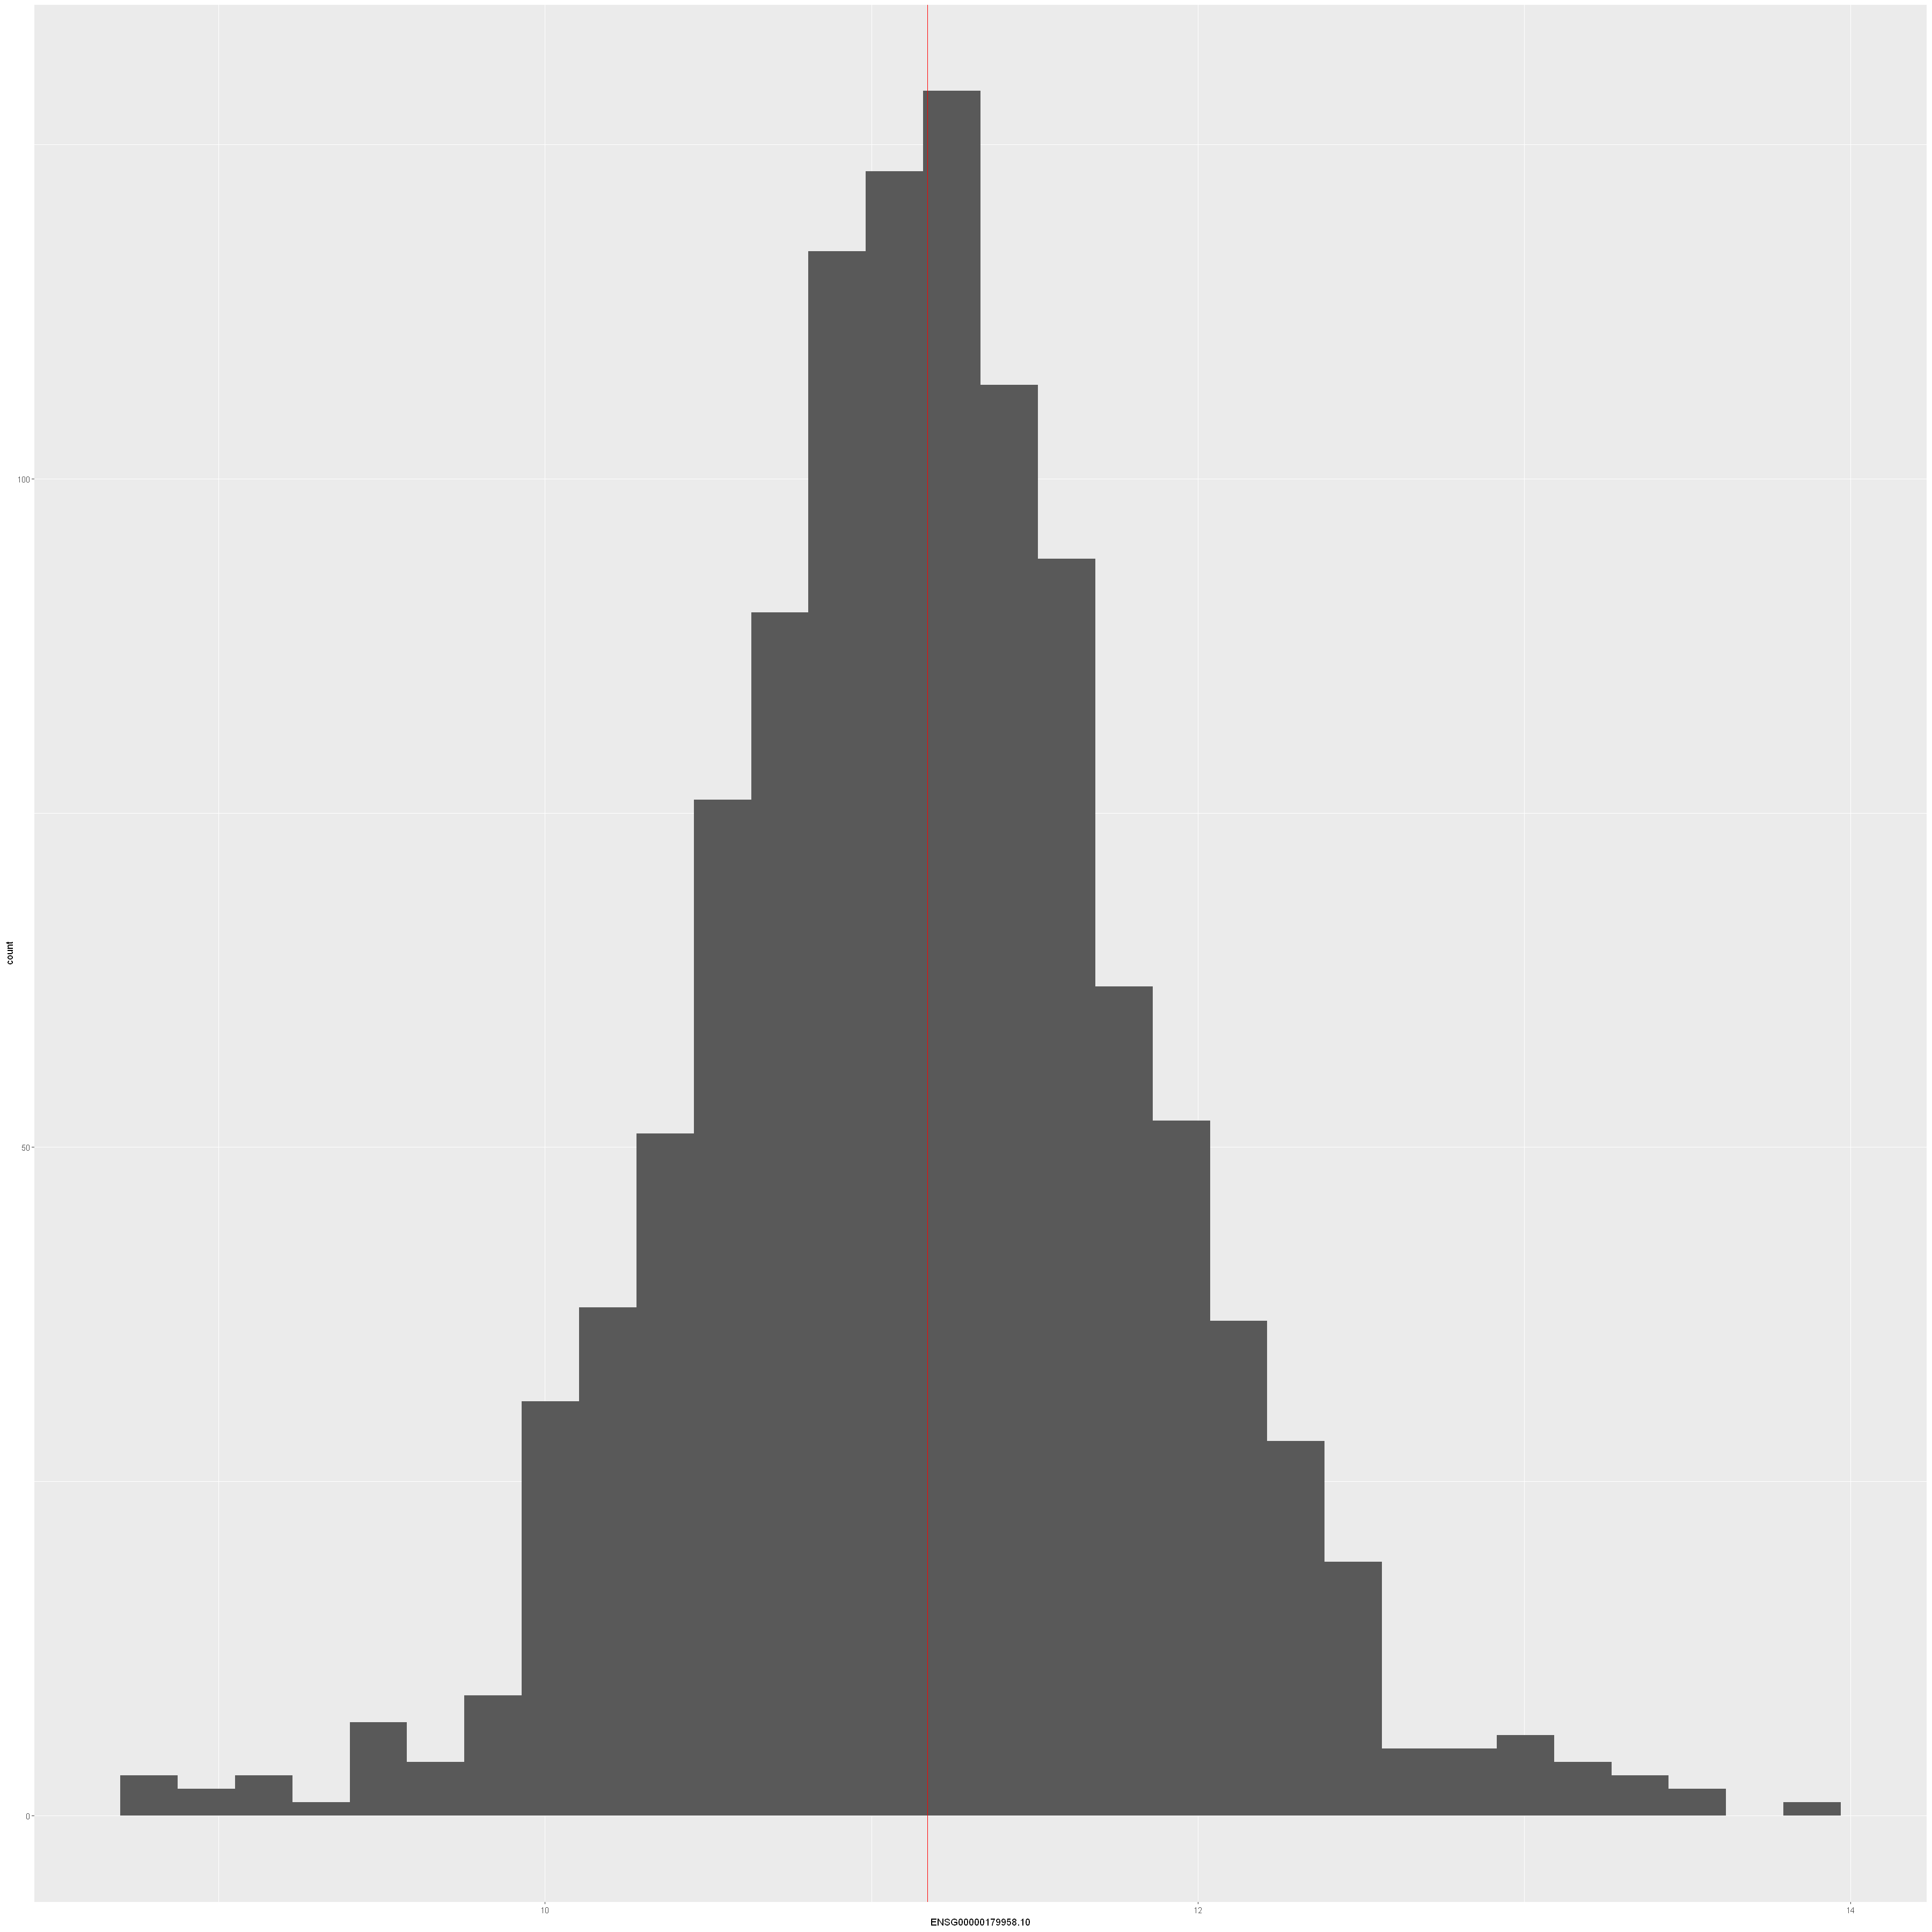

In [86]:
# Threshold = mean 
threshold <- mean(cox.data$ENSG00000179958.10)

# Plot histogram of expression
cox.data %>% ggplot(aes(x=ENSG00000179958.10)) +
               geom_histogram() +
               geom_vline(xintercept = threshold, color="red")

In [87]:
# Subset the gene
km.data <- cox.data %>% 
           dplyr::select(OS.month,
                         Status,
                         ENSG00000179958.10) 

# Define the high-exp and low-exp group 
km.data <- km.data %>% 
           mutate(group = ifelse(ENSG00000179958.10 >= threshold, 
                                 "High", "Low"))

head(km.data)

OS.month Status ENSG00000179958.10 group
TCGA-D8-A146-01A-31R-A115-07 21.433   0      10.71626           Low  
TCGA-AQ-A0Y5-01A-11R-A14M-07  5.733   1      11.28765           High 
TCGA-C8-A274-01A-11R-A16F-07 16.933   0      11.43893           High 
TCGA-BH-A0BD-01A-11R-A034-07 18.467   0      11.22100           High 
TCGA-B6-A1KC-01B-11R-A157-07 44.200   0      10.87868           Low  
TCGA-AC-A62V-01A-11R-A31O-07 11.600   1      13.41780           High

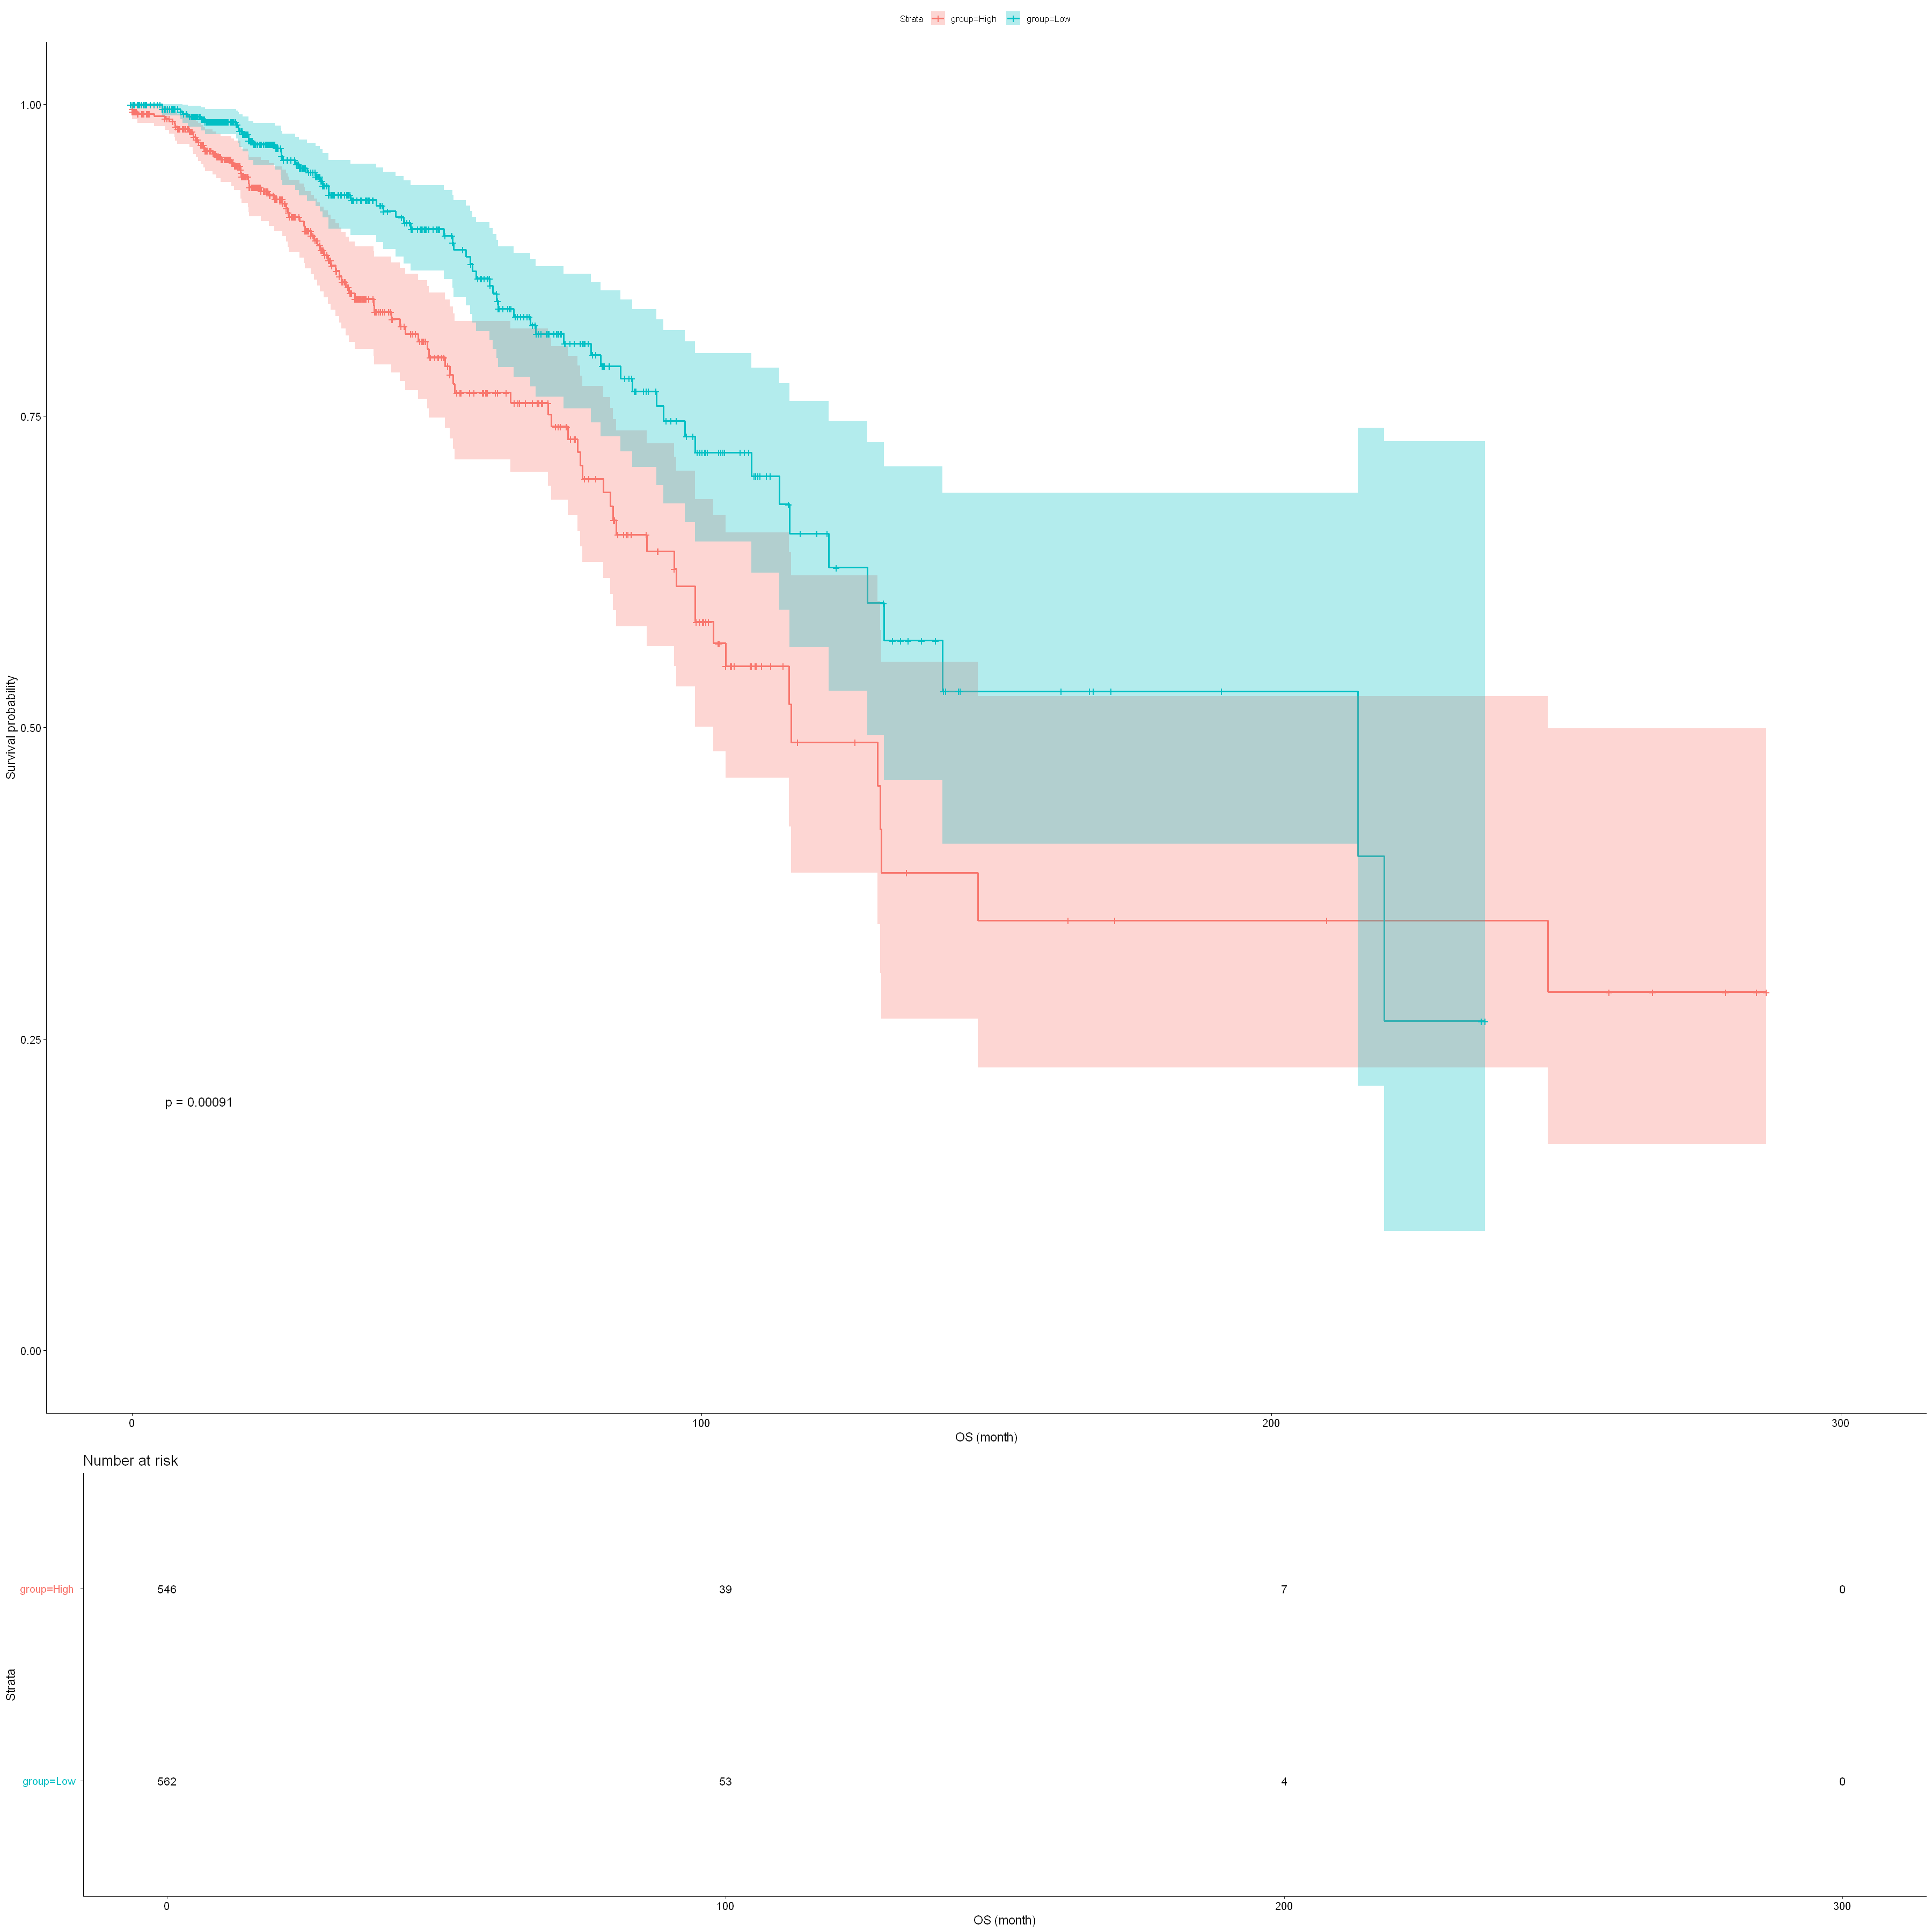

In [88]:
library(survminer)

# Fit a survival model based on high/low expression group
survival_fit <- survfit(Surv(OS.month, Status) ~ group, 
                        data = km.data)

# Survival plot
ggsurvplot(survival_fit, 
           data = km.data,
           xlab = "OS (month)", ylab = "Survival probability",
           conf.int = TRUE, 
           pval = TRUE,
           risk.table = TRUE)

In [89]:
colnames(clin.data)

[1] "barcode"                                  
 [2] "patient"                                  
 [3] "sample"                                   
 [4] "shortLetterCode"                          
 [5] "definition"                               
 [6] "sample_submitter_id"                      
 [7] "sample_type_id"                           
 [8] "tumor_descriptor"                         
 [9] "sample_id"                                
[10] "sample_type"                              
[11] "composition"                              
[12] "days_to_collection"                       
[13] "state"                                    
[14] "initial_weight"                           
[15] "preservation_method"                      
[16] "pathology_report_uuid"                    
[17] "submitter_id"                             
[18] "oct_embedded"                             
[19] "specimen_type"                            
[20] "is_ffpe"                                  
[21] "tissue_type"                              
[22] "synchronous_malignancy"                   
[23] "ajcc_pathologic_stage"                    
[24] "days_to_diagnosis"                        
[25] "treatments"                               
[26] "last_known_disease_status"                
[27] "tissue_or_organ_of_origin"                
[28] "days_to_last_follow_up"                   
[29] "age_at_diagnosis"                         
[30] "primary_diagnosis"                        
[31] "prior_malignancy"                         
[32] "year_of_diagnosis"                        
[33] "prior_treatment"                          
[34] "ajcc_staging_system_edition"              
[35] "ajcc_pathologic_t"                        
[36] "morphology"                               
[37] "ajcc_pathologic_n"                        
[38] "ajcc_pathologic_m"                        
[39] "classification_of_tumor"                  
[40] "diagnosis_id"                             
[41] "icd_10_code"                              
[42] "site_of_resection_or_biopsy"              
[43] "tumor_grade"                              
[44] "progression_or_recurrence"                
[45] "alcohol_history"                          
[46] "exposure_id"                              
[47] "race"                                     
[48] "gender"                                   
[49] "ethnicity"                                
[50] "vital_status"                             
[51] "age_at_index"                             
[52] "days_to_birth"                            
[53] "year_of_birth"                            
[54] "demographic_id"                           
[55] "days_to_death"                            
[56] "year_of_death"                            
[57] "bcr_patient_barcode"                      
[58] "primary_site"                             
[59] "project_id"                               
[60] "disease_type"                             
[61] "name"                                     
[62] "releasable"                               
[63] "released"                                 
[64] "days_to_sample_procurement"               
[65] "paper_patient"                            
[66] "paper_Tumor.Type"                         
[67] "paper_Included_in_previous_marker_papers" 
[68] "paper_vital_status"                       
[69] "paper_days_to_birth"                      
[70] "paper_days_to_death"                      
[71] "paper_days_to_last_followup"              
[72] "paper_age_at_initial_pathologic_diagnosis"
[73] "paper_pathologic_stage"                   
[74] "paper_Tumor_Grade"                        
[75] "paper_BRCA_Pathology"                     
[76] "paper_BRCA_Subtype_PAM50"                 
[77] "paper_MSI_status"                         
[78] "paper_HPV_Status"                         
[79] "paper_tobacco_smoking_history"            
[80] "paper_CNV.Clusters"                       
[81] "paper_Mutation.Clusters"                  
[82] "paper_DNA.Methylation.Clus

In [91]:
write.table(assay(exp), file = "python_pre_count_data.txt", sep = "\t", quote = FALSE)


In [100]:
write.table(colData(exp), file = "python_pre_clin_data.txt", sep = "\t", quote = FALSE)

ERROR: Error in write.table(colData(exp), file = "python_pre_clin_data.txt", : 种类'list'目前没有在'EncodeElement'里实现



In [94]:
write.table(rowData(exp), file = "python_pre_gene_anno_data.txt", sep = "\t", quote = FALSE)